# Crime in Atlanta Dataset



![](Data/Atlanta/Atlanta.png) 

### Dataset available at https://www.kaggle.com/priscillapun/crime-in-atlanta-2017/version/2?


### To begin, we will be importing the libraries we will be using for this example:

* **pandas**: To provide high-performance, easy-to-use data structures and data analysis tools for the Python programming

* **numpy**: To add support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

* **matplotlib**: Plotting library for the Python programming language and its numerical mathematics extension NumPy.

#### We will be also using _%matplotlib inline_, to have the output of plotting commands displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#### Now we are ready to read the first file. As data is in csv format, we will be using the read_csv() function, which allows us to parse and load data into a dataframe (in memory) easily.

#### To see what we just read, we will be using the head() function. We can indicate the number of rows as a parameter, or by default it will show 5 rows.
####     


In [153]:
crimes = pd.read_csv('Data/Atlanta/COBRA-YTD2017.csv')
crimes.head()

,MI_PRINX,offense_id,rpt_date,occur_date,occur_time,poss_date,poss_time,beat,apt_office_prefix,apt_office_num,...,dispo_code,MaxOfnum_victims,Shift,Avg Day,loc_type,UC2 Literal,neighborhood,npu,x,y
0,8924155,173650072,12/31/2017,12/30/2017,23:15:00,12/31/2017,00:30:00,510,NaN,NaN,...,NaN,2.0,Morn,Sat,13.0,LARCENY-FROM VEHICLE,Downtown,M,-84.38013,33.75582
1,8924156,173650102,12/31/2017,12/18/2017,13:00:00,12/30/2017,22:00:00,501,NaN,NaN,...,NaN,1.0,Unk,Unk,13.0,LARCENY-FROM VEHICLE,Home Park,E,-84.39745,33.78674
2,8924157,173650144,12/31/2017,12/30/2017,22:01:00,12/31/2017,01:00:00,303,NaN,NaN,...,NaN,1.0,Morn,Sat,18.0,LARCENY-FROM VEHICLE,Mechanicsville,V,-84.39486,33.73760
3,8924158,173650149,12/31/2017,12/30/2017,20:00:00,12/31/2017,01:06:00,507,NaN,NaN,...,NaN,1.0,Eve,Sat,18.0,LARCENY-FROM VEHICLE,Castleberry Hill,M,-84.39887,33.75156
4,8924159,173650159,12/31/2017,12/31/2017,00:41:00,12/31/2017,00:48:00,409,NaN,NaN,...,NaN,2.0,Morn,Sun,18.0,LARCENY-FROM VEHICLE,Adams Park,R,-84.46522,33.72146


### Data Types

* _bool_: Boolean, stored in a single byte
* _int_: Integer, defaulted to 64bits, also available unsigned int
* _float_: Float, defaulted to 64bits
* _complex_: Complex, rarely seen in data analysis
* _object_: Object, typically a string, but is a catch-all for columns with multiple different types or other python objects
* _datetime64_: Datetime, specific moment in time
* _timedelta64_: Timedelta, amount of time
* _category_: Categorical, used for columns with a few possible values

#### We can use _dtype_ to display the data type associated with each column
##   




In [3]:
crimes.dtypes

MI_PRINX               int64
offense_id             int64
rpt_date              object
occur_date            object
occur_time            object
poss_date             object
poss_time             object
beat                   int64
apt_office_prefix     object
apt_office_num        object
location              object
MinOfucr               int64
MinOfibr_code         object
dispo_code            object
MaxOfnum_victims     float64
Shift                 object
Avg Day               object
loc_type             float64
UC2 Literal           object
neighborhood          object
npu                   object
x                    float64
y                    float64
dtype: object

In [154]:
#Change to Date format
crimes.loc[:,'occur_date'] = pd.to_datetime(crimes['occur_date'], errors='coerce')

In [155]:
crimes.loc[:,'rpt_date'] = pd.to_datetime(crimes['rpt_date'], errors='coerce')

In [156]:
crimes.loc[:,'poss_date'] = pd.to_datetime(crimes['poss_date'], errors='coerce')

In [157]:
crimes.loc[:,'occur_time'] = pd.to_datetime(crimes['occur_time'], errors='coerce')

In [158]:
crimes.loc[:,'poss_time'] = pd.to_datetime(crimes['poss_time'], errors='coerce')

In [144]:
crimes.dtypes

MI_PRINX                      int64
offense_id                    int64
rpt_date             datetime64[ns]
occur_date           datetime64[ns]
occur_time           datetime64[ns]
poss_date            datetime64[ns]
poss_time            datetime64[ns]
beat                          int64
apt_office_prefix            object
apt_office_num               object
location                     object
MinOfucr                      int64
MinOfibr_code                object
dispo_code                   object
MaxOfnum_victims            float64
Shift                        object
Avg Day                      object
loc_type                    float64
UC2 Literal                  object
neighborhood                 object
npu                          object
x                           float64
y                           float64
dtype: object

In [10]:
crimes.get_dtype_counts()

datetime64[ns]     5
float64            4
int64              4
object            10
dtype: int64

### Count()

This method is usefull to understand the distribution the data on the serie contains. It´s usually more useful in object series than in numeric series 

In [11]:
crimes.count()

MI_PRINX             26759
offense_id           26759
rpt_date             26759
occur_date           26759
occur_time           26748
poss_date            26759
poss_time            26755
beat                 26759
apt_office_prefix      546
apt_office_num        4626
location             26759
MinOfucr             26759
MinOfibr_code        26758
dispo_code            3800
MaxOfnum_victims     26684
Shift                26759
Avg Day              26759
loc_type             23415
UC2 Literal          26759
neighborhood         25574
npu                  26499
x                    26759
y                    26759
dtype: int64

In [12]:
crimes.describe()

,MI_PRINX,offense_id,beat,MinOfucr,MaxOfnum_victims,loc_type,x,y
count,2.675900e+04,2.675900e+04,26759.000000,26759.000000,26684.000000,23415.000000,26759.000000,26759.000000
mean,8.910851e+06,6.523372e+08,355.640532,598.787062,1.159834,20.756652,-83.694373,33.474244
std,7.958873e+03,9.062584e+09,168.942553,112.199570,0.680471,16.011340,7.724556,3.089802
min,8.838438e+06,1.608219e+08,101.000000,110.000000,0.000000,1.000000,-84.549580,0.000000
25%,8.904204e+06,1.710602e+08,208.000000,521.000000,1.000000,13.000000,-84.432480,33.730010
50%,8.910894e+06,1.719703e+08,312.000000,640.000000,1.000000,18.000000,-84.395830,33.758050
75%,8.917584e+06,1.728213e+08,505.000000,660.000000,1.000000,20.000000,-84.371480,33.787875
max,8.924410e+06,1.734726e+11,710.000000,730.000000,27.000000,99.000000,0.000000,33.882700


In [13]:
crimes.shape

(26759, 23)

In [14]:
crimes.size

615457

In [15]:
len(crimes)

26759

In [16]:
crimes.min()

MI_PRINX                        8838438
offense_id                    160821939
rpt_date            2017-01-01 00:00:00
occur_date          1916-12-30 00:00:00
occur_time          2019-03-20 00:00:00
poss_date           2008-04-01 00:00:00
poss_time           2019-03-20 00:00:00
beat                                101
location               1 BISCAYNE DR NW
MinOfucr                            110
MaxOfnum_victims                      0
Shift                               Day
Avg Day                             Fri
loc_type                              1
UC2 Literal                 AGG ASSAULT
x                              -84.5496
y                                     0
dtype: object

In [17]:
crimes.isnull().sum()

MI_PRINX                 0
offense_id               0
rpt_date                 0
occur_date               0
occur_time              11
poss_date                0
poss_time                4
beat                     0
apt_office_prefix    26213
apt_office_num       22133
location                 0
MinOfucr                 0
MinOfibr_code            1
dispo_code           22959
MaxOfnum_victims        75
Shift                    0
Avg Day                  0
loc_type              3344
UC2 Literal              0
neighborhood          1185
npu                    260
x                        0
y                        0
dtype: int64

In [18]:
crimes.isnull().sum().sum()

76185

In [19]:
crimes.isnull().any().any()

True

In [20]:
crimes.corr()

,MI_PRINX,offense_id,beat,MinOfucr,MaxOfnum_victims,loc_type,x,y
MI_PRINX,1.000000,-0.054870,0.001774,0.035917,0.016025,0.000185,-0.011820,0.012096
offense_id,-0.054870,1.000000,-0.022461,-0.230950,0.015605,0.000803,-0.004997,0.004719
beat,0.001774,-0.022461,1.000000,0.067198,0.013645,-0.035442,-0.006009,0.002769
MinOfucr,0.035917,-0.230950,0.067198,1.000000,-0.067444,-0.025346,-0.318902,0.320760
MaxOfnum_victims,0.016025,0.015605,0.013645,-0.067444,1.000000,-0.006813,-0.015761,0.015742
loc_type,0.000185,0.000803,-0.035442,-0.025346,-0.006813,1.000000,0.014349,-0.015270
x,-0.011820,-0.004997,-0.006009,-0.318902,-0.015761,0.014349,1.000000,-0.999836
y,0.012096,0.004719,0.002769,0.320760,0.015742,-0.015270,-0.999836,1.000000


In [159]:
crimes.dropna(subset=['neighborhood'],inplace=True)

In [130]:
crimes.dtypes

MI_PRINX                      int64
offense_id                    int64
rpt_date             datetime64[ns]
occur_date           datetime64[ns]
occur_time           datetime64[ns]
poss_date            datetime64[ns]
poss_time            datetime64[ns]
beat                          int64
apt_office_prefix            object
apt_office_num               object
location                     object
MinOfucr                      int64
MinOfibr_code                object
dispo_code                   object
MaxOfnum_victims            float64
Shift                        object
Avg Day                      object
loc_type                    float64
UC2 Literal                  object
neighborhood                 object
npu                          object
x                           float64
y                           float64
dtype: object

In [160]:
(crimes['occur_date']<'2017-01-01').sum()

211

In [169]:
crimes=crimes.loc[((crimes['occur_date']>='2017-01-01')&(crimes['occur_date']<'2018-01-01')),:]

In [170]:
crimes.head()

,MI_PRINX,offense_id,rpt_date,occur_date,occur_time,poss_date,poss_time,beat,apt_office_prefix,apt_office_num,...,dispo_code,MaxOfnum_victims,Shift,Avg Day,loc_type,UC2 Literal,neighborhood,npu,x,y
0,8924155,173650072,2017-12-31,2017-12-30,2019-03-20 23:15:00,2017-12-31,2019-03-20 00:30:00,510,NaN,NaN,...,NaN,2.0,Morn,Sat,13.0,LARCENY-FROM VEHICLE,Downtown,M,-84.38013,33.75582
1,8924156,173650102,2017-12-31,2017-12-18,2019-03-20 13:00:00,2017-12-30,2019-03-20 22:00:00,501,NaN,NaN,...,NaN,1.0,Unk,Unk,13.0,LARCENY-FROM VEHICLE,Home Park,E,-84.39745,33.78674
2,8924157,173650144,2017-12-31,2017-12-30,2019-03-20 22:01:00,2017-12-31,2019-03-20 01:00:00,303,NaN,NaN,...,NaN,1.0,Morn,Sat,18.0,LARCENY-FROM VEHICLE,Mechanicsville,V,-84.39486,33.73760
3,8924158,173650149,2017-12-31,2017-12-30,2019-03-20 20:00:00,2017-12-31,2019-03-20 01:06:00,507,NaN,NaN,...,NaN,1.0,Eve,Sat,18.0,LARCENY-FROM VEHICLE,Castleberry Hill,M,-84.39887,33.75156
4,8924159,173650159,2017-12-31,2017-12-31,2019-03-20 00:41:00,2017-12-31,2019-03-20 00:48:00,409,NaN,NaN,...,NaN,2.0,Morn,Sun,18.0,LARCENY-FROM VEHICLE,Adams Park,R,-84.46522,33.72146


In [171]:
crimes['occur_date'].min()

Timestamp('2017-01-02 00:00:00')

In [173]:
crimes['Quarter']=pd.cut(crimes['occur_date'],4,labels=['Q1','Q2','Q3','Q4'])

In [174]:
crimes.head()

,MI_PRINX,offense_id,rpt_date,occur_date,occur_time,poss_date,poss_time,beat,apt_office_prefix,apt_office_num,...,MaxOfnum_victims,Shift,Avg Day,loc_type,UC2 Literal,neighborhood,npu,x,y,Quarter
0,8924155,173650072,2017-12-31,2017-12-30,2019-03-20 23:15:00,2017-12-31,2019-03-20 00:30:00,510,NaN,NaN,...,2.0,Morn,Sat,13.0,LARCENY-FROM VEHICLE,Downtown,M,-84.38013,33.75582,Q4
1,8924156,173650102,2017-12-31,2017-12-18,2019-03-20 13:00:00,2017-12-30,2019-03-20 22:00:00,501,NaN,NaN,...,1.0,Unk,Unk,13.0,LARCENY-FROM VEHICLE,Home Park,E,-84.39745,33.78674,Q4
2,8924157,173650144,2017-12-31,2017-12-30,2019-03-20 22:01:00,2017-12-31,2019-03-20 01:00:00,303,NaN,NaN,...,1.0,Morn,Sat,18.0,LARCENY-FROM VEHICLE,Mechanicsville,V,-84.39486,33.73760,Q4
3,8924158,173650149,2017-12-31,2017-12-30,2019-03-20 20:00:00,2017-12-31,2019-03-20 01:06:00,507,NaN,NaN,...,1.0,Eve,Sat,18.0,LARCENY-FROM VEHICLE,Castleberry Hill,M,-84.39887,33.75156,Q4
4,8924159,173650159,2017-12-31,2017-12-31,2019-03-20 00:41:00,2017-12-31,2019-03-20 00:48:00,409,NaN,NaN,...,2.0,Morn,Sun,18.0,LARCENY-FROM VEHICLE,Adams Park,R,-84.46522,33.72146,Q4


In [175]:
crimes['MaxOfnum_victims'].value_counts()

1.0     22217
2.0      2066
3.0       458
0.0       184
4.0       164
5.0        53
6.0        26
7.0        19
8.0        10
11.0        4
10.0        4
14.0        2
9.0         2
13.0        2
23.0        1
24.0        1
17.0        1
15.0        1
21.0        1
19.0        1
27.0        1
Name: MaxOfnum_victims, dtype: int64

In [301]:
bins = pd.IntervalIndex.from_tuples([(-1, 1), (1, 3), (3, 5), (5, 28)])
crimes_categ = pd.cut(crimes['MaxOfnum_victims'],bins)
crimes_categ.value_counts()

(-1, 1]    22401
(1, 3]      2524
(3, 5]       217
(5, 28]       76
Name: MaxOfnum_victims, dtype: int64

In [306]:
crimes_categ

0         (1, 3]
1        (-1, 1]
2        (-1, 1]
3        (-1, 1]
4         (1, 3]
5        (-1, 1]
6        (-1, 1]
7        (-1, 1]
8        (-1, 1]
9        (-1, 1]
10       (-1, 1]
11       (-1, 1]
12       (-1, 1]
13        (1, 3]
14       (-1, 1]
15       (-1, 1]
16       (-1, 1]
17       (-1, 1]
18       (-1, 1]
19       (-1, 1]
20       (-1, 1]
21       (-1, 1]
22       (-1, 1]
23       (-1, 1]
24        (3, 5]
25        (1, 3]
26       (-1, 1]
27       (-1, 1]
28       (-1, 1]
29       (-1, 1]
          ...   
26636    (-1, 1]
26639    (-1, 1]
26641    (-1, 1]
26642    (-1, 1]
26643    (-1, 1]
26645     (1, 3]
26646    (-1, 1]
26647    (-1, 1]
26648    (-1, 1]
26649    (-1, 1]
26651     (1, 3]
26653    (-1, 1]
26654    (-1, 1]
26655    (-1, 1]
26656     (1, 3]
26657    (-1, 1]
26658    (-1, 1]
26660    (-1, 1]
26661    (-1, 1]
26662     (1, 3]
26663    (-1, 1]
26664    (-1, 1]
26665    (-1, 1]
26670    (-1, 1]
26672    (-1, 1]
26673    (-1, 1]
26674    (-1, 1]
26675    (-1, 

In [312]:
crimes_categ.cat.categories = ['low','med','high','veryhighindeed']

In [314]:
crimes['crime_victims_cat'] = crimes_categ

In [315]:
from datetime import datetime

In [316]:
crimes.dtypes

MI_PRINX                      int64
offense_id                    int64
rpt_date             datetime64[ns]
occur_date           datetime64[ns]
occur_time           datetime64[ns]
poss_date            datetime64[ns]
poss_time            datetime64[ns]
beat                          int64
apt_office_prefix            object
apt_office_num               object
location                     object
MinOfucr                      int64
MinOfibr_code                object
dispo_code                   object
MaxOfnum_victims            float64
Shift                        object
Avg Day                      object
loc_type                    float64
UC2 Literal                  object
neighborhood                 object
npu                          object
x                           float64
y                           float64
Quarter                    category
crime_victims_cat          category
dtype: object

In [326]:
crimes[['occur_time','MaxOfnum_victims']].groupby('occur_time').sum().between_time('10:00:00','12:00:00')

,MaxOfnum_victims
occur_time,
2019-03-20 10:00:00,400.0
2019-03-20 10:01:00,8.0
2019-03-20 10:04:00,8.0
2019-03-20 10:05:00,5.0
2019-03-20 10:06:00,1.0
2019-03-20 10:07:00,3.0
2019-03-20 10:08:00,9.0
2019-03-20 10:09:00,5.0
2019-03-20 10:10:00,16.0


## Grouping for Aggregation, filtration and transformation


The most common use of a _groupby_ is performing an aggregation (which takes several values and converts them in one single value). 

In order to do this, we will define an __aggregating column__ (from where we take the value to aggregate) and an __aggregating function__ (how do we aggregate). 

Some common aggregating functions are _mean, sum, max, min, count_, etc...

The easiest way to do it, groupby + apply:

In [22]:
crimes.head()

,MI_PRINX,offense_id,rpt_date,occur_date,occur_time,poss_date,poss_time,beat,apt_office_prefix,apt_office_num,...,dispo_code,MaxOfnum_victims,Shift,Avg Day,loc_type,UC2 Literal,neighborhood,npu,x,y
0,8924155,173650072,2017-12-31,2017-12-30,2019-03-20 23:15:00,2017-12-31,2019-03-20 00:30:00,510,NaN,NaN,...,NaN,2.0,Morn,Sat,13.0,LARCENY-FROM VEHICLE,Downtown,M,-84.38013,33.75582
1,8924156,173650102,2017-12-31,2017-12-18,2019-03-20 13:00:00,2017-12-30,2019-03-20 22:00:00,501,NaN,NaN,...,NaN,1.0,Unk,Unk,13.0,LARCENY-FROM VEHICLE,Home Park,E,-84.39745,33.78674
2,8924157,173650144,2017-12-31,2017-12-30,2019-03-20 22:01:00,2017-12-31,2019-03-20 01:00:00,303,NaN,NaN,...,NaN,1.0,Morn,Sat,18.0,LARCENY-FROM VEHICLE,Mechanicsville,V,-84.39486,33.73760
3,8924158,173650149,2017-12-31,2017-12-30,2019-03-20 20:00:00,2017-12-31,2019-03-20 01:06:00,507,NaN,NaN,...,NaN,1.0,Eve,Sat,18.0,LARCENY-FROM VEHICLE,Castleberry Hill,M,-84.39887,33.75156
4,8924159,173650159,2017-12-31,2017-12-31,2019-03-20 00:41:00,2017-12-31,2019-03-20 00:48:00,409,NaN,NaN,...,NaN,2.0,Morn,Sun,18.0,LARCENY-FROM VEHICLE,Adams Park,R,-84.46522,33.72146


In [23]:
grouped=crimes.groupby(['neighborhood','UC2 Literal']).agg({'MaxOfnum_victims':['mean','sum','count']}) 
grouped.loc[grouped[('MaxOfnum_victims','count')]>10,:].sort_values(('MaxOfnum_victims','mean'),ascending=False).head(10)

MaxOfnum_victims             
                                                mean    sum count
neighborhood   UC2 Literal                                       
Ormewood Park  LARCENY-NON VEHICLE          2.428571   51.0    21
Carey Park     AGG ASSAULT                  1.857143   52.0    28
West Lake      AGG ASSAULT                  1.846154   24.0    13
Paces          LARCENY-FROM VEHICLE         1.823529   31.0    17
Sweet Auburn   ROBBERY-PEDESTRIAN           1.785714   25.0    14
Home Park      ROBBERY-PEDESTRIAN           1.777778   32.0    18
Oakland City   LARCENY-FROM VEHICLE         1.750000  105.0    60
Adamsville     LARCENY-FROM VEHICLE         1.739726  127.0    73
Ardmore        LARCENY-FROM VEHICLE         1.689655   49.0    29
Mechanicsville AGG ASSAULT                  1.661017   98.0    59

In [24]:
crimes.groupby('neighborhood').agg({'MaxOfnum_victims':'sum'}).sort_values('MaxOfnum_victims',ascending=False).head()

,MaxOfnum_victims
neighborhood,
Downtown,2174.0
Midtown,1651.0
Old Fourth Ward,832.0
Lindbergh/Morosgo,648.0
West End,637.0


### Restructuring data

In order to work with the data, it is important for us to take care of the way it is presented. That will simplify our data analysis. Three basic principles need to be followed:

* Each variable forms a column 
* Each observation forms a row 
* Each type of observational unit forms a table

To work on this, we will be using some functions like:

* stack 
* melt 
* unstack
* pivot_table



In [25]:
crimes_by_neighborhood_grouped=crimes.groupby('neighborhood').agg({'MaxOfnum_victims':['mean','sum','count']})

In [26]:
crimes_by_neighborhood_grouped.head(3)

MaxOfnum_victims             
                         mean    sum count
neighborhood                              
Adair Park           1.229412  209.0   170
Adams Park           1.086022  101.0    93
Adamsville           1.334928  279.0   209

In [27]:
crimes_by_neighborhood_grouped.columns=['average_num_victims','total_num_victims','total_num_crimes']
crimes_by_neighborhood_grouped.head()

,average_num_victims,total_num_victims,total_num_crimes
neighborhood,,,
Adair Park,1.229412,209.0,170
Adams Park,1.086022,101.0,93
Adamsville,1.334928,279.0,209
Almond Park,1.153846,60.0,52
Amal Heights,1.086957,25.0,23


In [28]:
crimes_by_neighborhood_grouped.stack()

neighborhood                              
Adair Park             average_num_victims      1.229412
                       total_num_victims      209.000000
                       total_num_crimes       170.000000
Adams Park             average_num_victims      1.086022
                       total_num_victims      101.000000
                       total_num_crimes        93.000000
Adamsville             average_num_victims      1.334928
                       total_num_victims      279.000000
                       total_num_crimes       209.000000
Almond Park            average_num_victims      1.153846
                       total_num_victims       60.000000
                       total_num_crimes        52.000000
Amal Heights           average_num_victims      1.086957
                       total_num_victims       25.000000
                       total_num_crimes        23.000000
Ansley Park            average_num_victims      1.278689
                       total_num_victims     

In [29]:
crimes_by_neighborhood_reformatted=crimes_by_neighborhood_grouped.stack().reset_index()

In [30]:
crimes_by_neighborhood_reformatted

,neighborhood,level_1,0
0,Adair Park,average_num_victims,1.229412
1,Adair Park,total_num_victims,209.000000
2,Adair Park,total_num_crimes,170.000000
3,Adams Park,average_num_victims,1.086022
4,Adams Park,total_num_victims,101.000000
5,Adams Park,total_num_crimes,93.000000
6,Adamsville,average_num_victims,1.334928
7,Adamsville,total_num_victims,279.000000
8,Adamsville,total_num_crimes,209.000000
9,Almond Park,average_num_victims,1.153846


In [31]:
crimes_by_neighborhood_reformatted.columns=['neighborhood','statistic','value']

In [32]:
crimes_by_neighborhood_reformatted

,neighborhood,statistic,value
0,Adair Park,average_num_victims,1.229412
1,Adair Park,total_num_victims,209.000000
2,Adair Park,total_num_crimes,170.000000
3,Adams Park,average_num_victims,1.086022
4,Adams Park,total_num_victims,101.000000
5,Adams Park,total_num_crimes,93.000000
6,Adamsville,average_num_victims,1.334928
7,Adamsville,total_num_victims,279.000000
8,Adamsville,total_num_crimes,209.000000
9,Almond Park,average_num_victims,1.153846


In [33]:
crimes_by_neighborhood_reformatted=crimes_by_neighborhood_grouped.stack().rename_axis(['neighborhood','statistic']).reset_index(name='value')

In [34]:
crimes_by_neighborhood_reformatted

,neighborhood,statistic,value
0,Adair Park,average_num_victims,1.229412
1,Adair Park,total_num_victims,209.000000
2,Adair Park,total_num_crimes,170.000000
3,Adams Park,average_num_victims,1.086022
4,Adams Park,total_num_victims,101.000000
5,Adams Park,total_num_crimes,93.000000
6,Adamsville,average_num_victims,1.334928
7,Adamsville,total_num_victims,279.000000
8,Adamsville,total_num_crimes,209.000000
9,Almond Park,average_num_victims,1.153846


Let's try to do something similar using _melt_. We need to indicate:

* id_vars is a list of column names that you want to preserve as columns and not reshape 
* value_vars is a list of column names that you want to reshape into a single column

Additionally we can use var_name and value_name to rename the new columns created.

 

In [35]:
crimes_by_neighborhood_grouped.reset_index().melt(id_vars=['neighborhood'], value_vars=['average_num_victims', 'total_num_victims', 'total_num_crimes'], var_name='Statistics',value_name='Value')

,neighborhood,Statistics,Value
0,Adair Park,average_num_victims,1.229412
1,Adams Park,average_num_victims,1.086022
2,Adamsville,average_num_victims,1.334928
3,Almond Park,average_num_victims,1.153846
4,Amal Heights,average_num_victims,1.086957
5,Ansley Park,average_num_victims,1.278689
6,Arden/Habersham,average_num_victims,1.142857
7,Ardmore,average_num_victims,1.571429
8,Argonne Forest,average_num_victims,1.111111
9,Arlington Estates,average_num_victims,1.043478


In [36]:
crimes_by_neighborhood_grouped.reset_index().melt()

,variable,value
0,neighborhood,Adair Park
1,neighborhood,Adams Park
2,neighborhood,Adamsville
3,neighborhood,Almond Park
4,neighborhood,Amal Heights
5,neighborhood,Ansley Park
6,neighborhood,Arden/Habersham
7,neighborhood,Ardmore
8,neighborhood,Argonne Forest
9,neighborhood,Arlington Estates


#### Inverting stacked data

We will now try to revert what we just did with _stack_ and _melt_, using _unstack_ and _pivot_

In [37]:
crimes_by_neighborhood_stacked=crimes_by_neighborhood_grouped.stack()

In [38]:
crimes_by_neighborhood_stacked.head(3)

neighborhood                     
Adair Park    average_num_victims      1.229412
              total_num_victims      209.000000
              total_num_crimes       170.000000
dtype: float64

In [128]:
crimes_by_neighborhood_stacked.unstack()

,average_num_victims,total_num_victims,total_num_crimes
neighborhood,,,
Adair Park,1.229412,209.0,170.0
Adams Park,1.086022,101.0,93.0
Adamsville,1.334928,279.0,209.0
Almond Park,1.153846,60.0,52.0
Amal Heights,1.086957,25.0,23.0
Ansley Park,1.278689,78.0,61.0
Arden/Habersham,1.142857,8.0,7.0
Ardmore,1.571429,55.0,35.0
Argonne Forest,1.111111,10.0,9.0


In [129]:
crimes_by_neighborhood_stacked.unstack(0)

neighborhood,Adair Park,Adams Park,Adamsville,Almond Park,Amal Heights,Ansley Park,Arden/Habersham,Ardmore,Argonne Forest,Arlington Estates,...,Whitewater Creek,Whittier Mill Village,Wildwood (NPU-C),Wildwood (NPU-H),Wildwood Forest,Wilson Mill Meadows,Wisteria Gardens,Woodfield,Woodland Hills,Wyngate
average_num_victims,1.229412,1.086022,1.334928,1.153846,1.086957,1.278689,1.142857,1.571429,1.111111,1.043478,...,1.285714,1.087719,1.247059,1.090909,1.0,1.103448,1.142857,1.2,1.235294,1.0
total_num_victims,209.000000,101.000000,279.000000,60.000000,25.000000,78.000000,8.000000,55.000000,10.000000,24.000000,...,9.000000,62.000000,106.000000,24.000000,4.0,32.000000,16.000000,6.0,63.000000,7.0
total_num_crimes,170.000000,93.000000,209.000000,52.000000,23.000000,61.000000,7.000000,35.000000,9.000000,23.000000,...,7.000000,57.000000,85.000000,22.000000,4.0,29.000000,14.000000,5.0,51.000000,7.0


In [40]:
crimes_by_neighborhood_grouped.T

neighborhood,Adair Park,Adams Park,Adamsville,Almond Park,Amal Heights,Ansley Park,Arden/Habersham,Ardmore,Argonne Forest,Arlington Estates,...,Whitewater Creek,Whittier Mill Village,Wildwood (NPU-C),Wildwood (NPU-H),Wildwood Forest,Wilson Mill Meadows,Wisteria Gardens,Woodfield,Woodland Hills,Wyngate
average_num_victims,1.229412,1.086022,1.334928,1.153846,1.086957,1.278689,1.142857,1.571429,1.111111,1.043478,...,1.285714,1.087719,1.247059,1.090909,1.0,1.103448,1.142857,1.2,1.235294,1.0
total_num_victims,209.000000,101.000000,279.000000,60.000000,25.000000,78.000000,8.000000,55.000000,10.000000,24.000000,...,9.000000,62.000000,106.000000,24.000000,4.0,32.000000,16.000000,6.0,63.000000,7.0
total_num_crimes,170.000000,93.000000,209.000000,52.000000,23.000000,61.000000,7.000000,35.000000,9.000000,23.000000,...,7.000000,57.000000,85.000000,22.000000,4.0,29.000000,14.000000,5.0,51.000000,7.0


The dataframe has different index levels, and by default unstack will use the -1 (innermost index), but if we want we can indicate the index level as a parameter. If we use 0 we extract the outermost columns:

In [41]:
crimes_by_neighborhood_stacked.unstack(0)

neighborhood,Adair Park,Adams Park,Adamsville,Almond Park,Amal Heights,Ansley Park,Arden/Habersham,Ardmore,Argonne Forest,Arlington Estates,...,Whitewater Creek,Whittier Mill Village,Wildwood (NPU-C),Wildwood (NPU-H),Wildwood Forest,Wilson Mill Meadows,Wisteria Gardens,Woodfield,Woodland Hills,Wyngate
average_num_victims,1.229412,1.086022,1.334928,1.153846,1.086957,1.278689,1.142857,1.571429,1.111111,1.043478,...,1.285714,1.087719,1.247059,1.090909,1.0,1.103448,1.142857,1.2,1.235294,1.0
total_num_victims,209.000000,101.000000,279.000000,60.000000,25.000000,78.000000,8.000000,55.000000,10.000000,24.000000,...,9.000000,62.000000,106.000000,24.000000,4.0,32.000000,16.000000,6.0,63.000000,7.0
total_num_crimes,170.000000,93.000000,209.000000,52.000000,23.000000,61.000000,7.000000,35.000000,9.000000,23.000000,...,7.000000,57.000000,85.000000,22.000000,4.0,29.000000,14.000000,5.0,51.000000,7.0


Doing this, we were able to transpose the dataframe using _stack().unstack(0)_

We can also transpose by using _T_ or _transpose()_


In [42]:
crimes_by_neighborhood_grouped.T

neighborhood,Adair Park,Adams Park,Adamsville,Almond Park,Amal Heights,Ansley Park,Arden/Habersham,Ardmore,Argonne Forest,Arlington Estates,...,Whitewater Creek,Whittier Mill Village,Wildwood (NPU-C),Wildwood (NPU-H),Wildwood Forest,Wilson Mill Meadows,Wisteria Gardens,Woodfield,Woodland Hills,Wyngate
average_num_victims,1.229412,1.086022,1.334928,1.153846,1.086957,1.278689,1.142857,1.571429,1.111111,1.043478,...,1.285714,1.087719,1.247059,1.090909,1.0,1.103448,1.142857,1.2,1.235294,1.0
total_num_victims,209.000000,101.000000,279.000000,60.000000,25.000000,78.000000,8.000000,55.000000,10.000000,24.000000,...,9.000000,62.000000,106.000000,24.000000,4.0,32.000000,16.000000,6.0,63.000000,7.0
total_num_crimes,170.000000,93.000000,209.000000,52.000000,23.000000,61.000000,7.000000,35.000000,9.000000,23.000000,...,7.000000,57.000000,85.000000,22.000000,4.0,29.000000,14.000000,5.0,51.000000,7.0


In [43]:
crimes_by_neighborhood_melted=crimes_by_neighborhood_grouped.reset_index().melt(id_vars=['neighborhood'], value_vars=['average_num_victims', 'total_num_victims', 'total_num_crimes'], var_name='Statistics',value_name='Value')

In [44]:
crimes_by_neighborhood_melted

,neighborhood,Statistics,Value
0,Adair Park,average_num_victims,1.229412
1,Adams Park,average_num_victims,1.086022
2,Adamsville,average_num_victims,1.334928
3,Almond Park,average_num_victims,1.153846
4,Amal Heights,average_num_victims,1.086957
5,Ansley Park,average_num_victims,1.278689
6,Arden/Habersham,average_num_victims,1.142857
7,Ardmore,average_num_victims,1.571429
8,Argonne Forest,average_num_victims,1.111111
9,Arlington Estates,average_num_victims,1.043478


To understand the pivot parameters, let's see how we run the melt():  

#### .melt(id_vars=['neighborhood'], value_vars=['average_num_victims', 'total_num_victims', \
     \-- Index --/                                   \-- columns --/  
          
#### 'total_num_crimes'], var_name='Statistics',value_name='Value')
    \-- columns --/                \-- values --/  

In [45]:
crimes_by_neighborhood_melted.pivot(index='neighborhood',columns='Statistics',values='Value')

Statistics,average_num_victims,total_num_crimes,total_num_victims
neighborhood,,,
Adair Park,1.229412,170.0,209.0
Adams Park,1.086022,93.0,101.0
Adamsville,1.334928,209.0,279.0
Almond Park,1.153846,52.0,60.0
Amal Heights,1.086957,23.0,25.0
Ansley Park,1.278689,61.0,78.0
Arden/Habersham,1.142857,7.0,8.0
Ardmore,1.571429,35.0,55.0
Argonne Forest,1.111111,9.0,10.0


In [46]:
crimes_by_neighborhood_melted

,neighborhood,Statistics,Value
0,Adair Park,average_num_victims,1.229412
1,Adams Park,average_num_victims,1.086022
2,Adamsville,average_num_victims,1.334928
3,Almond Park,average_num_victims,1.153846
4,Amal Heights,average_num_victims,1.086957
5,Ansley Park,average_num_victims,1.278689
6,Arden/Habersham,average_num_victims,1.142857
7,Ardmore,average_num_victims,1.571429
8,Argonne Forest,average_num_victims,1.111111
9,Arlington Estates,average_num_victims,1.043478


In [47]:
crimes_by_neighborhood_grouped=crimes.groupby(['neighborhood','Avg Day']).agg({'MaxOfnum_victims':['mean','sum'],'offense_id':'count'})

In [48]:
crimes_by_neighborhood_grouped

MaxOfnum_victims       offense_id
                                        mean   sum      count
neighborhood        Avg Day                                  
Adair Park          Fri             1.333333  28.0         21
                    Mon             1.045455  23.0         22
                    Sat             1.586207  46.0         30
                    Sun             1.333333  36.0         27
                    Thu             1.000000  12.0         12
                    Tue             1.125000  27.0         24
                    Unk             1.000000  12.0         12
                    Wed             1.086957  25.0         23
Adams Park          Fri             1.083333  13.0         12
                    Mon             1.250000  15.0         12
                    Sat             1.000000  11.0         11
                    Sun             1.600000  16.0         10
                    Thu             0.857143  12.0         14
                    Tue             1.000000  10.0         10
                    Unk             1.000000   9.0          9
                    Wed             1.000000  15.0         15
Adamsville          Fri             1.269231  33.0         26
                    Mon             1.090909  36.0         33
                    Sat             1.055556  38.0         36
                    Sun             2.411765  82.0         34
                    Thu             1.000000  22.0         22
                    Tue             1.208333  29.0         24
                    Unk             1.000000  10.0         10
                    Wed             1.208333  29.0         24
Almond Park         Fri             1.600000   8.0          5
                    Mon             1.500000   6.0          4
                    Sat             1.000000   8.0          9
                    Sun             1.000000   5.0          5
                    Thu             1.400000  14.0         10
                    Tue             0.923077  12.0         13
...                                      ...   ...        ...
Wilson Mill Meadows Sat             1.000000   3.0          3
                    Sun             1.000000   3.0          3
                    Thu             1.000000   4.0          4
                    Tue             1.166667   7.0          6
                    Unk             1.000000   2.0          2
                    Wed             1.500000   6.0          4
Wisteria Gardens    Fri             1.000000   2.0          2
                    Mon             1.500000   3.0          2
                    Sat             1.000000   1.0          1
                    Sun             1.333333   4.0          3
                    Thu             1.000000   2.0          2
                    Tue             1.000000   2.0          2
                    Unk             1.000000   1.0          1
                    Wed             1.000000   1.0          1
Woodfield           Mon             1.500000   3.0          2
                    Sat             1.000000   1.0          1
                    Sun             1.000000   1.0          1
                    Thu             1.000000   1.0          1
Woodland Hills      Fri             1.142857   8.0          7
                    Mon             1.000000   4.0          4
                    Sat             1.200000  12.0         10
                    Sun             1.100000  11.0         10
                    Thu             1.500000   9.0          6
                    Tue             1.428571  10.0          7
                    Unk             1.000000   3.0          3
                    Wed             1.500000   6.0          4
Wyngate             Mon             1.000000   1.0          1
                    Thu             1.000000   3.0          3
                    Tue             1.000000   2.0          2
                    Unk             1.000000   1.0          1

[1605 rows x 3 columns]

We will rename the index levels (in this case the columns) and then we will indicate the index level to the stack() function:

In [49]:
crimes_by_neighborhood_grouped=crimes_by_neighborhood_grouped.rename_axis(['AggColumns','AggFunctions'],axis='columns')

In [50]:
crimes_by_neighborhood_grouped

AggColumns                  MaxOfnum_victims       offense_id
AggFunctions                            mean   sum      count
neighborhood        Avg Day                                  
Adair Park          Fri             1.333333  28.0         21
                    Mon             1.045455  23.0         22
                    Sat             1.586207  46.0         30
                    Sun             1.333333  36.0         27
                    Thu             1.000000  12.0         12
                    Tue             1.125000  27.0         24
                    Unk             1.000000  12.0         12
                    Wed             1.086957  25.0         23
Adams Park          Fri             1.083333  13.0         12
                    Mon             1.250000  15.0         12
                    Sat             1.000000  11.0         11
                    Sun             1.600000  16.0         10
                    Thu             0.857143  12.0         14
                    Tue             1.000000  10.0         10
                    Unk             1.000000   9.0          9
                    Wed             1.000000  15.0         15
Adamsville          Fri             1.269231  33.0         26
                    Mon             1.090909  36.0         33
                    Sat             1.055556  38.0         36
                    Sun             2.411765  82.0         34
                    Thu             1.000000  22.0         22
                    Tue             1.208333  29.0         24
                    Unk             1.000000  10.0         10
                    Wed             1.208333  29.0         24
Almond Park         Fri             1.600000   8.0          5
                    Mon             1.500000   6.0          4
                    Sat             1.000000   8.0          9
                    Sun             1.000000   5.0          5
                    Thu             1.400000  14.0         10
                    Tue             0.923077  12.0         13
...                                      ...   ...        ...
Wilson Mill Meadows Sat             1.000000   3.0          3
                    Sun             1.000000   3.0          3
                    Thu             1.000000   4.0          4
                    Tue             1.166667   7.0          6
                    Unk             1.000000   2.0          2
                    Wed             1.500000   6.0          4
Wisteria Gardens    Fri             1.000000   2.0          2
                    Mon             1.500000   3.0          2
                    Sat             1.000000   1.0          1
                    Sun             1.333333   4.0          3
                    Thu             1.000000   2.0          2
                    Tue             1.000000   2.0          2
                    Unk             1.000000   1.0          1
                    Wed             1.000000   1.0          1
Woodfield           Mon             1.500000   3.0          2
                    Sat             1.000000   1.0          1
                    Sun             1.000000   1.0          1
                    Thu             1.000000   1.0          1
Woodland Hills      Fri             1.142857   8.0          7
                    Mon             1.000000   4.0          4
                    Sat             1.200000  12.0         10
                    Sun             1.100000  11.0         10
                    Thu             1.500000   9.0          6
                    Tue             1.428571  10.0          7
                    Unk             1.000000   3.0          3
                    Wed             1.500000   6.0          4
Wyngate             Mon             1.000000   1.0          1
                    Thu             1.000000   3.0          3
                    Tue             1.000000   2.0          2
                    Unk             1.000000   1.0          1

[1605 rows x 3 columns]

In [51]:
crimes_by_neighborhood_grouped.stack('AggColumns')

AggFunctions                             count      mean   sum
neighborhood   Avg Day AggColumns                             
Adair Park     Fri     MaxOfnum_victims    NaN  1.333333  28.0
                       offense_id         21.0       NaN   NaN
               Mon     MaxOfnum_victims    NaN  1.045455  23.0
                       offense_id         22.0       NaN   NaN
               Sat     MaxOfnum_victims    NaN  1.586207  46.0
                       offense_id         30.0       NaN   NaN
               Sun     MaxOfnum_victims    NaN  1.333333  36.0
                       offense_id         27.0       NaN   NaN
               Thu     MaxOfnum_victims    NaN  1.000000  12.0
                       offense_id         12.0       NaN   NaN
               Tue     MaxOfnum_victims    NaN  1.125000  27.0
                       offense_id         24.0       NaN   NaN
               Unk     MaxOfnum_victims    NaN  1.000000  12.0
                       offense_id         12.0       NaN   NaN
               Wed     MaxOfnum_victims    NaN  1.086957  25.0
                       offense_id         23.0       NaN   NaN
Adams Park     Fri     MaxOfnum_victims    NaN  1.083333  13.0
                       offense_id         12.0       NaN   NaN
               Mon     MaxOfnum_victims    NaN  1.250000  15.0
                       offense_id         12.0       NaN   NaN
               Sat     MaxOfnum_victims    NaN  1.000000  11.0
                       offense_id         11.0       NaN   NaN
               Sun     MaxOfnum_victims    NaN  1.600000  16.0
                       offense_id         10.0       NaN   NaN
               Thu     MaxOfnum_victims    NaN  0.857143  12.0
                       offense_id         14.0       NaN   NaN
               Tue     MaxOfnum_victims    NaN  1.000000  10.0
                       offense_id         10.0       NaN   NaN
               Unk     MaxOfnum_victims    NaN  1.000000   9.0
                       offense_id          9.0       NaN   NaN
...                                        ...       ...   ...
Woodfield      Sat     MaxOfnum_victims    NaN  1.000000   1.0
                       offense_id          1.0       NaN   NaN
               Sun     MaxOfnum_victims    NaN  1.000000   1.0
                       offense_id          1.0       NaN   NaN
               Thu     MaxOfnum_victims    NaN  1.000000   1.0
                       offense_id          1.0       NaN   NaN
Woodland Hills Fri     MaxOfnum_victims    NaN  1.142857   8.0
                       offense_id          7.0       NaN   NaN
               Mon     MaxOfnum_victims    NaN  1.000000   4.0
                       offense_id          4.0       NaN   NaN
               Sat     MaxOfnum_victims    NaN  1.200000  12.0
                       offense_id         10.0       NaN   NaN
               Sun     MaxOfnum_victims    NaN  1.100000  11.0
                       offense_id         10.0       NaN   NaN
               Thu     MaxOfnum_victims    NaN  1.500000   9.0
                       offense_id          6.0       NaN   NaN
               Tue     MaxOfnum_victims    NaN  1.428571  10.0
                       offense_id          7.0       NaN   NaN
               Unk     MaxOfnum_victims    NaN  1.000000   3.0
                       offense_id          3.0       NaN   NaN
               Wed     MaxOfnum_victims    NaN  1.500000   6.0
                       offense_id          4.0       NaN   NaN
Wyngate        Mon     MaxOfnum_victims    NaN  1.000000   1.0
                       offense_id          1.0       NaN   NaN
               Thu     MaxOfnum_victims    NaN  1.000000   3.0
                       offense_id          3.0       NaN   NaN
               Tue     MaxOfnum_victims    NaN  1.000000   2.0
                       offense_id          2.0       NaN   NaN
               Unk     MaxOfnum_victims    NaN  1.000000   1.0
                       offense_id          1.0       NaN   NaN

[3210 rows x 3 columns]

In [52]:
crimes_by_neighborhood_grouped.stack('AggColumns').swaplevel('AggColumns','neighborhood',axis='index')

,,AggFunctions,count,mean,sum
AggColumns,Avg Day,neighborhood,,,
MaxOfnum_victims,Fri,Adair Park,NaN,1.333333,28.0
offense_id,Fri,Adair Park,21.0,NaN,NaN
MaxOfnum_victims,Mon,Adair Park,NaN,1.045455,23.0
offense_id,Mon,Adair Park,22.0,NaN,NaN
MaxOfnum_victims,Sat,Adair Park,NaN,1.586207,46.0
offense_id,Sat,Adair Park,30.0,NaN,NaN
MaxOfnum_victims,Sun,Adair Park,NaN,1.333333,36.0
offense_id,Sun,Adair Park,27.0,NaN,NaN
MaxOfnum_victims,Thu,Adair Park,NaN,1.000000,12.0


In [53]:
crimes_by_neighborhood_grouped.stack('AggColumns').swaplevel('AggColumns','neighborhood',axis='index').\
        sort_index(level='AggColumns',axis='index').\
        sort_index(level='AggFunctions',ascending=False,axis='columns')

AggFunctions                                             sum      mean  count
AggColumns       Avg Day neighborhood                                        
MaxOfnum_victims Fri     Adair Park                     28.0  1.333333    NaN
                         Adams Park                     13.0  1.083333    NaN
                         Adamsville                     33.0  1.269231    NaN
                         Almond Park                     8.0  1.600000    NaN
                         Amal Heights                    1.0  1.000000    NaN
                         Ansley Park                    16.0  2.000000    NaN
                         Arden/Habersham                 1.0  1.000000    NaN
                         Ardmore                        11.0  1.833333    NaN
                         Argonne Forest                  1.0  1.000000    NaN
                         Arlington Estates               3.0  1.000000    NaN
                         Ashley Courts                   8.0  1.142857    NaN
                         Ashview Heights                27.0  1.173913    NaN
                         Atkins Park                     1.0  1.000000    NaN
                         Atlanta Industrial Park         5.0  1.250000    NaN
                         Atlanta University Center      14.0  1.000000    NaN
                         Atlantic Station               38.0  1.055556    NaN
                         Bakers Ferry                    1.0  1.000000    NaN
                         Bankhead                       19.0  1.000000    NaN
                         Bankhead/Bolton                 2.0  1.000000    NaN
                         Ben Hill                        7.0  1.000000    NaN
                         Ben Hill Acres                  1.0  1.000000    NaN
                         Ben Hill Forest                 1.0  1.000000    NaN
                         Ben Hill Terrace                5.0  1.000000    NaN
                         Benteen Park                    7.0  1.400000    NaN
                         Berkeley Park                  50.0  1.136364    NaN
                         Betmar LaVilla                  6.0  1.000000    NaN
                         Blair Villa/Poole Creek        11.0  1.375000    NaN
                         Blandtown                      32.0  1.230769    NaN
                         Bolton                         19.0  1.117647    NaN
                         Bolton Hills                    2.0  2.000000    NaN
...                                                      ...       ...    ...
offense_id       Wed     Swallow Circle/Baywood          NaN       NaN    2.0
                         Sweet Auburn                    NaN       NaN   27.0
                         Sylvan Hills                    NaN       NaN   40.0
                         Tampa Park                      NaN       NaN    1.0
                         The Villages at Carver          NaN       NaN   14.0
                         The Villages at Castleberry H   NaN       NaN    8.0
                         The Villages at East Lake       NaN       NaN    3.0
                         Thomasville Heights             NaN       NaN   23.0
                         Tuxedo Park                     NaN       NaN    2.0
                         Underwood Hills                 NaN       NaN   35.0
                         Venetian Hills                  NaN       NaN   42.0
                         Vine City                       NaN       NaN   37.0
                         Virginia Highland               NaN       NaN   32.0
                         Washington Park                 NaN       NaN    9.0
                         West End                        NaN       NaN   93.0
                         West Highlands                  NaN       NaN    7.0
                         West Lake                       NaN       NaN    8.0
                         West Manor                      NaN       NaN    2.0
                      

In [54]:
crimes.head()

,MI_PRINX,offense_id,rpt_date,occur_date,occur_time,poss_date,poss_time,beat,apt_office_prefix,apt_office_num,...,dispo_code,MaxOfnum_victims,Shift,Avg Day,loc_type,UC2 Literal,neighborhood,npu,x,y
0,8924155,173650072,2017-12-31,2017-12-30,2019-03-20 23:15:00,2017-12-31,2019-03-20 00:30:00,510,NaN,NaN,...,NaN,2.0,Morn,Sat,13.0,LARCENY-FROM VEHICLE,Downtown,M,-84.38013,33.75582
1,8924156,173650102,2017-12-31,2017-12-18,2019-03-20 13:00:00,2017-12-30,2019-03-20 22:00:00,501,NaN,NaN,...,NaN,1.0,Unk,Unk,13.0,LARCENY-FROM VEHICLE,Home Park,E,-84.39745,33.78674
2,8924157,173650144,2017-12-31,2017-12-30,2019-03-20 22:01:00,2017-12-31,2019-03-20 01:00:00,303,NaN,NaN,...,NaN,1.0,Morn,Sat,18.0,LARCENY-FROM VEHICLE,Mechanicsville,V,-84.39486,33.73760
3,8924158,173650149,2017-12-31,2017-12-30,2019-03-20 20:00:00,2017-12-31,2019-03-20 01:06:00,507,NaN,NaN,...,NaN,1.0,Eve,Sat,18.0,LARCENY-FROM VEHICLE,Castleberry Hill,M,-84.39887,33.75156
4,8924159,173650159,2017-12-31,2017-12-31,2019-03-20 00:41:00,2017-12-31,2019-03-20 00:48:00,409,NaN,NaN,...,NaN,2.0,Morn,Sun,18.0,LARCENY-FROM VEHICLE,Adams Park,R,-84.46522,33.72146


### Combining Pandas Objects

To do this, we will work with _append, concat, join_ and _merge_


The first one we will use is append, which allows us to add one or more rows to a dataframe. We can manually add one row at a time with .loc, but we will be able to add several rows (or even indicate them with a second df) using append

In [55]:
crimes_AdairPark=crimes.loc[crimes['neighborhood'].str.contains('Adair Park'),:]
crimes_Adamsville=crimes.loc[crimes['neighborhood'].str.contains('Adamsville'),:]


In [56]:
crimes_AdairPark 

,MI_PRINX,offense_id,rpt_date,occur_date,occur_time,poss_date,poss_time,beat,apt_office_prefix,apt_office_num,...,dispo_code,MaxOfnum_victims,Shift,Avg Day,loc_type,UC2 Literal,neighborhood,npu,x,y
531,8923665,173571084,2017-12-23,2017-12-22,2019-03-20 21:00:00,2017-12-23,2019-03-20 10:00:00,301,NaN,NaN,...,NaN,1.0,Morn,Sat,18.0,AUTO THEFT,Adair Park,V,-84.41220,33.73415
616,8923568,173561112,2017-12-22,2017-12-22,2019-03-20 11:00:00,2017-12-22,2019-03-20 11:10:00,301,NaN,NaN,...,NaN,1.0,Day,Fri,13.0,ROBBERY-PEDESTRIAN,Adair Park,V,-84.40995,33.72498
620,8923572,173561196,2017-12-22,2017-12-22,2019-03-20 11:50:00,2017-12-22,2019-03-20 12:00:00,303,NaN,NaN,...,NaN,1.0,Day,Fri,7.0,LARCENY-NON VEHICLE,Adair Park,V,-84.40844,33.74179
878,8923332,173531232,2017-12-19,2017-12-19,2019-03-20 02:00:00,2017-12-19,2019-03-20 07:00:00,301,NaN,NaN,...,NaN,1.0,Morn,Tue,99.0,BURGLARY-NONRES,Adair Park,V,-84.41109,33.72689
1127,8923085,173501022,2017-12-16,2017-12-15,2019-03-20 21:00:00,2017-12-16,2019-03-20 10:00:00,301,NaN,9,...,NaN,1.0,Morn,Sat,18.0,AUTO THEFT,Adair Park,V,-84.41030,33.72228
1322,8922965,173482435,2017-12-14,2017-12-14,2019-03-20 20:00:00,2017-12-14,2019-03-20 21:00:00,301,NaN,NaN,...,NaN,1.0,Eve,Thu,19.0,LARCENY-FROM VEHICLE,Adair Park,V,-84.41018,33.73653
1573,8922697,173452210,2017-12-11,2017-12-11,2019-03-20 16:00:00,2017-12-11,2019-03-20 17:00:00,303,NaN,NaN,...,NaN,1.0,Eve,Mon,12.0,AUTO THEFT,Adair Park,V,-84.40844,33.74179
2104,8922188,173382510,2017-12-04,2017-12-04,2019-03-20 15:00:00,2017-12-04,2019-03-20 22:49:00,301,NaN,NaN,...,NaN,1.0,Eve,Mon,NaN,LARCENY-FROM VEHICLE,Adair Park,V,-84.41018,33.73653
2314,8921915,173351584,2017-12-01,2017-12-01,2019-03-20 09:50:00,2017-12-01,2019-03-20 13:50:00,301,NaN,NaN,...,NaN,2.0,Day,Fri,20.0,BURGLARY-RESIDENCE,Adair Park,V,-84.41284,33.72609
2424,8921859,173342697,2017-11-30,2017-11-30,2019-03-20 21:30:00,2017-11-30,2019-03-20 22:00:00,303,NaN,NaN,...,NaN,1.0,Eve,Thu,23.0,LARCENY-NON VEHICLE,Adair Park,V,-84.40844,33.74179


In [57]:
crimes_Adamsville

,MI_PRINX,offense_id,rpt_date,occur_date,occur_time,poss_date,poss_time,beat,apt_office_prefix,apt_office_num,...,dispo_code,MaxOfnum_victims,Shift,Avg Day,loc_type,UC2 Literal,neighborhood,npu,x,y
65,8924152,173642235,2017-12-31,2017-12-30,2019-03-20 22:45:00,2017-12-30,2019-03-20 23:00:00,111,NaN,NaN,...,NaN,1.0,Eve,Sat,18.0,ROBBERY-PEDESTRIAN,Adamsville,H,-84.49652,33.75510
125,8924151,173642119,2017-12-30,2017-12-30,2019-03-20 22:45:00,2017-12-30,2019-03-20 22:50:00,407,NaN,NaN,...,NaN,1.0,Eve,Sat,18.0,LARCENY-NON VEHICLE,Adamsville,H,-84.49736,33.75392
211,8924005,173621294,2017-12-28,2017-12-28,2019-03-20 14:15:00,2017-12-28,2019-03-20 14:17:00,407,NaN,NaN,...,NaN,1.0,Day,Thu,23.0,LARCENY-FROM VEHICLE,Adamsville,H,-84.49736,33.75392
239,8924033,173622130,2017-12-28,2017-12-28,2019-03-20 20:59:00,2017-12-28,2019-03-20 21:10:00,111,NaN,C-13,...,NaN,1.0,Eve,Thu,18.0,AGG ASSAULT,Adamsville,H,-84.50433,33.76126
287,8923910,173611223,2017-12-27,2017-12-27,2019-03-20 11:00:00,2017-12-27,2019-03-20 14:36:00,407,NaN,410,...,NaN,1.0,Day,Wed,18.0,AUTO THEFT,Adamsville,H,-84.51087,33.76410
434,8923783,173581926,2017-12-25,2017-12-24,2019-03-20 21:30:00,2017-12-24,2019-03-20 23:50:00,407,NaN,NaN,...,NaN,4.0,Eve,Sun,18.0,LARCENY-FROM VEHICLE,Adamsville,H,-84.50014,33.75503
539,8923673,173571361,2017-12-23,2017-12-23,2019-03-20 14:10:00,2017-12-23,2019-03-20 15:07:00,407,NaN,NaN,...,NaN,1.0,Day,Sat,18.0,LARCENY-FROM VEHICLE,Adamsville,H,-84.49736,33.75392
567,8923701,173571930,2017-12-23,2017-12-23,2019-03-20 19:55:00,2017-12-23,2019-03-20 20:00:00,111,NaN,NaN,...,NaN,1.0,Eve,Sat,23.0,AUTO THEFT,Adamsville,H,-84.50760,33.76208
581,8923715,173572223,2017-12-23,2017-12-23,2019-03-20 23:26:00,2017-12-23,2019-03-20 23:27:00,111,NaN,NaN,...,NaN,2.0,Morn,Sat,18.0,LARCENY-FROM VEHICLE,Adamsville,H,-84.49652,33.75510
632,8923584,173561504,2017-12-22,2017-12-22,2019-03-20 15:00:00,2017-12-22,2019-03-20 16:00:00,111,NaN,NaN,...,NaN,1.0,Eve,Fri,NaN,AUTO THEFT,Adamsville,H,-84.50395,33.76132


In [58]:
Crimes_AdairPark_Adamsville=crimes_AdairPark.append(crimes_Adamsville)

In [59]:
Crimes_AdairPark_Adamsville

,MI_PRINX,offense_id,rpt_date,occur_date,occur_time,poss_date,poss_time,beat,apt_office_prefix,apt_office_num,...,dispo_code,MaxOfnum_victims,Shift,Avg Day,loc_type,UC2 Literal,neighborhood,npu,x,y
531,8923665,173571084,2017-12-23,2017-12-22,2019-03-20 21:00:00,2017-12-23,2019-03-20 10:00:00,301,NaN,NaN,...,NaN,1.0,Morn,Sat,18.0,AUTO THEFT,Adair Park,V,-84.41220,33.73415
616,8923568,173561112,2017-12-22,2017-12-22,2019-03-20 11:00:00,2017-12-22,2019-03-20 11:10:00,301,NaN,NaN,...,NaN,1.0,Day,Fri,13.0,ROBBERY-PEDESTRIAN,Adair Park,V,-84.40995,33.72498
620,8923572,173561196,2017-12-22,2017-12-22,2019-03-20 11:50:00,2017-12-22,2019-03-20 12:00:00,303,NaN,NaN,...,NaN,1.0,Day,Fri,7.0,LARCENY-NON VEHICLE,Adair Park,V,-84.40844,33.74179
878,8923332,173531232,2017-12-19,2017-12-19,2019-03-20 02:00:00,2017-12-19,2019-03-20 07:00:00,301,NaN,NaN,...,NaN,1.0,Morn,Tue,99.0,BURGLARY-NONRES,Adair Park,V,-84.41109,33.72689
1127,8923085,173501022,2017-12-16,2017-12-15,2019-03-20 21:00:00,2017-12-16,2019-03-20 10:00:00,301,NaN,9,...,NaN,1.0,Morn,Sat,18.0,AUTO THEFT,Adair Park,V,-84.41030,33.72228
1322,8922965,173482435,2017-12-14,2017-12-14,2019-03-20 20:00:00,2017-12-14,2019-03-20 21:00:00,301,NaN,NaN,...,NaN,1.0,Eve,Thu,19.0,LARCENY-FROM VEHICLE,Adair Park,V,-84.41018,33.73653
1573,8922697,173452210,2017-12-11,2017-12-11,2019-03-20 16:00:00,2017-12-11,2019-03-20 17:00:00,303,NaN,NaN,...,NaN,1.0,Eve,Mon,12.0,AUTO THEFT,Adair Park,V,-84.40844,33.74179
2104,8922188,173382510,2017-12-04,2017-12-04,2019-03-20 15:00:00,2017-12-04,2019-03-20 22:49:00,301,NaN,NaN,...,NaN,1.0,Eve,Mon,NaN,LARCENY-FROM VEHICLE,Adair Park,V,-84.41018,33.73653
2314,8921915,173351584,2017-12-01,2017-12-01,2019-03-20 09:50:00,2017-12-01,2019-03-20 13:50:00,301,NaN,NaN,...,NaN,2.0,Day,Fri,20.0,BURGLARY-RESIDENCE,Adair Park,V,-84.41284,33.72609
2424,8921859,173342697,2017-11-30,2017-11-30,2019-03-20 21:30:00,2017-11-30,2019-03-20 22:00:00,303,NaN,NaN,...,NaN,1.0,Eve,Thu,23.0,LARCENY-NON VEHICLE,Adair Park,V,-84.40844,33.74179


#### Concat

We will see how to do the same (and more) using concat

In [60]:
crimes_AdairPark=crimes.loc[crimes['neighborhood'].str.contains('Adair Park'),:]
crimes_Adamsville=crimes.loc[crimes['neighborhood'].str.contains('Adamsville'),:]

In [61]:
to_concat= [crimes_AdairPark,crimes_Adamsville]
pd.concat(to_concat)

,MI_PRINX,offense_id,rpt_date,occur_date,occur_time,poss_date,poss_time,beat,apt_office_prefix,apt_office_num,...,dispo_code,MaxOfnum_victims,Shift,Avg Day,loc_type,UC2 Literal,neighborhood,npu,x,y
531,8923665,173571084,2017-12-23,2017-12-22,2019-03-20 21:00:00,2017-12-23,2019-03-20 10:00:00,301,NaN,NaN,...,NaN,1.0,Morn,Sat,18.0,AUTO THEFT,Adair Park,V,-84.41220,33.73415
616,8923568,173561112,2017-12-22,2017-12-22,2019-03-20 11:00:00,2017-12-22,2019-03-20 11:10:00,301,NaN,NaN,...,NaN,1.0,Day,Fri,13.0,ROBBERY-PEDESTRIAN,Adair Park,V,-84.40995,33.72498
620,8923572,173561196,2017-12-22,2017-12-22,2019-03-20 11:50:00,2017-12-22,2019-03-20 12:00:00,303,NaN,NaN,...,NaN,1.0,Day,Fri,7.0,LARCENY-NON VEHICLE,Adair Park,V,-84.40844,33.74179
878,8923332,173531232,2017-12-19,2017-12-19,2019-03-20 02:00:00,2017-12-19,2019-03-20 07:00:00,301,NaN,NaN,...,NaN,1.0,Morn,Tue,99.0,BURGLARY-NONRES,Adair Park,V,-84.41109,33.72689
1127,8923085,173501022,2017-12-16,2017-12-15,2019-03-20 21:00:00,2017-12-16,2019-03-20 10:00:00,301,NaN,9,...,NaN,1.0,Morn,Sat,18.0,AUTO THEFT,Adair Park,V,-84.41030,33.72228
1322,8922965,173482435,2017-12-14,2017-12-14,2019-03-20 20:00:00,2017-12-14,2019-03-20 21:00:00,301,NaN,NaN,...,NaN,1.0,Eve,Thu,19.0,LARCENY-FROM VEHICLE,Adair Park,V,-84.41018,33.73653
1573,8922697,173452210,2017-12-11,2017-12-11,2019-03-20 16:00:00,2017-12-11,2019-03-20 17:00:00,303,NaN,NaN,...,NaN,1.0,Eve,Mon,12.0,AUTO THEFT,Adair Park,V,-84.40844,33.74179
2104,8922188,173382510,2017-12-04,2017-12-04,2019-03-20 15:00:00,2017-12-04,2019-03-20 22:49:00,301,NaN,NaN,...,NaN,1.0,Eve,Mon,NaN,LARCENY-FROM VEHICLE,Adair Park,V,-84.41018,33.73653
2314,8921915,173351584,2017-12-01,2017-12-01,2019-03-20 09:50:00,2017-12-01,2019-03-20 13:50:00,301,NaN,NaN,...,NaN,2.0,Day,Fri,20.0,BURGLARY-RESIDENCE,Adair Park,V,-84.41284,33.72609
2424,8921859,173342697,2017-11-30,2017-11-30,2019-03-20 21:30:00,2017-11-30,2019-03-20 22:00:00,303,NaN,NaN,...,NaN,1.0,Eve,Thu,23.0,LARCENY-NON VEHICLE,Adair Park,V,-84.40844,33.74179


In [64]:
crimes_AdairPark.groupby('UC2 Literal').size().nlargest(5)

UC2 Literal
LARCENY-FROM VEHICLE    56
LARCENY-NON VEHICLE     30
AUTO THEFT              24
AGG ASSAULT             18
BURGLARY-RESIDENCE      18
dtype: int64

In [70]:
crimes_AdairPark[['neighborhood','UC2 Literal']]

,neighborhood,UC2 Literal
531,Adair Park,AUTO THEFT
616,Adair Park,ROBBERY-PEDESTRIAN
620,Adair Park,LARCENY-NON VEHICLE
878,Adair Park,BURGLARY-NONRES
1127,Adair Park,AUTO THEFT
1322,Adair Park,LARCENY-FROM VEHICLE
1573,Adair Park,AUTO THEFT
2104,Adair Park,LARCENY-FROM VEHICLE
2314,Adair Park,BURGLARY-RESIDENCE
2424,Adair Park,LARCENY-NON VEHICLE


In [81]:
Adair_Larceny=crimes_AdairPark.loc[(crimes_AdairPark['UC2 Literal'].str.contains('LARCENY')),['neighborhood','UC2 Literal']]
Adair_Larceny.head()

,neighborhood,UC2 Literal
620,Adair Park,LARCENY-NON VEHICLE
1322,Adair Park,LARCENY-FROM VEHICLE
2104,Adair Park,LARCENY-FROM VEHICLE
2424,Adair Park,LARCENY-NON VEHICLE
2636,Adair Park,LARCENY-NON VEHICLE


In [82]:
Adair_Burglary=crimes_AdairPark.loc[(crimes_AdairPark['UC2 Literal'].str.contains('BURGLARY')),['neighborhood','UC2 Literal']]
Adair_Burglary.head()

,neighborhood,UC2 Literal
878,Adair Park,BURGLARY-NONRES
2314,Adair Park,BURGLARY-RESIDENCE
3840,Adair Park,BURGLARY-RESIDENCE
5154,Adair Park,BURGLARY-NONRES
6783,Adair Park,BURGLARY-NONRES


In [88]:
Adair_Sat=crimes_AdairPark.loc[(crimes_AdairPark['Avg Day'].str.contains('Sat')),['neighborhood','Avg Day']]
Adair_Sat.head()

,neighborhood,Avg Day
531,Adair Park,Sat
1127,Adair Park,Sat
3098,Adair Park,Sat
3231,Adair Park,Sat
5046,Adair Park,Sat


In [90]:
to_concat= [Adair_Larceny,Adair_Sat]
pd.concat(to_concat,keys=['UC2 Literal1','UC2 Literal2']).unstack(0)

Avg Day                        UC2 Literal               \
      UC2 Literal1 UC2 Literal2          UC2 Literal1 UC2 Literal2   
531           None          Sat                  None          NaN   
620            NaN         None   LARCENY-NON VEHICLE         None   
1127          None          Sat                  None          NaN   
1322           NaN         None  LARCENY-FROM VEHICLE         None   
2104           NaN         None  LARCENY-FROM VEHICLE         None   
2424           NaN         None   LARCENY-NON VEHICLE         None   
2636           NaN         None   LARCENY-NON VEHICLE         None   
2711           NaN         None  LARCENY-FROM VEHICLE         None   
2739           NaN         None  LARCENY-FROM VEHICLE         None   
3098           NaN          Sat  LARCENY-FROM VEHICLE          NaN   
3193           NaN         None  LARCENY-FROM VEHICLE         None   
3231           NaN          Sat  LARCENY-FROM VEHICLE          NaN   
3957           NaN         None  LARCENY-FROM VEHICLE         None   
4200           NaN         None  LARCENY-FROM VEHICLE         None   
4362           NaN         None  LARCENY-FROM VEHICLE         None   
4678           NaN         None  LARCENY-FROM VEHICLE         None   
4717           NaN         None  LARCENY-FROM VEHICLE         None   
5046           NaN          Sat  LARCENY-FROM VEHICLE          NaN   
5070           NaN          Sat   LARCENY-NON VEHICLE          NaN   
5093          None          Sat                  None          NaN   
5259           NaN         None   LARCENY-NON VEHICLE         None   
5460           NaN         None  LARCENY-FROM VEHICLE         None   
5513           NaN         None  LARCENY-FROM VEHICLE         None   
5849           NaN         None  LARCENY-FROM VEHICLE         None   
6609           NaN         None  LARCENY-FROM VEHICLE         None   
6678           NaN          Sat  LARCENY-FROM VEHICLE          NaN   
6770          None          Sat                  None          NaN   
6814          None          Sat                  None          NaN   
6848           NaN          Sat  LARCENY-FROM VEHICLE          NaN   
7232           NaN         None  LARCENY-FROM VEHICLE         None   
...            ...          ...                   ...          ...   
16573          NaN         None  LARCENY-FROM VEHICLE         None   
16966          NaN         None  LARCENY-FROM VEHICLE         None   
17430          NaN         None  LARCENY-FROM VEHICLE         None   
17477          NaN         None   LARCENY-NON VEHICLE         None   
17956          NaN         None  LARCENY-FROM VEHICLE         None   
18061          NaN          Sat   LARCENY-NON VEHICLE          NaN   
18068          NaN          Sat   LARCENY-NON VEHICLE          NaN   
18091          NaN          Sat   LARCENY-NON VEHICLE          NaN   
18145          NaN         None   LARCENY-NON VEHICLE         None   
18359          NaN         None   LARCENY-NON VEHICLE         None   
18976          NaN         None   LARCENY-NON VEHICLE         None   
19076          NaN          Sat  LARCENY-FROM VEHICLE          NaN   
19079         None          Sat                  None          NaN   
20162          NaN         None  LARCENY-FROM VEHICLE         None   
20290          NaN         None   LARCENY-NON VEHICLE         None   
20701          NaN         None   LARCENY-NON VEHICLE         None   
20881          NaN         None  LARCENY-FROM VEHICLE         None   
21539          NaN         None   LARCENY-NON VEHICLE         None   
22087          NaN         None   LARCENY-NON VEHICLE         None   
22565          NaN          Sat   LARCENY-NON VEHICLE          NaN   
22688          NaN         None  LARCENY-FROM VEHICLE         None   
23324          NaN         None  LARCENY-FROM VEHICLE         None   
23638          NaN         None  LARCENY-FROM VEHICLE         None   
23826          NaN         None  LARCENY-FROM VEHICLE         None   
24307          NaN   

![](Data/Yelp/join-or-merge-in-python-pandas-1.png)

As we want the records of both dataframes, we will use outer

In [104]:
crimes_Shift_Day=crimes.loc[crimes['Shift'].str.contains('Day'),['offense_id','Shift','neighborhood']]
crimes_neighborhood_Adair=crimes.loc[crimes['neighborhood'].str.contains('Adair'),['offense_id','neighborhood']]
crimes_avgday_Sat=crimes.loc[crimes['Avg Day'].str.contains('Sat'),['offense_id','Avg Day']]


If we want to know which crimes were both in Adair Park and on Saturdays we can do an inner join:

In [105]:
crimes_Shift_Day.join(crimes_neighborhood_Adair,lsuffix='_1', rsuffix='_2',how='inner')

,offense_id_1,Shift,neighborhood_1,offense_id_2,neighborhood_2
616,173561112,Day,Adair Park,173561112,Adair Park
620,173561196,Day,Adair Park,173561196,Adair Park
2314,173351584,Day,Adair Park,173351584,Adair Park
2739,173301176,Day,Adair Park,173301176,Adair Park
3557,173191354,Day,Adair Park,173191354,Adair Park
4200,173111135,Day,Adair Park,173111135,Adair Park
4362,173091671,Day,Adair Park,173091671,Adair Park
5364,172971291,Day,Adair Park,172971291,Adair Park
5370,172971386,Day,Adair Park,172971386,Adair Park
5460,172961185,Day,Adair Park,172961185,Adair Park


We can do something similar using the merge command

In [106]:
crimes_Shift_Day.merge(crimes_neighborhood_Adair,left_on='offense_id', right_on='offense_id',how='outer',suffixes=('_1','_2'))

,offense_id,Shift,neighborhood_1,neighborhood_2
0,173650617,Day,Peoplestown,NaN
1,173650749,Day,Hunter Hills,NaN
2,173650754,Day,Lakewood Heights,NaN
3,173650815,Day,Old Fourth Ward,NaN
4,173650847,Day,Sylvan Hills,NaN
5,173650915,Day,Hunter Hills,NaN
6,173650938,Day,Home Park,NaN
7,173650943,Day,Grove Park,NaN
8,173650993,Day,Lenox,NaN
9,173651155,Day,Atlanta Industrial Park,NaN


In [107]:
crimes_Shift_Day.set_index('offense_id',inplace=True)
crimes_neighborhood_Adair.set_index('offense_id',inplace=True)
crimes_avgday_Sat.set_index('offense_id',inplace=True)

In [114]:
crimes_Shift_Day.head()

,Shift,neighborhood
offense_id,,
173650617,Day,Peoplestown
173650749,Day,Hunter Hills
173650754,Day,Lakewood Heights
173650815,Day,Old Fourth Ward
173650847,Day,Sylvan Hills


In [115]:
crimes_avgday_Sat.head()

,Avg Day
offense_id,
173650072,Sat
173650144,Sat
173650149,Sat
173650295,Sat
173650717,Sat


In [ ]:
crimes_neighborhood_Adair

In [118]:
crimes_Sat_Day=crimes_Shift_Day.merge(crimes_avgday_Sat,left_index=True, right_index=True,how='inner')\
            .groupby('neighborhood').size().sort_values(ascending=False)
crimes_Sat_Day

neighborhood
Downtown                         69
Midtown                          50
Lindbergh/Morosgo                28
Lenox                            26
Old Fourth Ward                  25
Greenbriar                       21
Berkeley Park                    19
Underwood Hills                  19
North Buckhead                   19
West End                         18
Vine City                        18
Blandtown                        16
Sylvan Hills                     16
Edgewood                         16
Lakewood Heights                 15
Princeton Lakes                  14
Piedmont Heights                 13
Mechanicsville                   13
Pittsburgh                       12
Grove Park                       12
Inman Park                       12
Perkerson                        11
Collier Heights                  11
Grant Park                       10
Home Park                        10
Sweet Auburn                     10
Castleberry Hill                  9
Morningside/Len

### Use of Shift()

Let´s suppose we want to compare the number of victims we had one each day with the number we had the day before. We need to look at data not only from one row, but from two different rows. 

In [209]:
# To obtain the total number of victims per day, we need to group by date: 
crimes_per_day=crimes[['occur_date','MaxOfnum_victims']].groupby('occur_date').sum()

In [214]:
crimes_per_day.head()

,MaxOfnum_victims
occur_date,
2017-01-02,86.0
2017-01-03,88.0
2017-01-04,91.0
2017-01-05,74.0
2017-01-06,69.0


Once we have this, we can use shift, to shift the information a number of rows (in this case we will need to shift it one row)

In [329]:
crimes_per_day['MaxOfYesterday'] = crimes_per_day.shift(periods=1)

In [330]:
crimes_per_day.head()

,MaxOfnum_victims,MaxOfYesterday
occur_date,,
2017-01-02,86.0,NaN
2017-01-03,88.0,86.0
2017-01-04,91.0,88.0
2017-01-05,74.0,91.0
2017-01-06,69.0,74.0


In [332]:
crimes_per_day['Increase']=crimes_per_day['MaxOfnum_victims']>crimes_per_day['MaxOfYesterday']

In [333]:
crimes_per_day.head()

,MaxOfnum_victims,MaxOfYesterday,Increase
occur_date,,,
2017-01-02,86.0,NaN,False
2017-01-03,88.0,86.0,True
2017-01-04,91.0,88.0,True
2017-01-05,74.0,91.0,False
2017-01-06,69.0,74.0,False


#### If we now want to know how many days we have an increment on the crimes (compared with the day before)

In [224]:
crime_to_compare['Increase'].cumsum().head(10)

occur_date
2017-01-02    0
2017-01-03    1
2017-01-04    2
2017-01-05    2
2017-01-06    2
2017-01-07    2
2017-01-08    3
2017-01-09    4
2017-01-10    5
2017-01-11    5
Name: Increase, dtype: int32

In [335]:
crime_to_compare.head(20)

,MaxOfnum_victims_x,MaxOfnum_victims_y,Increase
occur_date,,,
2017-01-02,86.0,NaN,False
2017-01-03,88.0,86.0,True
2017-01-04,91.0,88.0,True
2017-01-05,74.0,91.0,False
2017-01-06,69.0,74.0,False
2017-01-07,54.0,69.0,False
2017-01-08,62.0,54.0,True
2017-01-09,76.0,62.0,True
2017-01-10,92.0,76.0,True


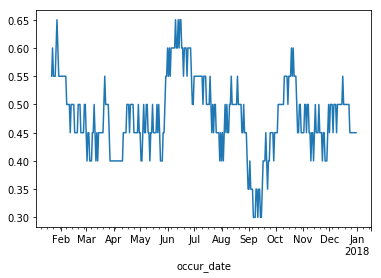

In [339]:
crime_to_compare['Increase'].rolling(20).mean().plot()

In [122]:
import seaborn as sns


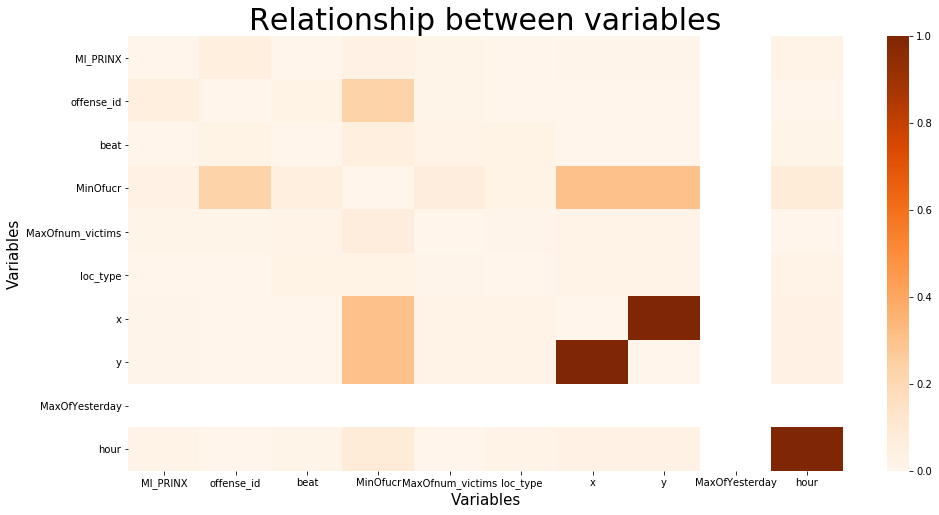

In [346]:
fig, ax = plt.subplots(figsize=(16,8))         # Sample figsize in inches
cor = crimes.corr().abs()
cor.values[[np.arange(8)]*2] = 0
sns.heatmap(cor,cmap='Oranges');
ax.axes.set_title("Relationship between variables",fontsize=30)
ax.set_xlabel("Variables",fontsize=15)
ax.set_ylabel("Variables",fontsize=15)
ax.tick_params(labelsize=10)


In [238]:
crimes.head(2)

,MI_PRINX,offense_id,rpt_date,occur_date,occur_time,poss_date,poss_time,beat,apt_office_prefix,apt_office_num,...,MaxOfnum_victims,Shift,Avg Day,loc_type,UC2 Literal,neighborhood,npu,x,y,Quarter
0,8924155,173650072,2017-12-31,2017-12-30,2019-03-20 23:15:00,2017-12-31,2019-03-20 00:30:00,510,NaN,NaN,...,2.0,Morn,Sat,13.0,LARCENY-FROM VEHICLE,Downtown,M,-84.38013,33.75582,Q4
1,8924156,173650102,2017-12-31,2017-12-18,2019-03-20 13:00:00,2017-12-30,2019-03-20 22:00:00,501,NaN,NaN,...,1.0,Unk,Unk,13.0,LARCENY-FROM VEHICLE,Home Park,E,-84.39745,33.78674,Q4


In [239]:
crimes['UC2 Literal'].value_counts()

LARCENY-FROM VEHICLE    9365
LARCENY-NON VEHICLE     6168
AUTO THEFT              3039
BURGLARY-RESIDENCE      2476
AGG ASSAULT             1913
ROBBERY-PEDESTRIAN      1089
BURGLARY-NONRES          709
RAPE                     189
ROBBERY-COMMERCIAL       145
ROBBERY-RESIDENCE        125
HOMICIDE                  69
Name: UC2 Literal, dtype: int64

In [250]:
%matplotlib inline
gy = pd.DataFrame(crimes.groupby(['occur_date','UC2 Literal']).size())
gy.columns = ['num']

gy.reset_index(inplace=True)

pivoted = pd.pivot_table(gy,values='num',columns='UC2 Literal', index='occur_date')
pivoted = pivoted.divide(pivoted.sum(axis=1), axis=0)

pivoted.columns=['LARCENY-FROM VEHICLE','LARCENY-NON VEHICLE','AUTO THEFT','BURGLARY-RESIDENCE', 'AGG ASSAULT','ROBBERY-PEDESTRIAN','BURGLARY-NONRES','RAPE','ROBBERY-COMMERCIAL','ROBBERY-RESIDENCE','HOMICIDE']

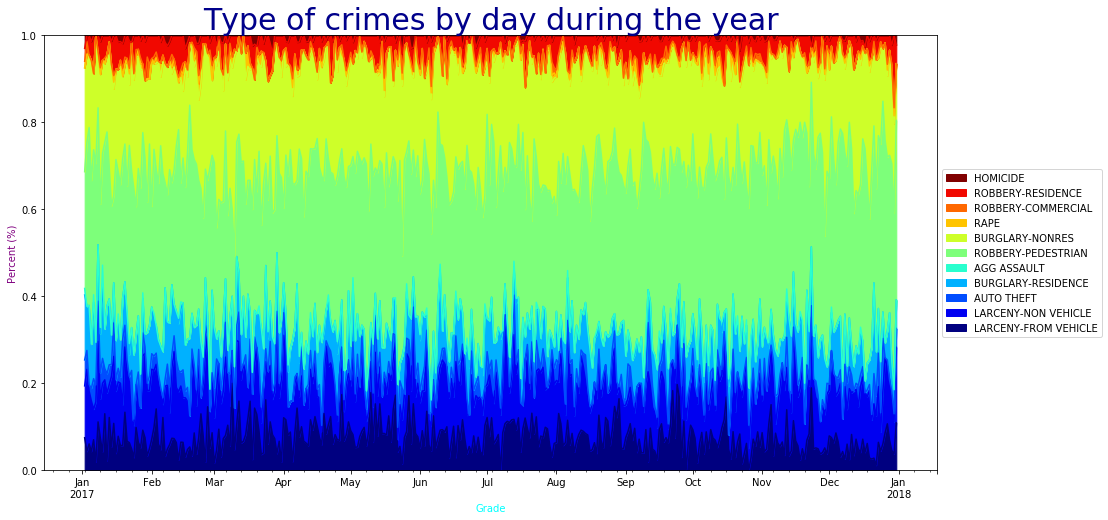

In [251]:
f = plt.figure()
plt.title('Type of crimes by day during the year', color='darkblue',size=30)
ax = pivoted.plot(kind='area', stacked=True,figsize=(16,8),ax=f.gca(),colormap='jet')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Percent (%)',color='purple');
ax.set_xlabel('Grade',color='aqua');
ax.set_ylim(0,1)
plt.show()

In [252]:
gy = pd.DataFrame(crimes.groupby(['Quarter','UC2 Literal']).size())
gy.columns = ['num']

gy.reset_index(inplace=True)

pivoted = pd.pivot_table(gy,values='num',columns='UC2 Literal', index='Quarter')
pivoted = pivoted.divide(pivoted.sum(axis=1), axis=0)

pivoted.columns=['LARCENY-FROM VEHICLE','LARCENY-NON VEHICLE','AUTO THEFT','BURGLARY-RESIDENCE', 'AGG ASSAULT','ROBBERY-PEDESTRIAN','BURGLARY-NONRES','RAPE','ROBBERY-COMMERCIAL','ROBBERY-RESIDENCE','HOMICIDE']

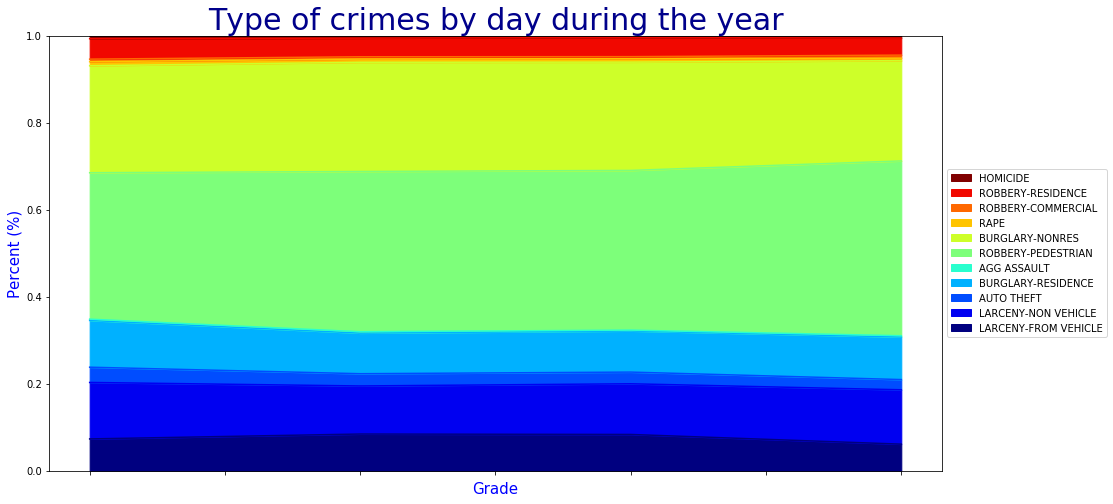

In [256]:
f = plt.figure()
plt.title('Type of crimes by day during the year', color='darkblue',size=30)
ax = pivoted.plot(kind='area', stacked=True,figsize=(16,8),ax=f.gca(),colormap='jet')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Pdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABFkAAAH4CAYAAACR5TLSAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvNQv5yAAAIABJREFUeJzs3XmcFMX9//F37YLcyn3ItQjCsqCcEdTEqMEjiaBiYqJ845Fool+j5ktGo/kpxiMe34yKJkRUPOIZb9TEM4lRv6JGjKKIi6JySAQ5VVhY2N36/VHdOz29Pddu7wG8no8H7HR3dXX1TPdM16erqo21VgAAAAAAAGiYouYuAAAAAAAAwM6AIAsAAAAAAEAMCLIAAAAAAADEgCALAAAAAABADAiyAAAAAAAAxIAgCwAAAAAAQAxaNXcBAKCxGZMcI+l/JH1dUh9Jbb1Ff7I2cUpzlSsfxiRnSjrXmxxjbeLt5izPjsiY5DGSHvMm/8faxMzmLE9jMCbZWdIGb/JxaxPHNGd5mkNL/5yNSf5C0vXe5LHWJuY2Z3mamzHJuZKO9ia7WJvY2JzlAQAgLgRZgAYwJlki6ZOYsjvV2sSdMeUFjzHJoyQ9Kql1c5cFAHZWxiQnSjrSm/yztYny5iwPAADNhSALgJ2WMckiSX+QC7BYSXMkvSLpCy/J8mYqGgDsbCZKusR7/bYkgiwAgF0SQRagYT6XdGyW5YdKOtt7/YKkG7Ok/XdchUKtMkkDvdcPWpv4aXMWpj6sTfxC0i+auxwAGsbrvtSiujABAID4EWQBGsDaRIWkjP3qvXESfMt39T74zaB/4PVbzVYKAAAAALsEni4EYGfWJvC6stlKAQAAAGCXQEsWoIUwJvmspMPlxg7Z29rERznSd5L0maQOkhZbmygNLKvzlA1jkuMl/VzSN+WesPOFXBelW6xNPKY8GJNsK+nHko6StK+k7pK2yA3++5ykG61N/Ce/Pc5re3tJ+m9Jh0kaIKmdpDWS3pD0kNzgijZivbcljQrNvt6Y5PWB6S+sTXRWPRmTHCn3XhzslW0PSZskfSQ37svD1iZeDq0zWqkWNTdYm/iFMclBks6U9B25lje7K/BklFxPF8qQZ4m3znck9ZP0ldwYCf9rbeIfofUnSTpL0lhJveXe32ckXWZtIq8xa4xJHi3p+5L2l9RLkpG0UtJLkmZbm5ifY/2Okk6XNFnSCEld5IJiayWtlns/n5H0D2sT1fmUKY8yF3w+GJN8X1KppM2S+lib+CrHNgZL+lDu/XjW2sSR2dLnyGuopOly3xF7euVdJOlPku4qIJ+Jkr4t6QBJw+XO4RqlzqsHJD1ibaImYt1+kpZKKpb0krWJb+axvZ/IjYUkSRdam7g637JG5DVJ7vtgf7lj5HNJr0v6o7WJF/JYP++nD+VKG/U0J2OSPeXO5WPkvhO6yjsnvXWyPl0oQ557yJ2f35e0l9x7/7HcYN7X5joGvXz3l+u2+g1JPSStk/vOuNXaxONR3yG58gzlH9wv32PGJMNJF1ibGJ0jr6Ml/UzSaEnd5D7jl+S+uxbkWZ6xkk6V+27up9Tvxr8k3Sfp0ajfjTzzPsHLQ3LfkZdkS++tc7ek//Im97c28VqGdA39Hu0j97Smg+V+n/vLPUlvo6TFkp6VO1fWZcmj4OMaAFAXLVmAlmO299dI+kke6U+UC7BI0q3ZEhqT/G9Jr0o6WVKJXAuPnnJPgnjUmOSfjUlmDboakzxI0hJJs+QqaX29fDpLGiPpV5KWGJM8MY+y52RMMiHpfUm/lLtg7Oxtr5/cODj3SXrNu7BsMsYk2xiTvEXSO3KPhR4jVxlo5ZVxnKRzJL1kTDIc6AnnNVXSAknnyQUXdo+hfEfKBVR+IWmopPZyF+xHSPq7VyGSMckiL4DzvFIXz7vJfa4/kfS2Mcl9c2yrrzHJeXJd5qbJVQI7eNvc28vnX8Ykr/cGIY7KY4Tc53ydpEPkjsvWkjrKHasT5IILzym9+1e9NeB8uMX720HSCXls6jS581nKcY7mKO9/yR0nP5M0KFDegyXdIelpufc8Vz7Xy+33DEmTlDqH28l9/sdJelDSP41Jdg+vb23iU0l/9SYPMiY5LI/in+b9rZJ0Zx7po8ptjEn+Xu5YPVYuGNhG7nj4ntxx/dv65B0XY5Jfl/tO+I1cgKBrDHmOkAv8/dbLc3e5Y28fuQFm38j1/WdM8lK5IOUJct+dbeSCdN+VNNeY5O1qGdeCrbxgxFy535c+ct9H/eR+6+Ybkzw+Wwbed/NtkubLBVBHKv13Y6qkhyX9w5hkfT+fR+QCNpL0Y2OSxTnK1FnuvJKkhVEBlpi+R8dI+lTSTZJ+IBdA7Sj3u9Rd0oGSLpP7jT48351tjOMaAHYFtGQBWo4nJf1H7gL4VGOSM6xNVGVJf7r3d5uy38k+RK7lyTa5O8qvyrWWOUDubl8buYuyTUpViNIYkzxM0l/kLnqtXKuC5+TusnWQu0M6Ta6ydq8xyS35to7JsL1fSfLveFu5C9vn5FpkDJdrQdJP0n6SXjYmOdbaxJeBLP5HrmXJBEkXePNul3uPfdvrUa5WchXaQwJ5PCx3p3Gd3EXtCLlKQplSFewoo+Qqza3kPr+X5FpIDJG0otCyeUrl3ptWkv4o6TW5VgrfkgsoFMm16HlJrrJ6rtwTQO6SuzvezVt/nFxLgbuNSY7J0KphT7lWBH29WW/LfU4fy31mo+SOr55yAR+j0AC+xiRby7UW6OfNel2uorFUUrXcBX2Z3ADSI+v5noQ15Hy4U9KVcneHT1cq6FKHd6yc4k1+LumJ+hTWC5r9SamK8D/k3ud1csfKqXKtW/6QR3bt5I7Zl+WOjSVy+9ld0mBJP5L7vL4h6UFjkpMiPvvZkqZ4r0+TCxBmKvtIuSfOSNKT1iZW5VHGKFfIVZold1zcKzeQ+Da5Y/U0Sb9WquVJU+vrbbub9/c5udYA/eW+s+qjh1xAq79cq73n5VovDZVr2dJb0jBJNyv1eaQxJnmuXEBNcsf4w3KtGTbLfVf8RO746VjPMvqelDtnJ8t9f0ju+/v1ULovlNmNcoGghXKf7ydyAZIfyJ2zrSTdbkzyVWsTdb4fvWDHX+SCh5Jr5XmfXIBgq1xw8kS5gP3Bkp4xJvl1axPbCthPWZvYZkzyDknny31vHalU4DHKf8mdd1JEoDWO71FPG7nviA8k/V2uldtauYD1ALnfpAPl3tO5xiTHW5tYlGN3G+O4BoBdAkEWoIWwNlHl3YW7WO4C+ihlGFTXa949zpuca21iTVQ6zxS5Ctmh1ibeCcy/25jkTXKVtm6SfmJM8s/WJv4W2lZ3uYve3eSaHR9tbeKl0Dbu9O6S/13uYvBWY5LPW5vYlHPH6+7bSEmXe5OVkqZam3gqlCYpd2H/TbnK4bVKBZ3kdx0INVd/N4aBhy9TKsDygaSjrE18GJEu4TXRz1apPFjugvUwaxNvNrBcviPkAl+HWpv4IDD/XmOS8+VaIUnSbXJ3w++VdEowmGdMco6kf8o1Wd9XrtLyXMS27pW7CLdy3SluCC2/35jkNXKf04GSzjUm+YC1iVcDab4pd6dWchWi/8rUjN875jM2cy9Avc8HaxMbjEk+JBeMGG9McnS4+1bAZLnzWJLutDZRn6BeO7mKmR9gSVibuDaU5jq5ynO2p5z5/iTpImsTazNs7yK54Nypcsf5ZEmPh5I9K1ehLpF0sjHJX2fZt9MDr+vVksdrDfYrb7JC0pGhbnj3GZO8Ue6Yzec9aAzj5b6rvmtt4umY8jxALhgyKdwVymt98qbc8TXZmOQwaxOLQ2n6ywUEJRdYO87axJOhNNdKekqui0q9eV1bPzKum6Lv9QK/b0+QCxSeGwrs3WxM8k65IHEHuW4rv45Y/yKlAiz3SPqZNzB9LWOSv5N0g1zA7mtyLeTq033tFrngopE7xrMFWfxA7VZJd0csj+N7VJKWSRqf5bfkt8YkJ8t9V7STax2V63xpjOMaAHYJLaGJKICUW+Xu1EoZWpV4Cq28nBWqUEqSvHk/D8z6ZcS658jdVZWkkyICLH5eC+UugCVXST0pj3JFmS53902SLg0HWLxtfSVXMfD7jp/s3RFsNF6wyR8bZZOkb2cIsPhlfDWPO/e/iDHA4jstFGDxzVYq6DNa0nIvbVprKe/O7hWBWUeEMzImeahckEiSro+oGPh5bZC7E73Vm/U/oSRDAq/nZBsnwdrE2/mMP5GnhpwPswOvs52j/jKr1JgkhfqBUq185oYDLJJkbWKLXCuybIFWP+2rmQIs3vKtcuewn9ePItLUKPWd00NuDIg6jEm2UWociuVywZn6+B+5cUgk6dfhcY68Mi0LbKu5XNkIFdELo8aa8ca9Ch4LUd0/fqZUF7JrwwEWL5+vJP1QLnjV3OarboDF9yulfhejvo/2UOpcfUPSyeEAi1R77J4r1/VOcgGLgq+DvaCSH3z9bqYuW8Ykv6bU2GCPeN+HweVxfY/K2sRnuX5LvGPA//6a4r1vuTTGcQ0AOz2CLEAL4jWD9oMKRxo30GQa7+72NG/yY7nWI9l8KjfOQiYPemkk6TBjkh1Cy/2K1gdRF+ohjyvVjDjvft8+Y5JGbnwQyV34Z+wC4bXeud2bbC3X8qcxHatUpWWOtYmPG5jfOkn3NzCPsI+sTTwTtcCrYATvft7mVaqjvBJ4XRax3D8mrNIre1HbXSnXtUOSJnmfsS9YERqRLZ8YNeh8sDYxT9K73uQ073xM47Ui8Ae5/We2YFwOwTvNGd9naxMbVf9ATjivSrlWEpLrbhflNqW6252eIc1xSo3fcFuGynNW3rHiB3E2KUv3LGsTryj9+G5K1XItgOJUoeyfaXAA66hz1H/faiT9PlMm3vn5cMGli9/vMx0j1iZWy3V/kaL39RhJnbzX12c71rxl/sC1veVa69WHH6wIdgsMC54bUcduXN+jhZjn/S2Sa6mSTWMc1wCwS6C7ENDy3CzXTL9Yrn/7ZaHlx8uNNyLluPvv+UeOFgI1xiT/KXcnuFjuKTMvS7VPEynxkq427okbuXwpd8E7PI+0YXvLjQUiSa/m0XLhOaXuYE5QlkpYDL4eeF2v8TVCXqtPF5IcwmMghK0OvP5XpkTWJr4wJrlVbuyRLhFJvuH93ShpP1P3KSJhfkC/i1zF5jNv+gW5AVFbSfqd1xrpbmsT7+fKsAHqfT4E3CwXAOws16IqPCbSj5Xa53oPeCvXpUFyT/DKFUD4u6QLc2XojRVznFwAZ4zc59FR0Tdd9jQmacLvl7WJ1cYkH5cbdPYwY5Il1iaWhtb1K5g1SgVDC7W33HssSfO8VjvZ/F2um1tTK8/WQqieFuTY35WB12nnqDHJ9koFIz6wuZ/49k/Vv+VhXCKfuBOwUq6LY1tjkm1DAeJvBF53yeN3qmfg9XC5cVAK9YTc91gfua6FVwfPEy84+0Nv8oMMLUDj+h6t5Q2A+yO57mZD5AZLbh1O56lzEyekMY5rANglEGQBWp6n5fpXD5R7esEVoTtzhT6tY0mBaYLdbkoCr7+h9IvZXKIq57kEm11HdXkJC6Zp7KcMBS9I4wgCrMydpGC5xiypLDBtW+9f2EDvbxcVPthoF3mVA2sTK4xJ/j9J13jbuVDShcYkP5NrTfOypKesTeRzDOerIeeD7265MneQOx9rgyxe94NTvcn1co/aLZh3p7qXN/mJzf3o6pz7ZUxyiNw4T/m2GiqSC8BEBTtnywVZjFxQyR9g1d+O/3jnp617KlF9BN/7Qj+3ptQY53Kuym3wXA6fo72UqpDn0+Kuoa3y4lDo/gaDLCWB17NUmPr8TgXHULtIblywQ5TeuuiHSrWuyRRojeV7VKod+Pf3ks5Q9gHXg3I9za4xjmsA2CXQXQhoYbyAit9MfKCkw/xlxiRLlWpR8RdrE3XuZEXIp7/95sDr4JMm8umznclu9VinU+D15oypUoID63bKmCoewQvSggf0jZDrrnx9FNIlo+DuG1LtHdqGBOjTjgtrE/8r9+SLl+WazUsuYPY9uUEqPzQm+XeT43HSBWjI+SBJsu5JVn/2Jr/hnZe+w5WqPN3ldb+pjw5K/UYXWuY6vM/tb0oFWD6Tq/z9Qu6pK1PlWrccq/RWTpkeUfsPSX43qPCjbGN5dLXS3/sGvweNqLnP5bBgF7eW/L4FNWR/m/p3ynerUuUOd5sLPv3vT+EV4/4elRvA90y5865K7klLF8l1ZTpeqXM7ONBv1sdPq3GOawDYJdCSBWiZ5ki6RO4cPV2pQSPr87SO9rmTpF2Ub8rweqa1iToD7sUseMc8PDZMlGAlrLEfKRl8RHRHxRNo2RFtkatYFEl629rEmIZm6I0j84wxSf/xwQfIDQg5Rq7ScKik14xJHmRtYn4DN9eQ8yFottwjcCUXVEh4rxv8RB3PZqXe50LLHOUnSgV/HpN0QqYAkDHJs3JtzNqENSZ5i6TfyT0d5duS/hJ6dPVnyv7klVyC730c70EhduSbUMGgSVO/b80heJx08cYoanTWJpYbk3xa0nclHWtMspu1iXXeE/L88Ywet9FP/4vte9SYZDelHuu8VtI3bYbHM0eMuQYAaAQ78kUEsNPynkrjPzp1ijHJnsYkd1NqoLwVkiIHOI0wJHeStDTB/vvB5sJNMTBpsGXO3hlTRafJNe5AQwW7PNRnvJmdgtfSyv+c9vaOy7jy/tzaxCPWJn5pbWKcpL2UGv+mner3uNWwhpwPtbxgjz9A7EnGJHfzgkSTvXmvZKro5MMb38EfQ2dQqKVIrjJHmRR4fU6OFjYDsywLukOpbhx+N8bJSnVzuj389KoCBd/7Qj+3KMF9znXcds9jey3VaqVaWOyVR/p80rRkwd+pqIFxG5M/AG4bpX6fcw14G/f36DeVumk6M8f3Tr7nNgCgAQiyAC3Xzd7f1pJOlnuCgv8o5UKe1nFIticReMv88ROqJf3bX+aNheFfwB7k3TFrTB8q9Vjm/fO46xZ8glHGgVxjEhz8dEojb6ule9H720GB7mxx8wZT/YFSd6q/njl13up9PkTwz1H/UcanKDXIZENasfj8Y7qdpIk50n4rx3I/8FGZbYwUY5J7Kb8Ap6xNrJP0iDfpP8rWr2BauacQNcSHcoOCSu77oM6TnEJyvQfBFg65Hvme6clKLZ73+GK/oj00j8fbHxzTpoO/SfV9+k19vBh4fWzGVI3jKblHlEvS6cYk2yr1OPFPlP3pf3F9j/YKvP4oR9o6j8AGAMSPIAvQcv1NqYEcT1P9n9bRX258i0y+76WRpOesTYT75/uDerZR3Scdxcq7e+8PANhB0n9nSmtMsrvcgJuSe5xsrsdLN9RjSo1vcJpXGd1VBccYuMyYZJvG2pD3FJFV3mRxAx5d6mvo+RB0n1LdyE5XqvvQF5IeakghPcHBMKdnSmRMco/AtjPxj902xiT7Zkl3cZ5l8wUfZTtDqUrc36xNfFJgXmm874O53mQnpVrL1GFMcn/lfrLQIqXG/TkkS1695cax2JH5LSGLJJ2dKZF3LGQ7HwoR7LbTlN1SHg1s+wxjkoOaasOhMdTK5B7F7D+6PNfT/+L6Hg2OuzM4UyJjkgdLOqie2wAAFIAgC9BCeRdnflPjoUo193/G2sSKArP7ozHJOt19vL7jwacxXBux7rWSPvde/7cxyUu9cRciGZPsYkzyPK/SUx/XyQVNJHfhWefOmzHJjpIeUOpi9k95DgJcb95d+5neZEdJTxmTzHjH35jkBK+yttOxNvGcUndox0p62Jhkxqd0eF1pfmhM8seh+acZkzwxW+XCmORhSnUDeSePR5bnoyHnQy0vAHOPN3mY3HkqSfd6rQka6gGluqlNNSZ5bjiBd+f8HqU/ljbKG4HXv40KVhmTTCg1nkperE28rFSriTMUz6Org2bKtSiSpKuMSR4YTmBMcoCke3NlZG3iC6Uec76vMckfhdN4AauHFDHg8Q7mZqUGLv2lMcnJ4QTGJDtJul/5jduSj2BQbWxMeebkfTdf4012lBvfKWv3VmOSXzcmeXlMRZgjN9islLoxUCXXnS6juL5HlX5unx31u2NMch+5oDAAoAkw8C3Qst0h6Qqljx8Q2cc7iyckHSVpvjHJOyTN8+YfIPeoWf/xn7dZm6jTtNkbyG+qpOfkLsZnSDrZmORDkhbK3UHcXe4O2gS5rhatlRqboiDWJt4zJnmRUo/1fdrb1nPetobLtWDxWxt8JOmX9dlWPVyi1KCswyQtNCb5iKSX5AYc7CipVNKRkkbJDdy6KjKnHd8Jkl6V+9yPkrTMmOSDcl1c1st1cekrV3k4XO4JIOGgxUhJ50q6yZjkc5LmywUVquSawB/i5e27MoZyN+h8iHCz6ra4iiXAYG1iqzHJ0+UGjy2SNNOrLD8i9wjuIV6Zh8i1esnWVeJmufd6N7nuh6XGJB+Q6w7YV67lxkRJS+XGfCrkce03yz0JyrdGqRYoDWJtYoExyWsk/VqudcQ/jUneI+mfcsHYsXItXPZQ7vdAcgP1+l2c7jAm6T96t1rSvnLfLT3lAlw/iGMfmoP3ePQL5YJUrSU9bkzyYblB1P3v0Z/IPZr+IbkWXFLDnvLzLy/vjpLONCa5We6c9sfC+dLaxLxMKzfQlZLGyXWrHSppgTHJv0p6QW5sn2K5bn37ygVEB8iNqVRoy606rE18ZkzySaUfe/k+/a/B36PWJhYZk/yH3ADhvSQtMiY5W9J7cuf7QZKmyR0Hdys1dgwAoJEQZAFaMGsTa71K/AnerPo8reMFuUFyb5R7xOOZEWkezDDfL8crxiQPkLvrOVxu8LxEpvRyd1DXF1jO4Pb+15iklfRbuQvD4xXdfP8NSUd7j9RtdNYmqoxJfluui8TJchewJyj1+YQ1pMLSolmbWGNMcoKkO+UqB53kKm2Zuq1YpQ9sLKXen93luixk6rawVdIvrU08kmF5IRp8PgRZm3jHmOSrSnVVecPaxNsxlNPP/xljkqfIBW7ayI07Eh575FlJP1eWAIO1iY+8O+B3yJ1TE1R33JGP5caWuaLAYt4lNyixP2bKndYmtmdJX6iL5CqXZ8ldt5yi9BY3/nfFfOUIslibeNSY5I2SzpGreJ/q/fNVy3XN+kQ7cJBFkqxN3OCNo3WR3Bgp31cqmOK7Q+77zJ9f76e0WZvY7LUO8QPkF4WSLJA0ur7559h2jTHJ78kdu7+UO8anKPv4WRnHJqqH2Uo/9vIKtMb0PSpJJ8kFHodI6iLpwtDyKrknEC0TQRYAaHR0FwJavr8FXt9Rn6d1WJu4Sa4SeJfcnepKuZYXz0o6ztrED3JViqxNLJBrefB9uab5H8ldkFfJDVb7ltwF+39J6t3QO5bWJn4nF9C5TtK7cuNcbJO78/643J25iY3dTSiiXFutTZwiabykP8p1lfhSrnK2Qe4O5HVe2d5pyrI1NWsT66xNTJY7tmZJekcuuFYtd2wslms1cI6kEmsT4ZYs58sNZjtD0vNyA0hulTum1svd4b1CUqm1iT/GWO4Gnw8hwXM0rm4ytaxN3C13B/5Wpcq7Rq5Sdaqk7yh9XIZM+dwraT+5bgMr5VqCrJU7Zi+QNMbaxMJ6lG+jXIDDNydT2vqwNmGtTfxcrgXCXLnui9vkKskPS/qWtYlwhT5bfufKtXh4Vq5F0Da5Y+8eufP2+jjL35ysTcyQdKCkP8u16NgmV0l/StIx1iZ+LFcp99U7OO5t73/l3tu/BLbXJKxNVFubuFAu0HC5pFfkjpXtcoH/5XKf+SWSxlubOCbGzb+oVDfXQp7+F8f3qKxNrJRryfMbud/LLXKP8v5QrvXr16xN3BBeDwDQOIy1cXRvB9BYjEn+RdJ35e5gDbE28XEe6xyj1KCZ/2NtYma29ADqz5jkQrlHnG+S1MfaxKYcq+xUvKcKLZdrZfKitYmDm7dEKIQxyYuVGtT8UGsTLzRneXZEXisaf7DrS61N/KYZiwMAaGa0ZAFaMGOSJZK+7U0+n0+ABUDTMSb5DbkAiyTdt6sFWDynKdX9+OZsCdGyeI/F9rumbFb6IKrIn9+9sFoNf3Q5AGAH16RBFmPM7caYz40xkc2RjXOjMWaJMeYdY0yTjU4PtFAzlDpPb2zOggBI5z2h5zfepJX0++YrTfMwJtlVrhuD5LqHPNyMxUGAMcmu3hOzMi3vINd1bKA3695dNEjYIMYkD5IbdFaSHqvH0/8AADuZph749k5Jf5DrBx/l25L29v5NkHST6g7MB+y0jEkOlBuHpKPcOAv+gIxvWJsodMBbADEzJlkqqURSZ7kBj/3K1SP1Gc9kR+QNgr273FNPzpXU3Vt0ZcwD3qJh9pT0rjHJN+XGDVosN37U7nID0P5QqUd/r5L0/5qjkDsaY5KtJE2SGzi5TG5sKcm1YonrsdAAgB1YkwZZrLUvGWNKsiQ5WtJd1g0U85oxprMxpo+1tkkHtgSa0bGSwoMubpJrjg+g+Z0hF1gIWhUxb2f2R7lHlAe9IHdjBC3POO9fJh9KmmxtYm0TlWdH11HS0xHzf7uzD3YOAMhPSxuTpa/cqOy+T715wK7Gyj3942FJ+3HhBrQ4NXKPQ71d7skd/2nm8jSHSknvyz2t5ShrEzvtI8t3UIvlHmE8S+7pbyvlnt61Ve766gm58VhGWJtY3FyF3MF9KTeOzTRrE5c0d2EAAC1Dkz9dyGvJ8hdrbZ1+wsaYv0q6ylr7f9703yWdb619MyLtTyX9VJI6dOgwrrS0tDGL3SDrlyzR1i++aO5iAADQaExzF2AH15LfP55DGS/eT7RU3YYOVZtOnZq7GBm9+eaba621PZq7HEAuTT0mSy6fSuofmO4nN5BeHdbaWyTdIknjx4+38+fPb/zS1YOtrlb5LTfr+fPP17ZNmyXVvZCqM22yL8+4XoHTjZFXrGXK8T40dhmi5jf5+1KP96CxytSQ9Rqcl2mBZWrgevmej9neg0I//0Lfl1zbKiR91m2ZwsqdK/9C9ivubZmIibi23ZDPr9BtZUof/l4GED9r6wZick3nShP3+vXZho2Y2ZRlbtJ9tvFssynLXNS6tXa/+moNPfbYDLk0P2PMsuYuA5CPlhZkeULSz40xf5Yb8PZXR1utAAAgAElEQVSLHX08FrtmjfpOP0unSFLbZi4MsBOxGS5g8rnAKDRtfbfRkLIUdNFkc6ev70VdU+RbO13ARWlD5tVnPSsXaMh2B7rOsoiKUqZtNXTbufItdJuRy41kwvtkc0dd/PQ59yGQlVXdoE/UvEzLwtsJbjvT6+C0n1cwXb7S8rTpeZnIRMF1bdZtZi2XrbtvUt2PKNN7my2NjSpN1PHg52Wiy9rQFhzZPptMy7IdNw0pSNSxE0qS13aNsbXpJfee1tmR8Dr55NuIaXLdJMi07/nepCh0+1HbLGRbDS1r5M0Q73V4XIZCg9+50hQSiM+5rart2r5ieYZSAChEkwZZjDH3SzpYUndjzKdy/bhbS5K1drakp+SeqLJEUoVST1bZYZndd1flsd/T+w8/Unuhk+miLmq6IRd6kQIbitpOZIHSFtmsFxXBeVnThfLP9wc2n4uWTBfa+axXSPps28z2Q5ltGznLkCHjTD+k+exPPmXKlr6Q9YJlKuSiqs50ge9DvtOFpIsrr/rk4++/CU1nWj/fC61CL/AKfZ+yliP2WhCaRkOrzdgx8DkDhQiPxhBna5Vc+RW6zdrrso4d1GfI4Ay5AShEUz9d6IQcy62ks5qoOE3CtG+vzsccp9F/e1b66qvmLg4AAACARpRv1/8WpbiVDHc8gFi0tKcLAQAAAAAA7JAIsgAAAAAAAMSAIAsAAAAAAEAMCLIAAAAAAADEgCALAAAAAABADAiyAAAAAAAAxIAgCwAAAAAAQAwIsgAAAAAAAMSAIAsAAAAAAEAMCLIAAAAAAADEgCALAAAAAABADAiyAAAAAAAAxIAgCwAAAAAAQAxaNXcBAAAAAOwETOCvyT7fmIhlmfIw3ss80+ZcJ0M+kWXKUU5TQNq0dfJMK5PnexUqQ6Hvr1pXSNXbBaDhCLIAAJqGyZ2kRW1nRytvU22nicprdqT3panKWsi2IipxWStd4Xl++jzT+vPrVGpzVLTT1skjbcH70YSV5zr70QiV55yBhogy5FyngZ+9oV18k7FWkvUncv+1eaZzr7er5otlMZcY2DURZAF2dibDPwUuosIXTv7FXJZldS4OI/6ZqGXKkH+27WfYRsbtN9U2igrcx0zvYbZtZJNHmiarqAJAC9e4FdQc28i2nWx516TPszawucB2w+UIrxOel/fr0LSV99Pjv0hbZtLTB5aHkoYyC+UXnpeP8LqBrZk6L7wUJiL7OvnUnVe7L8H54YwCy2qvE8LlCG/LhJKErw9y/K0TsMuWR3Df/RdtO6h4n8EC0HAEWRCtPpXO8Bd9qDIaXKfeFVv/By5DhTfj9gup2DbRNkzU/MA2YguA7ORqL2jDF7H+xWVNaF4ojQ3Pr8my3P/np6kKXPBmuZj28zD+63B6RcwzoWUtQO0F9I6gkIvzXPnkkmM7JqbPsYUdDmipgsdjpgpgbbpADTi8zIQWhSputRXUcIXOKn3Ev/DvqrzvwUy/X6HtmfC8ovTltYK/z1F5Zrom8dcpikgXfh2YZzLlk2FbdfYjQ76ReQVl/CwbMD+2PCO+pZqr/DvStlpK+Vttl1SVIQGAQhBkaWwVG1X8/my1HbdFqoqoOId/UDNUuPOtuEsxbWMXkLVyHr6zFFEJj6x851pek0pXkyl/RWw/218/vQK/nX7lXiatwt7gentoA+ELwLS7Qhl+2I2XTpJUHPjrH39FqdcqVur4LA4sD/4zgfWLveM3allRaH0TMV0UOD+KMvwNllGpednOuQYtz/R+ZpNv2oLT5XEBHev2GpC2pZarkHQttVyFpG20Y7GJ8mwR5109ygJg5xTVYim4rEHzt0nbl9enVABCCLI0turtMuveVqvuVXXuakf+U4Y7717l3AbXV+hvMP/wsqi/SuUZvtOadsc625dzPStpkZVzPwJgQusFmlvWVs7DaaTo1i+ByrgJTYcr6mmV91DFXEWh5UZ1KvMmU6U8qnKeTyVbqhMAK6iSLklFtoHrN3D7+QYQdhaBIFpkAC5TYC7L90HWqFi+EbPGziPftNkuDqPSmtB0Q7Yd13qNnX9912vI+1Wf9aLyiWKyLKtPfoWu1xj7Fkee4fxjyTP0ux3OM2obJsd0IQq5JmhoHoVuK7hfmdaN2vds71lUoaKO92yfQ6Yy1Cd9zvLlsa181y/0c850XDXmtrJtP1Oehb4ncW4rnzwD0zZqusikT3sXxrb2ussElqXmpW58tVXrAQN22ks0oCkRZGlsHbtIJ14q3f8rqbqybmW8qO60pLrBgUIrsA2uQOdROW9wAKCB61OBz68CHxW0y1aprw6lD6+riPnheVF/FZ6f4YPyLypzVdpMaF54hfCxEPU64sIl699wvnEd67mO86gy5hJ3ulxpd9bzDthhxBHx2TnVrZCGKqNSqkLqzZdM4LX3Ii19ej5uXRN4nTnftHy8NAXla1ILbZbyhfehTr7Bpsu164bzDZQvsK0604H0GfONKF94HyK3W5tvKh+3P1Kw+XWd6Yz55vMeh/OJyLfOZ5sj31A+md+bDPmGttsYRq7fotaNljuw6yDI0ti2r5Gp/oXM8c1dkByyVeCzVewLqcDbiPThdRUxPzwv+DfTa7/fSlQFP1xJD9+1KqQCnzF9aF7U/KaqwBdnWZZpG02iZVYI/Isa61+UGffXv8CxxkQs9y84A/MUSJtreSBv/yLMT5exjPkq+POMYZv12m7+mWSKz8UmQ/6NOiZNxm3GlFEBRY/vs47n/cpYnoKyL6wsjX+MxXSeZcw/e+VNSq/wpVXUpegKc3BenhXSjBVm/3sunG+9KrY58t1V+kC3JH6Talt7JISmU2nSL7FsWstqExyx13rLA9O1eXvJTJZt1+Zrw3n4y1P5FNnQmRjelvHz8yYC+2KD2/LLG3FiG0m2tiyBC9aIy8209yDt2tbNqHuE+3l5BU07Iaw7J2wgXSAwVNGlRnvULS6AAhFkaWzFnaUOP5T+/YCbzlSBD35pxl2BD+aTqUJd31YlreqxfpNomRX4phCMM6VX5tMr8NHBgujlmQIA4eCDf4GcMbhQj23nX7bUtoP7XlvOcNmi9sNvaguEL7LrlUf07MxHWUzfWwVmU9BRH8f7Uug2pXq8NfmvENfAxIWxjbvdQOUxNa1QxTZiecEVUlvbKzVnXv42TbA86StmqpDWKUtgW/7+hC+XwhXS6DTB6y+/Qmr8GrC3YrBCGly7bgW1dkRfr95dO9Bv3Z3x6r/hQJP1fp/czFS1OLDt8PVibckC77r/RoYen2Nr90WBDyaVr619H/z0qSCATdv9zC1OUvts0sqXqYWJAkUKt1wJt6Cxwe0a775d4PnRkYG4cL7+tUQg37SC78KK1FG7q19zFwPYKRBkaWzF7aS+R0tb/ypVf9XcpdlhpAIFGSrrhbYUSFuepZKdpYKfa3laAECZKvtxBDKyL98hLhSsV8HwL5r9aa/i4V/AGwXS+ZWD4Lp+mhqrIm8wo1S+fh5KVQ4CV2+mzt2uQLrApW3qSix4QRq4ejfuyjR1Qem/9jM2dS+Qg9Uf//Pz85J/DNm6F5yNIsPxEjE7trJkPESjF8SxXZN1u1HbLPA8ium0y7ivjXheZ95moTk1/D2L7xgrrCyxbLexj+sC39707gVSjZFSj7pJVeTTKrlSnYptVIUaAABkRpClkVlZWVXJFhlJRXUrxKpbGU9vdeAvz14Zb1irg/DyPAMZsW67bpCkxfMr/l5QoLYyHwgG+EGEYLpg8CA4rZrUHUETCDrU3oUL5F27fX+baeVy/7l5JnU3zr/gTr8dpdqAQehC29YGDCTjfT5ePMG7OWZkA3f9agMLSn2WMlbWpj73VLrs50Cw9Yn7W5S1dcoOcbwAAAAA2OkRZGlkVVqrhT2ulHr0be6iRKsJ3PEPtSpIDxaEWxVI8loQpNZx03KL0tK7fLx1AkGD2mq9Py/w2k1nakngCwUMagMFXmXfRThkZdJySL9Dl8qjNpBgTG1wwF8/GDSqE1SSsganaoKBswzBNAIFAAAAALBjI8jSyIrUQV23TZRZ97RMbW061B0h2KQ30O0g1Uog1O3A71NbO8/j39kPdAR2AQBb2xIhWME3eQYI3FgVSgUKFJ2WIAEAAAAAYFdGkKWRFau9dt/te1re513VaHNzFwcAAAAAADSSotxJAAAAAAAAkAtBFgAAAAAAgBgQZAEAAAAAAIgBQRYAAAAAAIAYEGQBAAAAAACIAUEWAAAAAACAGBBkAQAAAAAAiAFBFgAAAAAAgBgQZAEAAAAAAIgBQRYAAAAAAIAYEGQBAAAAAACIAUEWAAAAAACAGBBkAQAAAAAAiAFBFgAAAAAAgBgQZAEAAAAAAIgBQRYAAAAAAIAYEGQBAAAAAACIAUEWAAAAAACAGBBkAQAAAAAAiAFBFgAAAAAAgBgQZAEAAAAAAIgBQRYAAAAAAIAYEGQBAAAAAACIAUEWAAAAAACAGBBkAQAAAAAAiAFBFgAAAAAAgBgQZAEAAAAAAIgBQRYAAAAAAIAYEGQBAAAAAACIAUEWAAAAAACAGBBkAQAAAAAAiAFBFgAAAAAAgBgQZAEAAAAAAIgBQRYAAAAAAIAYEGQBAAAAAACIAUEWAAAAAACAGBBkAQAAAAAAiAFBFgAAAAAAgBgQZAEAAAAAAIgBQRYAAAAAAIAYEGQBAAAAAACIAUEWAAAAAACAGBBkAQAAAAAAiAFBFgAAAAAAgBgQZAEAAAAAAIgBQRYAAAAAAIAYEGQBAAAAAACIAUEWAAAAAACAGBBkAQAAAAAAiAFBFgAAAAAAgBgQZAEAAAAAAIhBkwdZjDFHGmMWG2OWGGMuiFg+wBjzgjHmLWPMO8aY7zR1GQEAAAAAAArVpEEWY0yxpFmSvi2pTNIJxpiyULKLJD1orR0j6YeS/tiUZQQAAAAAAKiPpm7Jsp+kJdbaj6212yT9WdLRoTRW0u7e6z0k/acJywcAAAAAAFAvrZp4e30lrQhMfyppQijNbyQ9Z4w5W1IHSZOapmgAAAAAAAD119QtWUzEPBuaPkHSndbafpK+I+luY0ydchpjfmqMmW+Mmb9mzZpGKCoAAAAAAED+mjrI8qmk/oHpfqrbHegnkh6UJGvtq5LaSuoezshae4u1dry1dnyPHj0aqbgAAAAAAAD5aeogyxuS9jbGDDLG7CY3sO0ToTTLJX1Lkowxw+WCLDRVAQAAAAAALVqTBlmstVWSfi7pWUnvyz1F6D1jzGXGmClesl9KOt0Ys0DS/ZJOsdaGuxQBAAAAAAC0KE098K2stU9Jeio0b0bg9SJJBzZ1uQAAAAAAABqiqbsLAQAAAAAA7JQIsgAAAAAAAMSAIAsAAAAAAEAMCLIAAAAAAADEgCALAAAAAABADAiyAAAAAAAAxIAgCwAAAAAAQAwIsgAAAAAAAMSAIAsAAAAAAEAMCLIAAAAAAADEgCALAAAAAABADAiyAAAAAAAAxIAgCwAAAAAAQAwIsgAAAAAAAMSAIAsAAAAAAEAMCLIAAAAAAADEgCALAAAAAABADAiyAAAAAAAAxIAgCwAAAAAAQAwIsgAAAAAAAMSAIAsAAAAAAEAMCLIAAAAAAADEgCALAAAAAABADAiyAAAAAAAAxIAgCwAAAAAAQAwIsgAAAAAAAMSAIAsAAAAAAEAMCLIAAAAAAADEgCALAAAAAABADAiyAAAAAAAAxIAgCwAAAAAAQAwIsgAAAAAAAMSgVXMXAAAAAACQmZVUreK0fzUqqjMv17Ko+W5ea/1ENc29m8BOgSALAAAAAOTJSrIysQQ48l2nRsX1Lm+RqlWkmrSci1SjVqpSK233trJZq1WhbvG9TcAuiyALAAAAgB1WY7byyLRMMvUubTDQEd5SG1WqSDW1/4ys91cysjKytdv2gz013l8bSO3m+7mk78d2tU6blozaqI2KNTiGTwMAQRYAAAAAsbBSoPVFpq4pO04rj+ighw0EPIL7blTjBT0UCHQEAx7VKpYN7U8w6FH/4A2AloIgCwAAALCT2plbeQSDHpLSgh62NshRt5VHeuAjfSvbtFtakIigB4BCEWQBAAAAmkCuVh7ZAhqFBj+au5WHC234++1e0coDwK6AIAsAAAB2SbTyCLbySAU7JBO5FVp5AEBuBFkAAADQ7BrSyqPQFiBxtfLIFPBoXdvKo9oLW9i8W3mkj/iR3sqjJlR+WnkAQMtDkAUAAAB17AqtPIwX4qCVBwAgLgRZAABAk7Bpr00sr+PMq7Hybeoy1nfsjvA/qyLVV6GtPFJBj/SAhz9V4+1XMOhBKw8Ab775Zs9WrVrNkTRSasCXFlCYGkkLq6qqThs3btzn4YUEWQC0aLkqZfnOa+j6mSo2TbV+ttf1WWdHy2tHKGM+6VpimZomLyq4zSn8DJVw4KO1thfUyiPYrSU1L9Uphie2AGgqrVq1mtO7d+/hPXr02FBUVGRzrwE0XE1NjVmzZk3ZqlWr5kiaEl5OkKWRWVltV7WqvDssjVkJbEnrt/TlDd0/1m+q9bkI37nVHYwx/Q525mUNT5cePshv/eCRmbtNRq48w+MyZCtf3ens++DeW5P1fco+z8+jrqhl4bKGl9k6aaLytbIRZc6Hv43w9sLz8s3NL4nkfseDe+3vR9Re2rTp9HXddDDXbO9IqsR+urr7kCpJ+Ejw56VCJnVbrdDKA8BOYiQBFjS1oqIi26NHjy9WrVo1Mmo5QZZGtklf6Q96TdK3mrsoqCO9gpepMpJP5as+eUTnFVVBq1uBy5Rf6nVNWkWo8HvUwelUdSW6glnovFS5Ms9LVScyXfoHK2T5VOBSuaavU8gvcnplp27Fq+6nH6zipS/3K1uZt5+pAlU3j0x5hytpqXzznx/c53BZClk/nFd8LSTqn1fmM6xh+ebOiwotAAAxKSLAgubgHXeRXdQIsjSyNmqrfTRAm/RiXnfnwpWu6DtX4XzS79dF3QtMryanp03lEa44Rt1xiy5h1J22qPXDJYvKN9u81Hai5wdlayERruQ1ZwuPzKGN+qxP5Q0AAAAAmgtBlka2m3ZTqfbX41qlbdrW3MUBAAAAgJ3S/3bvPmrLunWx1XHbdetWdf7atQuypWnfvv2YioqKt/zpG2+8sdv8+fM73HXXXcslKZlMdp81a1YvSerYsWNNMplcccQRR2ySpP3222/YihUrdlu5cuW7RUWuUcSkSZMGz5s3b/eKioq3Fi9evNtRRx2194cffvieJL3wwgvtzzvvvP5r165tbYyx++2336Y5c+asuOOOO7r425w+ffqe99xzT/euXbtWbdmypWjYsGFbrrrqqpXjxo3b6m/z888/b922bdsaSSopKdn6zDPPfBzXewZGYAYAAAAA7ATiDLDEkd/999+/xx133NFj3rx5iz/55JP3brrppmWnnHLKoOXLl9fm26lTp+rnn3++oyStXbu2+PPPP28dldeKFStaTZs2bfDVV1/96dKlSxd+9NFH7x155JFfbty4sU6d/owzzlhdXl6+aNmyZQu///3vrz/iiCOG/ec//6nd5l133fVxeXn5ovLy8kUEWOJHkAUAAAAAgJglk8neV1111ad9+vSpkqSvf/3rFccff/y6a6+9tqefZurUqevvvfferpJ0zz33dJ48efLGqLyuvfbanscff/y6SZMmbZakoqIinXrqqRv69+9fla0Mp59++oZvfOMbX9x2221d49szZEOQBQAAAACAeqisrCwqLS0t8/9dddVVe/rLlixZ0u7AAw+sCKb/2te+VvH++++386cPP/zwr1577bWOVVVVeuihh7qedNJJ66O2s2jRonbjx4+viFqWy5gxYyrKy8vb+tMnnXTSXn55f/azn/WrT57IjDFZAAAAAACohzZt2tSUl5cv8qf9MVkypbfWypjUwypatWrlj63SdevWrUXDhg2LfSBPa9MfnHLXXXd9fNBBB9UrYIPcaMkCAAAAAEDMhgwZsuWVV15pH5z35ptvti8tLd0SnDdt2rT1F1xwwYCpU6duyJTX8OHDt8yfP799puXZvP322+2HDx++tT7ronAEWQAAAAAAiNn06dNX/frXv+63atWqYkmaN29euwceeKDb9OnT1wTTHXHEEZvOOeecz3784x9HdhWSpEQi8fmDDz7Y7R//+EdtK5k//vGPXYOD6Ea58847O7/88st7ZMsb8aK7EAAAAABgh9euW7equB/h3JD1p02b9sWnn36628SJE4cbY2yHDh1qbr/99k8GDhy4PZiuqKhIl1122epsefXv37/qrrvu+vi8887rt27dutZFRUV24sSJm370ox/VGSh39uzZvR588MFuW7ZsKRo6dOiWZ599dvGee+5Zuy8nnXTSXv4jnLt27Vo1b968Dxqyn0hnwv2zdkTjx4+38+fPb+5iZPSu3tHjekzbFHv3OgAAAABokDZqo+/peA1TaXMXJSNjzJvW2vHBeQsWLFg6atSotc1VJuzaFixY0H3UqFEl4fl0FwIAAAAAAIgBQRYAAAAAAIAYEGQBAAAAAACIAUEWAAAAAACAGBBkAQAAAAAAiAFBFgAAAAAAgBgQZAEAAAAA7PC+7Nt91JftzLjY/vXtPirXNouLi8eVlpaW7b333iMOPfTQIWvXri32l82fP7/txIkTh5aUlIwcOHDgyPPOO69PTU2NJOnGG2/s1qVLl1GlpaVlQ4YMGXHkkUfu9dVXXxVJ0vTp0/fs2bPnvqWlpWWDBg0aMW3atAHV1dWSpOOOO66kb9+++5SWlpaVlpaWjRkzpjSc36BBg0ZceumlPSXp0Ucf3X306NGl/narqqpUWlpa9vzzz3cI70uvXr32HTp0aNnQoUPLJkyYMHTJkiWtJWn79u21++n/u/jii3tJ0j333NO5tLS0bNiwYWWDBw8ecd1113WXpHPOOWfPyy67rKckHX300YP69u27z7Bhw8pKSkpGTp06tWTp0qWtw9v18/7JT37S31+vd+/e+27dutVI0vLly1sNGDBgpL/eW2+91faggw7ae+DAgSP32muvEUcdddReK1eubDV37txOnTp1Gh0s75NPPtkp7wOpgQiyAAAAAAB2fOvXtWrq/Nq0aVNTXl6+6MMPP3yvc+fOVb/73e96SNKmTZvMscceO+T8889ftXTp0oULFy5c9Prrr3e85pprevjrTp48eUN5efmiJUuWvNe6dWt7++23d/GXnXHGGav9ZeXl5e2eeuqp2iDBFVdc8Wl5efmi8vLyRW+99VZ5OL9XX321fObMmX2WLFnSeurUqV/269dv28yZM7tL0pVXXtlz9OjRmw877LDNUfszb968xR988MGi/fbbb/Mll1zSx5/fvn37an+b5eXliy6//PLVW7ZsMdOnTx/wzDPPfLh48eJFCxcuXDRp0qSvovK9+uqrVyxevHjRRx99tHDkyJFbDjnkkKGVlZUmuF0/79tuu22FP98YY2fNmtUtnN+mTZvM0UcfPeSss876fNmyZQs//vjj904//fQ1q1evbiVJEyZM+CpY3smTJ0eWqzEQZAEAAAAAoIEmTpy4eeXKlbtJ0q233tpt/Pjxm6ZOnfqlJHXq1KnmpptuWn7DDTf0Ca+3fft2VVRUFHXt2rU6vKyystJUVlYWdevWrSrfcvTu3bt6wIABlStWrGgtSbNmzVpx/fXX954/f37bOXPm9Lzhhhs+zZXHAQccsOmzzz7bLVua9evXF1tr1bNnzypJateund13330rs61TXFysyy67bHXnzp2rH3vssd1zleOMM85Y/fvf/753VVX67s+ePbvbhAkTNv3gBz/4wp939NFHfzV27NitufJsbARZAAAAAABogKqqKr3wwgudjjnmmI2S9N5777UdO3ZsRTDNiBEjKisqKorWr19fJElPPvlkl9LS0rLevXuP2rhxY6sTTjhho5929uzZvfxlgwYN2nrAAQds8ZdddNFF/fxuMFOmTBkULsuHH364W2VlZdGECRO2SNLAgQO3n3HGGZ8ffPDBwxOJxGe9evWqE8wJe+aZZ3afMmXKBn+6oqKiONj95o477ujSt2/fqoMOOujL/v377zt58uRBN998c1e/W1Mu++yzT8X777/f1p8+4IADhvl5X3HFFT39+Xvttde2MWPGbLr55pu7BtdfuHBhu7Fjx0a2xpGk119/vVOwvIsXL84aMIoTQRYAAAAAAOqhsrKyqLS0tKxLly6jN27c2OqYY475UpKstcYYE7mOP9/v3rNmzZoFw4cP3zJjxozefhq/u9CaNWsWVFRUFN1yyy21XYmC3YWeeOKJT/z5Tz75ZJchQ4aMGD58+D5nnnnm6vbt21t/2QUXXPB5dXW1zjnnnHXZ9ueAAw4Y1rVr11GvvfZapx//+Me1QZZwd6FTTz11gyQ98sgjS5966qkPxo0bV3Hdddf1PvHEEwfm875Za9Omg92FLrroos+Dy2bMmLFq5syZfWpqaqLf0Ajh7kLDhg3blu+6DUWQBQAAAACAevDHZFm6dOm727ZtM1dffXVPSRoxYsSWN998s30w7aJFi3Zr3759TZcuXWqC84uKijRlypSNr7zySseI/O3hhx/+5UsvvZRz4NbJkydvWLJkyXvPPPNM+YwZM/ovX768dkyZ4uJiBYM+W7duNX4rj0QiUduFad68eYuXLVv27qBBg7aef/75e+bzHkyYMGHLb37zm9XPP//8B08//XSX3GtI7733XvuysrK8uvaMGTNm6957773lvvvu6+zPGzFixJZ///vfdQbvbQkIsgAAAAAA0ADdunWrvvHGG5fPmjWrV2VlpfnpT3+67o033ug0d+7cTpIbqPWss84acPbZZ6+KWv/ll1/uVFJSUmc8k5qaGr366qsdBw8enHWsk6BJkyZtnjp16rprrrmmV6Y0bdu2tX4rj2Qy+VlwWadOnWpmzZq14oEHHugWfFpS2Pr164uefvrp2sDQv/71r+BlH/MAACAASURBVPZ77rln1hYjNTU1uvTSS3tu2LCh2G/1k4+LL774sz/84Q/Blj7rX3vttY4PP/xw7bguDzzwwB5vvvlm2+gcmg5BFgAAAADAjq9r/oPDNkZ+Bx544Jbhw4dvmTNnTpeOHTvaRx99dMmVV165Z0lJyciysrIRY8eO3XzhhRfWdoXxx2QZOnRo2TvvvNPuyiuvrA12+GOyDB06dER1dbXOO++82vWCY7KUlpaW+Y84DrrkkktWPfDAA903bNhQrzr/4MGDt3/nO9/ZcO211/aQ6o7JcvbZZ/e11pqrrrqqT0lJycjS0tKyq666qs+cOXOWRuV3wQUX9B82bFjZXnvtNXLBggXtX3jhhQ/atGlT22coOCbL9773vZLw+vvvv/+W0tLS2nFpOnXqVDN37twlM2fO7DVw4MCRgwcPHnHPPfd07dOnT5VUd0yWu+66q3M4z8Ziwn2hdkTjx4+38+fPb+5iZPSu3tHjekzb1GTdwAAAAAAgL23URt/T8Rqm0uYuSkbGmDetteOD8xYsWLB01KhRa5urTNi1LViwoPuoUaNKwvNpyQIAAAAAABADgiwAAAAAAAAxIMgCAAAAAAAQA4IsAAAAAAAAMSDIAgAAAAAAEAOCLAAAAAAAADEgyAIAAAAA2PEluo/SmWZcbP8S3Ufl2mRxcfG40tLSsr333nvEoYceOmTt2rXF/rL58+e3nThx4tCSkpKRAwcOHHneeef1qampkSTdeOON3bp06TKqtLS0bMiQISOOPPLIvb766qsiSZo+ffqePXv23Le0tLRs0KBBI6ZNmzagurpaknTccceV9O3bd5/S0tKy0tLSsjFjxpSG8xs0aNCISy+9tKckPfroo7uPHj261N9uVVWVSktLy55//vkO4X1Zv3590Q9/+MOB/fv3HzlkyJAR++2337AXX3yxvSQtWbKk9aGHHjpk4MCBI/v37z/ytNNO61dZWWkkae7cuZ2MMeN+//vfd/PzevHFF9sbY8ZddtllPSXp6KOPHtS+ffsxX375ZW0M4kc/+tEAY8y4tWvXFm/fvr32vfT/XXzxxb0kady4ccNKSkpGDhs2rGyfffYZ/vrrr7fLVebt27erU6dOo4P7d/HFF/dq167dmA0bNtSWYe7cuZ0mTZo0ONfnXAiCLAAAAACAHd/mda2aOr82bdrUlJeXL/rwww/f69y5c9Xvfve7HpK0adMmc+yxxw45//zzVy1dunThwoULF73++usdr7nmmh7+upMnT95QXl6+aMmSJe+1bt3a3n777V38ZWecccZqf1l5eXm7p556qpO/7Iorrvi0vLx8UXl5+aK33nqrPJzfq6++Wj5z5sw+S5YsaT116tQv+/Xrt23mzJndJenKK6/sOXr06M2HHXbY5vC+nHjiiSW9evXavmzZsoVLlix57/bbb1+6evXqVjU1NZoyZcqQ4447bv2yZcsWfvzxxwvXr1/favr06Xv66+69995bHnrooa7+9D333NN12LBhW4L59+vXr/LPf/7zHpIL9rz++usdu3fvvt1f3r59+2p/v8rLyxddfvnlq/1l991330eLFy9edMopp6w577zz+uUqc9Rn9cgjj3QtKyuruP/++ztn+0wbqsmDLMaYI40xi40xS4wxF2RIc7wxZpEx5j1jzH1NXUYAAAAAAAoxceLEzStXrtxNkm699dZu48eP3zR16tQvJalTp041N9100/IbbrihT3i97du3q6Kioqhr167V4WWVlZWmsrKyqFu3blX5lqN3797VAwYMqFyxYkVrSZo1a9aK66+/vvf8+fPbzpkzp+cNN9zwaXidBQsWtFm0aFH766677j9FRS5MMHLkyMrjjz/+y8cee2z33Xffvfqss85aL0mtW7fWLbfcsuLee+/tUVFRYSRpwIABlZs2bSr+7LPPWtXU1OjFF1/c/ZBDDvkiuI3jjjtuvR+IeeKJJ3bff//9v/K3la+DDjpo06pVq1rnKnPU/lVXV5sZM2b858EHH+waXh6nJg2yGGOKJc2S9G1JZZJOMMaUhdLsLelCSQdaa0dI+kVTlhEAAAAAgEJUVVXphRde6HTMMcdslKT33nuv7dixYyuCaUaMGFFZUVFRtH79+iJJevLJJ7uUlpaW9e7de9TGjRtbnXDCCRv9tLNnz+7lLxs0aNDWAw44oLZVyEUXXdTP71IzZcqUQeGyfPjhh7tVVlYWTZgwYYskDRw4cPsZZ5zx+cEHHzw8kUh81qtXrzrBnLfffrvdiBEjKoqLi8OL9O6777YbNWpU2r507969umfPntvef//9Nv68KVOmbLj77ru7PP300x3Hjh27uXXr1ja4TllZ2dZVq1bttm7duuL77ruv67Rp09YHl1dUVBQHuwvdcccdXRTy5JNP7vGd73xnY64yh/3pT3/qNnXq1PVHHXXUV4sXL263atWq3CvVU1O3ZNlP0hJr7cfW2m2S/izp6FCa0yXNstZukCRr7edNXEYAAAAAAHKqrKwsKi0tLevSpcvojRs3tjrmmGO+lCRrrTHGRK7jz/e796xZs2bB8OHDt8yYMaO3n8bvLrRmzZoFFRUVRbfcckttwCHYXeiJJ574xJ//5JNPdhkyZMiI4cOH73PmmWeubt++fW2Q44ILLvi8urpa55xzzrpC99Faq6h9Ce/jySefvP7RRx/tcu+993Y98cQT19dZQdJ3v/vdDbfffnuXd999t/2kSZPSuiyFuwudeuqpG/xlJ5544uBevXrtO3v27F6//OUvC44RPPbYY11OPvnk9cXFxTriiCM23n333XUCOHFp6iBLX0krAtOfevOChkoaaox5xRjzmjHmyCYrHQAAAAAAefLHZFm6dOm727ZtM1dffXVPSRoxYsSWN998s30w7aJFi3Zr3759TZcuXWqC84uKijRlypSNr7zySseI/O3hhx/+5UsvvdQpvCxs8uTJG5YsWfLeM888Uz5jxoz+y5cvrx2bpLi4OC1QsnXrVuO3GEkkEn1Gjx69ZdGiRe39AXaD9tlnny1vv/122r6sXbu2+PPPP29dWlpa6c8bNGjQdmutXnvttU7f/e53v4oq40knnbT+t7/9bb9DDz30i0K6Ct13330fLVu27N2jjjpqw89+9rMBkpStzEH/93//137lypVtvvWtbw3r27fvPn/961+7PPTQQ92yrtQATR1kiQrl2dB0K0l7SzpY0gmS5hhj6gxMY4z5qTFmvjFm/po1a2IvKAAAAAAA+ejWrVv1jTfeuHzWrFm9KisrzU9/+tN1b7zxRqe5c+d2ktxAuGedddaAs88+e1XU+i+//HKnkpKSyvD8mpoavfrqqx0HDx5cZ1kmkyZN2jx16tR111xzTa9Madq2bWv9FiPJZPKzUaNGVQ4bNmzLeeedt6f/JKIFCxa0ue+++/Y49thjv/ziiy9a3XTTTV0lN4bMmWee2f/EE09cE2wtI0mXXXbZfy6//PJPM3XhKSsr23bhhReuPPfccwuuxLdt29becMMNK//1r391euedd9pkK3Nwvbvvvrvrr371q5UrV658d+XKle+uXr36nRUrVuz2ySeftC60DPlo6iDLp5L6B6b7SfpPRJrHrbXbrbWfSFosF3RJY629xVo73lo7vkePHuHFAAAAAIBdSYf8B4dtjPwOPPDALcOHD98yZ86cLh07drSPPvrokiuvvHLPkpKSkWVlZSPGjh27+cILL6zt6uKPyTJ06NCyd955p92VV1752f9n787joq72/4G/zszAAILKgA6KbCowLIoKpddMy7T03txNU6+WlZXLtZtlmrlkpV/MrNy7XssrKCqZilq3xepnC2XhgggOiAsiu7KJwMDMnN8fODQgq2Hq7fV8POahc875nPP+fPKfefc+52Pps5zJ4ufnF2QymTB37tzq66zPZNHpdIHl5eU3FDMsWbIke9euXa7WrytuzI4dOy5cunTJxsvLK9jX1zfo2Wef9fLw8KhUKpWIiYlJjY6O1nh5eQV37tw52NHR0fTee+/V/i2PRx55pGTSpElFdc1vMW/evDydTldRu732mSz/+Mc/au96gZOTk/m5557LCQ8Pd2soZst4s9mM/fv3O48fP776vBuFQoFHHnmk8D//+Y8GAH744Yc2Wq22u+VjeW31zRJS1i4kqWOQgALAIwAGoepcFTcAdgDyAaQA+BHAHilxseF5hOr6+IcAZAD4FcBEKWWi1ZghACZIKZ8QQrgCOA6gh5Sy3r1jYWFhMi4urtH7uF0ScBIx2IsK3PDviIiIiIiI6LZSQ42xGAd/6G53KPUSQhyVUoZZt8XHx18ICQm5fLtioj+3+Ph415CQEO/a7Q1mtYSAkxBYjKrqkn0AHgSQev3vWwF8D8AewHwA54TAl0Lg/vrmk1IaAcwC8AWA0wCipZSJQog3hBDDrw/7AsAVIUQSgG8BzG0owUJEREREREREdCdQNdJ/HlWVJHMB7JcSdR5eAwBCoCeAcQD2CIGlUmJdXeOklJ8B+KxW22Krv0sAc65/iIiIiIiIiIjuCo0lWR6REkebMpGUOA7guBB4E4Dn746MiIiIiIiIiOgu0mCSpakJllrXlALQ33RERERERERERER3ocYqWeolBIIBDEDVa5kPS4mEFouKiIiIiIiIiOguc1OvcBYC0wF8B+ABAH8F8IsQmNGCcRERERERERER3VUarGQRAg7Xt//UNg/AX6RE8vVxTwF4E8CGlg+RiIiIiIiIqBFHXENgvHLTuzVuoHIxovfl+IaGKJXKUF9f3zKTySQ8PDwM0dHR511dXU2W/qVLl7Zfvnx5p8zMzHgXFxcTABw8eNBpwoQJXTp16lRhMBjEqFGj8letWpVlaXd3d6+wXB8eHp4+cuTIel9AQ3eexipZUoTApDraBQCz1XfZciERERERERERNVNLJliaOJ9arTbr9fqkM2fOJLZt29a4cuXKdtb9u3fvdgkODr62ffv2ttbtYWFhJadPn046ceLE6d27d7t8//33DpZ2vV6fZPkwwXL3aSzJMhHAHCHwkxC4x6r9bQA/C4FoIXAQVRUs4bcqSCIiIiIiIqI7WZ8+fa5lZGTYWr4nJiaqS0tLFW+88UZGdHS0pq5rWrdube7WrVtpcnKy+o+LlG6lBpMsUuI7AGEAPgKwXwhECIEOUmI9gIEAfgDwJaq2Dq295dESERERERER3WGMRiO+/fZbp5EjRxZa2rZu3aoZPXp0/pAhQ0rOnz9vl5GRcUNlTHZ2tvL48eOtevToUQYAcXFxjjqdLtDySUxMZPLlLtPowbdSQkqJfwPwB5ADIEEILACglxJrrn9O3OpAiYiIiIiIiO4kBoNBodPpAp2dnXsUFhaqRo4cWWzp27t3r2bKlCn5SqUSQ4cOLYiIiHC29MXFxTkGBAQEPvTQQ34vvPBCdlhYWDlw43ahoKAgw+24L7p5TX67kJQolhJzAfQB0BuAXgiMvWWREREREREREd3BLGeyXLhwIaGiokKEh4e3B4AjR47Yp6WlqYcMGeLn7u7ebf/+/Zrdu3dXbxmynMmSmJh4+pVXXsm7fXdALa3BJIsQcBACbwmBI0LguBDYBKBcSowAMA3AEiFwWAiE/CHREhEREREREd1hXFxcTGvWrLm4fv16rcFgEBEREZqXXnopMyMjIyEjIyMhNzf3ZHZ2tm1KSopt47PR3ayxSpYPAQwDsArAIgBuAL4SAkJKHALQA8DH19s23dJIiYiIiIiIiOqjcjHezvnuu+++soCAgLLNmzc779u3TzNu3LhC6/6hQ4cWbN26tc4DcC1qn8myZcsW54bG051HSFn/25eFQCGAx6TEV9e/OwO4AsBPSqRajXMG8LqUeOEWx1unsLAwGRcXdzuWbpIEnEQM9qICFY0PJiIiIiIi+gOpocZYjIM/dLc7lHoJIY5KKcOs2+Lj4y+EhIRcvl0x0Z9bfHy8a0hIiHft9sYqWfQAJgsBjRBwAPAcgGsALlkPkhIFtyvBQkRERERERER0J7jhFVK1PAHgPwAuA5AAzqOqsqX8FsdFRERERERERHRXaTDJIiWSAfxFCLQCYCslCv6YsIiIiIiIiIiI7i6NVbIAAKTENVRtEyIiIiIiIiIiojo09grnD4WAb1MnEwI2QuApITD594dGRERERERERHT3aKySpRRAvBA4CmA3gFgAp6REmWWAEPACEApgKICRADIAPHtrwiUiIiIiIiIiujM1WMkiJf4BwB/AdwBeAnAEQIkQuCYE8oWAEcA5ADsBuAGYJiV6SIlfbnHcRERERERERNVOom/IcQSGttTnJPqGNLamUqkM1el0gf7+/oGBgYEBX331VSsAOHjwoNODDz7Y1XrsmDFjvLds2eIMAPfee6+/t7d3sL+/f2BwcHBAbGysvWVcUVGRYtKkSZ4eHh7BAQEBgUFBQQGrVq1yBYDk5GRbX1/foLpiqayshLOzc8jMmTPdrdvrW2vYsGE+K1asaGcZ980337Ty8/MLrKysrDHvvn37nIQQodHR0a0tbffff7/vF1984QgAZWVl4oknnvDw8PAI9vLyCh40aFCXCxcu2FhiEkKETp8+vTqmBQsWuL3yyisdAGD27Nkd27dv312n0wV26dIlaPPmzc6WcSNGjPBxd3fvptPpAnU6XWBoaKg/AKSlpdkMGDCgq7+/f2CXLl2CBg4cWOM5326NvcIZUiJdSrwmJTwB6AD8HcBCACsBzATwEIC2UmKYlNh3S6MlIiIiIiIiqoMJhU06c7Ql51Or1Wa9Xp+UnJyc9Oabb2YsWLCgU1Pnj4iIOJecnJw0bdq03Jdffrn6ukmTJnk7OzubLly4cOr06dNJX3311Zn8/PxGY9mzZ08bHx8fw/79+53NZnOja23YsCF97dq1bpmZmSqTyYTZs2d7rl279qKNjc0Nc7u5uVWEh4d3rGvdmTNndqqoqFCcP3/+VFpa2qmhQ4cWjRw5soul387Ozrx//35NTk6Osq7rZ82ala3X65N279599sUXX/QyGo3VfeHh4el6vT5Jr9cnHT16NBkA5s6d23HIkCFFycnJSWfPnk38v//7v4zGns0fqdEkizUpkSIldkiJ96TE/0mJf0mJ/yclSm9VgERERERERER3uqKiImWbNm2MjY+sqX///tdycnJsASAxMVF94sSJVqtXr85QKqtyEh07djQuW7Ysu7F5duzYoZkxY0ZOx44dK7755ptWja3l4eFhnDVrVvbs2bM7rVy5sl1gYGDpI488UlLXdUFBQaVqtdp84MABJ+v2goICxd69ezUffPBBukpVlQd66aWXLgPAp59+6ggAKpVKTpw48XJ4eLi2ofh79uxZrlKp5JUrV+pMxljk5OTYeHh4VJfb9O7du6yh8X+0ZiVZiIiIiIiIiKiKwWBQ6HS6QB8fn6AXXnjBa8mSJVnNnePAgQOthw4dWggAJ06csAsICCi1JFiaqqSkRMTGxjqNHz++6LHHHsvftm2bprG1AGDu3Ll5KSkpdmvXrnVbs2bNpYbWePXVV7OWL1/ewbotMTHRzt3dvaJNmzY1SmdCQkKuJSQkVG+BmjdvXm50dLRLfn5+vTmIw4cPO/j6+pZrtVqTpW3+/Pkelu1Co0aN8gaAGTNm5E2fPt27T58+fvPnz3dLS0u7sfTmNmrRcioiIiIiIiKiPwvLdiEAOHToUKupU6f6pKSkJAohZF3jrdunTJnSuaysTGE2mxEXF3e6rvHz5s1zi4mJ0eTn56tyc3NP1hdHdHR02z59+lx1cnIy//3vfy/o0aNHR6PRWF1dUt9aSqUSTz31VF5cXFwrNzc3U33zA8Dw4cOvvv766+6HDh2qrpKRUkIIccNYKaWwbnd1dTWNGjUqf+XKle1rj1+3bp3bRx991P7SpUu2+/btO2PdFx4enj558uRC67bx48cXDRgwIGHv3r1tPv/88zahoaGBp06dOtVY/H8UVrIQERERERER/U6DBg26VlBQoMrKylK1b9/eWFRUVKOooaCgQNWuXbvq7UQRERHnLl68mDBy5Mj8adOmeQJASEhI+enTpx1Mpqp8wYoVK7L1en1SSUlJg6UtO3fu1Pz444+t3d3du4WGhgYWFRUpDx48WL21p661LBQKBRSK31IDW7ZscbZUj1gfyAsA8+bNy1q2bFl1NUtwcHD5pUuXbIuKimrkFhISEhyCg4NrbON57bXXciIiItqVlpbWGDtr1qzsCxcunPrggw/OT5s2zbusrOzGrE0tbm5upunTp+fHxMScDwgIKD106JBTY9f8UZhkISIiIiIiIvqdjh8/bmc2m6HVao3BwcGGnJwcm2PHjtkBQEpKiq1er7fv06dPjcSDWq2W7733XsaJEydaHTt2zC44ONjQvXv3ay+88IK75QDY0tJSIWWdhTEAgPz8fEVcXJzjpUuXTmZkZCRkZGQkhIeHX4yKiqqxZaj2WvXNN3Xq1ALLYbN9+/atEe/48eOL8vLybM6cOWMPAM7OzuYRI0bkz5gxo5MlMfT++++7mEwm/O1vf6txvkuHDh2MQ4cOLdi1a5dLXes+88wzBf7+/mUffPBBnf0WMTExTiUlJcJy7+np6WofHx9DQ9f8kZqcZBECnkKgzr1OQkAlBDzr6iMiIiIiIiK61ZRo2+xDZ3/vfJYzWXQ6XeDjjz/eeePGjRdUKhXs7e3lli1bzk2dOtVbp9MFjh49usv69evTXFxcbtjS4ujoKKdPn55jORh227ZtF/Lz81VeXl7dgoKCAu6//36/RYsWVZ+Xcv78ebVWq+1u+bz33nvt+vbte9Xe3r46E/P4448XfvXVV21rV4XUXutmzJ07NysnJ6c6N7Bhw4ZLCoUC3t7ewZ6ensH79+93jomJOVvXtYsWLcrJz8+v9wyVxYsXZ61bt05reTuS9ZksOp0u0Gg04siRI626d+8e6OfnF9i7d++Ap556Kve+++67Yw6/bTAjVmOggAnAX6TEL3X0hQL4RUo073SeFhIWFibj4uJux9JNkoCTiMFeVKDidodCRERERERUgxpqjMU4+EN3u0OplxDiqJQyzLotPj7+QkhIyOXbFRP9ucXHx7uGhIR4125vznahhvZF2QG4Y8pziIiIiIiIiIj+aA2+XUgIdAfQw6rpr0LckN60AzAOQEoLx0ZEREREREREdNdo7BXOowAsuf53CWBxPePOA3iupYIiIiIiIiIiIrrbNLZdaDkAJwCtUbVdaOD179YftZToIiUO3cpAiYiIiIiIiIjuZA1WskiJSgCV17/ydc9ERERERERERPVobLvQDYSAH4BOqDqLpQYp8VlLBEVEREREREREdLdpcpJFCAQC2AUgEHW/aUgCt+cVzkRERERERPTn9n9YFlKG0mYXEtTHHg7GV/FafENjlEplqK+vb5nJZBIeHh6G6Ojo866uriYAiIuLs5s1a5Zndna2rZQS48aNu7JixYoshUKBNWvWuCxZsqSTVqutNBqNomvXrmUff/zxBScnJ/OcOXM6btu2zVWj0RgNBoPo27fv1YiIiItKpRJjxozx/vnnn52cnJxMAGBvb28+fvy43no+g8EgnnzyybwlS5bk7tmzp/Ubb7zR8dixY3qFQgGj0Yjg4ODAtWvXpg0ePPia9b1otdrubdq0MV7/e+XOnTvPu7u7Gy3tCkXV5pb77rvv6ocffpg+YsQIn7i4OEdHR0eTwWBQ9OrVq+Tdd9/N8Pb2rrSer/Z1X375ZauXX37Zo6KiQlFRUSHGjBmT36FDh8pNmza1B4CzZ8/a+fj4lCsUCgwePLjIx8fH8Oabb7pb7u3pp5/OW7hwYS4AzJ49u6Orq6tx8eLFuQBQXl4utFptyJNPPpm7evXqTMu9hYaG+ldWVoqTJ0/qAeDrr79utWjRIvfY2NgWf4FPc7YA/QuALYDRAPwB+NT6dG7p4IiIiIiIiIiaoiUTLE2dT61Wm/V6fdKZM2cS27Zta1y5cmU7ACgpKRGjRo3q+sorr2RfuHDh1KlTp5KOHDniuGLFinaWa4cNG1ag1+uTUlNTE21sbORHH33kbOl7/vnncyx9er3e/rPPPnOy9L311luX9Hp9kl6vTzp+/Li+9nw//fST/v333++QmppqM3r06OJOnTpVvP/++64AsHz58vY9evS4VjvBYhEbG5uckpKSFBQUVLZkyRI363bLmh9++GG6pT08PDw9OTk56ezZs6eCg4PLHnzwQT+DwSAauu6ZZ57x+fDDDy/o9fqklJSUxMcff7xgzpw5ly3jNBqN0XLd2rVrMwBg1KhR+Xq9PunHH39MXrlyZce0tDSbuuL/5JNPWnft2rUsJiZGU7svLy/PZu/eva0b/i/6+zUnydITwEtSIkZKnJESabU/typIIiIiIiIiojtZnz59rmVkZNgCwL///W+XsLCwktGjRxcDgJOTk3njxo0XV69e3aH2dZWVlSgtLVVoNBpT7T6DwSAMBoPCxcXF2NQ43NzcTJ6enob09HQbAFi/fn36e++95xYXF2e3efPm9qtXr77U2BwDBgy4eu7cuRuOCKmPUqnEG2+8kdO2bVtTY4mMgoICVadOnYwAoFKpEBoaWt7UdTp27Gj08PCovrfadu7cqZk9e3aOi4tL5eHDhx2s+2bNmpWzfPnyG55/S2tOkuUs6jiHhYiIiIiIiOjPzGg04ttvv3UaOXJkIQAkJiba9erVq9R6TFBQkKG0tFSRn5+vAIADBw4463S6QDc3t5DCwkLVhAkTCi1jP/jgA62lz8fHp7xv375llr6FCxd20ul0gTqdLnD48OE+tWM5c+aMrcFgUPTu3bsMALy8vCqff/753AceeCDg5ZdfztJqtTckc6yZzWYcOHCgTVBQUPWaffv29bes+dZbb7Wv79pu3bqVnj592q6h65555plcf3//4IcffrjLqlWrXMvKyuo6jqROycnJtiaTSYSFhZXV7isuSketPAAAIABJREFULlYcOXLE6bHHHit67LHH8iMjI2tUszz44INXAeDzzz93bOp6N6M5SZaXACwQgtuCiIiIiIiIiAwGg0Kn0wU6Ozv3KCwsVI0cObIYAKSUQoi6cweWdsv2nry8vPiAgICyxYsXV2/PsWwXysvLiy8tLVVs2rSpeiuR9Xah/fv3n7e0HzhwwLlr165BAQEB3aZPn57j4OAgLX3z58/PNZlMmD179pWG7qdv377+AQEBgeXl5YqlS5dmWdqtt/1YzkOpi5Syxve6rnvvvfcyY2NjTw8cOLA4KirK5aGHHvJtKCYA2Lt3r6Zr165BQUFB3WbNmpVtZ2cna4/ZsWNH2379+hU7ODjIKVOmFHz22WfOJlPNfNKrr76a9dZbb93SapbmJFn+D4A7AL0QSBECv9T+3KIYiYiIiIiIiO44ljNZLly4kFBRUSHCw8PbA0BQUFDZ0aNHa2xXSUpKsnVwcDA7OzubrdsVCgWGDx9e+OOPP95QYaFWq+XDDz9c/N133znV7qtt2LBhBampqYmff/65fvHixR4XL16sPlNGqVTCOulTXl4uLBUmL7/8cnXSITY2Njk5OTlpz549FzQajRnNlJiY6BAYGNjo9p/g4GDD/Pnz82JjY1NOnjzZ6sqVKw2+RGfUqFH5qampiZ9++mnyggULPDMyMm44L2fXrl2aw4cPt3F3d+92zz33BOTn59v897//rfHcRo8eXVxcXKw8cuSIQ+3rW0pzkiynAHwGYDuAHwEk1vEhIiIiIiIi+lNxcXExrVmz5uL69eu1BoNBPPvss1d+/fVXp3379jkBVQfhzpw50/Mf//hHdl3Xf//9907e3t6G2u1msxk//fSTY5cuXW7oq8+gQYOujR49+sqKFSu09Y2xs7OTlgqTd955J6u+cU1lNpuxdOnS9gUFBUpLNU99du7c2cZsrsrfJCQkqG1sbMxt27ZtcAuTxSOPPFIyfPjw/LfffrvGlqW8vDxlfHx8q8zMzJMZGRkJGRkZCcuWLbsYFRV1wwG48+bNy1q7dq1b7faW0uQki5SY2tjnVgVJRERERERE1BB7ODT5cNhbMd99991XFhAQULZ582ZnR0dHuWfPntTly5d39Pb2Dg4MDAzq1avXtVdffbV6q43lTBY/P7/AkydP2i9fvrw62WE5k8XPzy/IZDJh7ty51ddZn8mi0+kCy8vLb9iXtGTJkuxdu3a5FhQUNKewol7WZ6uMHTvW29I+f/58D39//8DOnTsHx8fHO3z77bcparVaNnTd1q1bXTp37hys0+kCn3zySZ+PPvrovFLZYCFL7XvLioqKci0uLq6+t8jISOd+/foVW689YcKEws8//7yt9duOrrcXtWnTpklJnZshau+ZavQCAQGgEwAPAPFSos5XP/2RwsLCZFxc3O0Oo14JOIkY7EUFKm53KERERERERDWoocZYjIM/dLc7lHoJIY5KKcOs2+Lj4y+EhIRcvl0x0Z9bfHy8a0hIiHft9mZltYTADAAZANIAfA/A/3r7HiHwzxaIk4iIiIiIiIjortTkJIsQmAvgXQD/BjAQgHXJzf8DML5FIyMiIiIiIiIiuovccCJvA2YCWCwl3hYCtTdMJQPwa7mwiIiIiIiIiIjuLs3ZLuQG4Gg9fWYAdr8/HCIiIiIiIiKiu1NzkiypAAbU09cfQNLvD4eIiIiIiIiI6O7UnO1C7wPYIAQqAOy+3tZeCDwNYA6AaS0dHBERERERERHR3aLJSRYpsVkIOANYDGDp9ebPAJQCeF1KRN2C+IiIiIiIiIga1RcnQwphak4hQYPaQmmMRff4xsZFRES0feKJJ7ocO3YssWfPnuWW9oSEBPXs2bM9UlNT7Vq3bm1ydHQ0vf7665lDhw4tAYDdu3e3Xrp0qXtJSYlCrVbLLl26lL///vuXfH19K+pax9/fP9DPz6/swIED5y1tX3/9dasXX3zRo6KiQlFRUSFGjhxZ8O6772amp6erpkyZ4p2ZmWlrNBpFp06dDIcPH061XLd06dL2y5cv75SZmRnv4uJiAoA1a9a4xMXFtYqIiLhoGXfvvff6v/POO+n9+/cvdXd37xYXF3e6Q4cORgB49913XTdt2tQeAM6ePWvn4+NTrlAoMHjw4KK1a9dmNP+J/29o1j9AKbFSCHwA4C8AXAHkA/hJShTdiuCIiIiIiIiImqIlEyzNmW/nzp2aXr16lURGRmp69uyZCQClpaVi2LBhvsuWLUufNGlSEQD8+uuvdj/99FOroUOHlvz66692L730kufevXtTe/XqVQ4A27dvb5OammpbV5Ll2LFjdlJKHDlyxKm4uFjRunVrMwA8/fTTPjt27Dj7l7/8pcxoNCI+Pt4OAObNm+c+cODA4kWLFuUCwJEjR+yt59u9e7dLcHDwte3bt7edPXv2lZt5PnPmzLk8Z86cywCg1Wq7x8bGJru6uppuZq7/Jc05kwUAICWuSokvpUSUlPicCRYiIiIiIiL6MyoqKlLExcU5btmy5cLevXudLe3/+te/XHr16lViSbAAwD333FNuSWgsW7asw5w5c7IsCRYAmDRpUpGlyqW2rVu3asaNG3elf//+xTt27Ghrac/Pz1d5enpWAoBKpUJoaGg5AGRnZ9t4eHhUJ2t69+5dZvl7YmKiurS0VPHGG29kREdHa1rmSZBFk5MsQmCZEPhXPX0fCIE3Wy4sIiIiIiIiojvb9u3b2z7wwANF3bt3N7Rt29b0ww8/OABAYmKiXc+ePUvruy4lJcXu3nvvrbe/tpiYGM2UKVMKJk6cmL9r167qxMizzz6bExAQEDx48OAuK1eudC0tLRUAMHPmzNx//OMf3r179/abN2+e24ULF2ws12zdulUzevTo/CFDhpScP3/eLiMjo0UrgP7smlPJMgHA9/X0fQ9g4u8Ph4iIiIiIiOjuEB0drZkwYUIBAIwZMyY/MjKyzsqQwYMHd/H19Q16+OGHu9Tuy87OVup0ukBvb+/gxYsXa2v3Hz582EGj0Rj9/Pwqhg8fXpyYmOiQl5enBIB33nkn66effjo9aNCg4ujoaJcHHnjA73osxampqQlTp069nJycbB8aGhqYmZmpAoC9e/dqpkyZkq9UKjF06NCCiIgIZwAQQtR5j/W1U92ak2TpCKC+w2syr/cTERERERER/c/Lzs5W/vzzz61nzpzp5e7u3m3dunVu+/fvdzabzQgKCio/fvy4g2XsV199dfbDDz88X1hYqAIAPz+/8l9++cUBANzc3Ex6vT5pypQpeSUlJcra60RGRmrOnTtn5+7u3s3Ly6vbtWvXlJGRkdVbk4KCggzz5s3Li42NTdbr9fbZ2dlKANBqtabnn38+f9++fee7d+9+7csvv3Q8cuSIfVpamnrIkCF+7u7u3fbv36/ZvXu3BgBcXV2NhYWFNdYvLCxUarVa4615gv+bmpNkyQbQq56+XgDyfn84RERERERERHe+yMhI59GjR1/JzMxMyMjISMjOzj7ZqVOnii+//NJx2rRpV+Li4hy3b9/exjL+2rVr1b+/FyxYkL1q1aoOx44ds7O0lZaW3vD73GQy4eDBg5rjx48nZmRkJGRkZCTs2LEj9eOPP9YAwM6dO9uYzWYAQEJCgp1SqZSurq6m/fv3O129elUBAAUFBYq0tDS1j49PRUREhOall17KtMyVm5t7Mjs72zYlJcW2X79+144ePep48eJFFQB89913DhUVFYouXbrU+bYjqltz9l5FA1gsBPRS4lNLoxD4K4BFADa1dHBERERERERETdEWSmNLv8K5of6PP/7Y5ZVXXsmybhsxYkRBZGSkZsiQISUxMTGp//znPzvNmzfP09XVtbJVq1amBQsWZALAvffeW/b222+nT5kyxefatWsKZ2dnk7u7u2HZsmWZ1vP997//ddJqtRU+Pj6VlrahQ4defeqpp3zS0tJstm3b5jJ//nwPOzs7s0qlkps3bz6vUqnw66+/Orz44oueSqVSSinF5MmTLw8YMKB04sSJXQ4ePHjGeo2hQ4cWbN26VbNs2bLsFStWpA8ZMsTXbDaLVq1ambZt23ZOqfytuCUkJCTQsn1o2LBh+Zs3b750s8/3f5WQUjZtoIAdgP0ABgG4AiALQAcAGgBfAhgpJQy3KM4GhYWFybi4uNuxdJMk4CRisBcVYAKQiIiIiIjuLGqoMRbj4A/d7Q6lXkKIo1LKMOu2+Pj4CyEhIZdvV0z05xYfH+8aEhLiXbu9yVk+KVEO4GEh8AiABwG4oCrZ8rWU+KqlAiUiIiIiIiIiuhs1KckiBNQAXgZwUEp8AeCLWxoVEREREREREdFdpkkH317fBvQagLa3NhwiIiIiIiIiortTc94udARA6K0KhIiIiIiIiIjobtack5dfARAlBCoAfAYgB0CNU3OlRGkLxkZEREREREREdNdoTpLlyPU/1wBYXc8YZT3tRERERERERET/05qTZHkKtSpXiIiIiIiIiO4Erv9FyJXKZv3GbZCLDYyXhyK+oTFKpTLU19e3TEoJpVIpV69efXHw4MHXDh486LRq1Srtt99+m2oZO2bMGO9HH320aOrUqQX33nuvf25uro1arTbb2NjITZs2Xejbt28ZABQVFSlmzJjR6bvvvmvt6OhoVigU8qmnnsp76aWXLicnJ9s++uijvmfOnEmsHUtlZSXat28fMnHixMvr16/PsLTXt9awYcN8+vXrVzJv3rw8APjmm29aPf/8816JiYlJNjY21fPu27fPafLkyV3c3d0rDAaDGDp0aOGGDRsyAODdd991ffPNN921Wm2lZfyuXbvOBgUFGaZOner5888/OwkhpFqtlp988slZPz+/Cq1W2z0xMTGxTZs2Jjs7u1BfX98yo9EoVCqVnDhx4uXXXnstV6lU1ljXMvfKlSvThwwZctXW1jb0+eefz964cWMGACxYsMDNaDSKt99+OwsA1qxZ47J27Vo3KatSGJMnT85bsmRJ7ogRI3zi4uIcnZycTADQqlUr09GjR5Ob8++iMc15hfN/WnJhIiIiIiIiopbSkgmWps6nVqvNer0+CQA++eST1gsWLOg0ePDgJv1oj4iIONe/f//S1atXu7z88sudYmNjzwDApEmTvL29vQ0XLlw4pVQqkZmZqVq/fr1rY/Pt2bOnjY+Pj2H//v3Oa9euzVAofjuCta61NmzYkP6Xv/wlYPLkyQVardY4e/Zsz7Vr1160TrBY9O7d++qhQ4fOXr16VREcHBz4zTffFA4cOPAaAIwaNSr/o48+Srcev379ek1BQYFKr9cnKpVKnDlzxtbZ2dlUe14HBweT5fmlp6erxo4d2/nq1avKlStXZlmva31NZWUl7OzszPv379e8/vrr2Vqttsa8O3bsaLNp06b2X3/9dbKnp6expKREbNq0ycXSHx4enj558uTCxp7nzWrOwbcAACEQKAQmC4EFQsDteltXIeDU8uERERERERER3fmKioqUbdq0MTb3uv79+1/LycmxBYDExET1iRMnWq1evTpDqaw6jaNjx47GZcuWZTc2z44dOzQzZszI6dixY8U333zTqrG1PDw8jLNmzcqePXt2p5UrV7YLDAwsfeSRR0oaWsPJyckcEBBQmp6efmMmxkpWVpaNVquttNyDr69vhaur6w1JFmseHh7Gf//732kffvhh+wZvFICl6iU8PFxbu+/tt9/usHLlynRPT08jADg6Oso5c+ZcbmzOltLkTJ8QcATwEYCxACqvX/s5gGwAywFcBPDyLYiRiIiIiIiI6I5jMBgUOp0u0GAwiMuXL9t89tlnKc2d48CBA62HDh1aCAAnTpywCwgIKLUkJ5qqpKRExMbGOkVGRqYVFhYqt23bphk0aNC1htYCgLlz5+b17NnT5aeffnI6evRoUmPr5OTkKC9evKgeNGhQdTJm7969mtjY2OqiixMnTpx+4oknCgYMGOAfEBDgdP/99xc/+eSTVyzboRrSvXt3g8FgUGRnZysB4MiRI046nS7Q0h8TE5PauXPnCgCYN29ebkhISOCiRYtqJKBSU1Pt7rvvvnpfyjN//nyPZcuWdQSAgICA0r17915oLK7maE451bsA+gJ4CMCPAMqt+j5DVYKFSRYiIiIiIiL6U7DeLnTo0KFWU6dO9UlJSUkUQtR5nql1+5QpUzqXlZUpzGYz4uLiTtc1ft68eW4xMTGa/Px8VW5u7sn64oiOjm7bp0+fq05OTua///3vBT169OhoNBrTVSpVg2splUo89dRTeXFxca3c3NzqrTQ5cuSIk5+fX+D58+ft/vnPf2a5u7tXV+zUtV3I19e3IjU19dSBAwdaf/31105Dhgzxj4qKOvvoo49erW8NC8s5KkD924UAwNXV1TRq1Kj8lStXthdCNDZttTtpu9BoAPOkxLcAaj/8NABeLRYVERERERER0V1k0KBB1woKClRZWVmq9u3bG4uKimoUNRQUFKjatWtXnZyIiIg4d/HixYSRI0fmT5s2zRMAQkJCyk+fPu1gMlX95F6xYkW2Xq9PKikpabC0ZefOnZoff/yxtbu7e7fQ0NDAoqIi5cGDB6urS+pay0KhUMD6/JYtW7Y463S6QJ1OFxgbG2sPVCU7UlJSkn755ZekzZs3t//ll1/sG3seDg4Ocvz48UWbNm26NGvWrOy9e/e2beyakydPqu3s7MwNJXysvfbaazkRERHtSktLq2+gS5cu5T/++KNDU66/FZqTZLEHcKWePifcmHghIiIiIiIi+lM4fvy4ndlshlarNQYHBxtycnJsjh07ZgcAKSkptnq93r5Pnz41tsyo1Wr53nvvZZw4caLVsWPH7IKDgw3du3e/9sILL7gbjVX5mNLSUmFd3VFbfn6+Ii4uzvHSpUsnMzIyEjIyMhLCw8MvRkVFaRpaq775pk6dWqDX65P0en1S7S0+PXv2LJ81a1b28uXL3Rp6Ft9//71DWlqaDQCYTCacOnXK3svLy9DQNRkZGarnnnvO6+mnn85taJy1Dh06GIcOHVqwa9eu6oNt586dm/XKK694pKenq4Cq57ds2bJGz3lpKc3ZLvQrgCmoOoeltrEAYlskIiIiIiIiIqJmcrGBsaVf4dzYGMuZLEDVNpeNGzdeUKlUUKlUcsuWLeemTp3qbTAYFCqVSq5fvz7NxcXlhuIER0dHOX369Jzw8HBtdHR02rZt2y7MmjXLw8vLq1vbtm2NdnZ25kWLFl2yjD9//rxaq9V2t3x/9tlnc/r27XvV3t6+OhPz+OOPF77++uudysrKLja01s08l7lz5+Z17do1+MyZM7bAjWeybNiwIS03N1f13HPPeVVWViqklAgNDS2ZO3duXu25SktLlTqdLrCyslLY2NjICRMmXF64cGF1kqX2mSwLFizInDBhQo2tPosWLcqJjIysTqJMmjSpKDc31+bBBx/0BwAhBKZMmVK9tvWZLABw6tSpJMu2qpbQYEasxkCBfgAOAfgBwMcANgBYAsAfVUmW/lLi1xaLrBnCwsJkXFzc7Vi6SRJwEjHYiwpUND6YiIiIiIjoD6SGGmMxDv7Q3e5Q6iWEOCqlDLNui4+PvxASEvKHvTWGyFp8fLxrSEiId+32Jm8XkhI/oOrQWzWAdQAEgKUAOgMYdLsSLEREREREREREd4Jm1cRIiR8B3C8E7AE4AyiUEvW+GomIiIiIiIiI6M+i0STL9YTKXwF4A8gGcEhK5ABo9B3XRERERERERER/Fg0mWYRAZ1Sdw+Jt1VwsBMZJiS9vZWBERERERERERHeTxs5keRuAGcD9ABwABAE4DuBftzguIiIiIiIiIqK7SmNJlr8AWCglfpQS5VLiNIDnAHgKgQ43s6AQYogQIlkIkSqEmN/AuLFCCCmECKtvDBERERERERHRnaKxM1k6ADhXq+0sqt4s5AYgqzmLCSGUANYDGAzgEoBfhRD7pZRJtcY5AZgN4Ehz5iciIiIiIqI/J9dJCLlytXkvd2mIixOMl7cjvrFxERERbZ944okux44dS+zZs2c5ABw8eNBp1apV2m+//TbVMm7MmDHejz76aFFUVJQmPT1dXVpaqigoKFC5u7tXAMDatWvT7r///tIZM2Z0+uqrr9ooFAp07dq1bNOmTRe7dOlSab1m9+7ddRUVFYqioiJleXm5QqvVVgJATExM6sCBA/3j4uJOd+jQwVg7ljVr1rgsWbKkk2U8AGzfvv2co6OjOSQkJNjb27vc0v7000/nfvjhh+0B4OzZs3Y+Pj7lCoUCAwcOLNqwYUPG73u6/7ua8g9QtuB69wJIlVKeAwAhxE4AIwAk1Rr3Jqq2Kr3cgmsTERERERHR/6iWTLA0Z76dO3dqevXqVRIZGanp2bNnZmPjv/rqq7NA3YmYZ599tlNJSYni/Pnzp1QqFVavXu0ycuTIrvHx8acVit82opw8eVIPAGvWrHGJi4trFRERcbGp9zVs2LCC2uOTk5NtPTw8DHq9vsZv87lz514GAHd3926HDx9OsSRuqH6NbRcCgC+EQK7lg9+qV762br/e1xh3AOlW3y9db6smhOgJwENKebApN0BERERERER0OxQVFSni4uIct2zZcmHv3r3Ov2euq1evKqKjo10/+OCDdJWqKr/zwgsvXLG1tTUfOHDAqUUCpluusczc0hZeT9TRVl0pI4RQAHgPwJONTiTEswCeBQBPT88WCo+IiIiIiIioabZv3972gQceKOrevbuhbdu2ph9++MGhX79+pTczV1JSkrpDhw4VGo3GbN3eo0eP0oSEBPsRI0ZcbepcAwYM8LNUvpSWliq6dOlSvQ3owIEDzjqdztHyPS4u7jQApKenq3U6XSAA3HPPPSWRkZFNro6h3zSYZJGyxZMslwB4WH3vBMC6nMoJQDCA/yeEAKrOfdkvhBgupYyrGZvcBGATAISFhbXkliYiIiIiIiKiRkVHR2teeOGFXAAYM2ZMfmRkpKZfv36lQog6f6PW1w4AZrO5zn4pJa7/Pm4y6609lm1Jlr66tgsBQF3bhaj5WnTPWhP8CsBXCOEDIAPA4wAmWjqllEUAXC3fhRD/D8DLtRMsRERERERERLdTdna28ueff26dkpJiP2vWLJhMJiGEkBs3brzUvn17Y1FRUY3f2wUFBap27drVe6ZJUFCQITMzU11QUKBwdnaurmY5efKkw4gRIwpv5b1Qy2nKmSwtRkppBDALwBcATgOIllImCiHeEEIM/yNjISIiIiIiIrpZkZGRzqNHj76SmZmZkJGRkZCdnX2yU6dOFV9++aVjcHCwIScnx+bYsWN2AJCSkmKr1+vt+/TpU1bffK1btzaPHTv28vTp0z2MxqpczLp161zKy8sVw4YNa/JWIbq9/uhKFkgpPwPwWa22xfWMfeCPiImIiIiIiIjubi5OMLb0K5wb6v/4449dXnnllSzrthEjRhRERkZqhgwZUrJly5ZzU6dO9TYYDAqVSiXXr1+f5uLiYmpozrVr12Y8//zznXx8fIIVCgW6dOlSvm/fvlTrNwv9XrXPZFm7dm2ap6dnZUPXUNMJKe/+40zCwsJkXNydu6MoAScRg72oQMXtDoWIiIiIiKgGNdQYi3Hwh+52h1IvIcRRKWWYdVt8fPyFkJCQy7crJvpzi4+Pdw0JCfGu3f6HbhciIiIiIiIiIvpfxSQLEREREREREVELYJKFiIiIiIiIiKgFMMlCRERERERERNQCmGQhIiIiIiIiImoBTLIQEREREREREbUAJlmIiIiIiIjorufqWhwiRHFoS31cXYtDGlvTwcGhZ319/v7+gcOGDfOxbhszZoy3u7t7N51OF+jv7x8YExPjZOkzGAxixowZ7l5eXsG+vr5B3bp1C4iOjm4NAO7u7t38/PwCdTpdoE6nC3zyySc9LPO1b9++e1lZmQCArKwslbu7e7fS0lLh4+MT9Msvv9hb5l+4cKF24sSJnrXjnD17dkcHB4eeWVlZqrruKzU11WbgwIFdvby8gj08PIKfeeaZTgaDQQDAvn37nIQQoZY4AeD+++/3/eKLLxyt13j33XddR44cWeNZpKenqzQaTYjBYBChoaH+3t7ewZb7+9vf/tbZEtsbb7zR3vo6rVbb/fLly8rKyko4OTn1sLQfP37crn///r5eXl7BnTt3Dnr00Uc7Z2RkqPbt2+c0aNCgLrXvu741fy8mWYiIiIiIiOiud+UKVI2P+mPmO3bsmJ2UEkeOHHEqLi6u8bv7rbfeuqTX65Peeeed9NmzZ3tZ2l988cWO2dnZNnq9PvHMmTOJn3322Zni4mKlpf/w4cMper0+Sa/XJ/3nP/9Jt7QrlUq5Zs0aV+s1HBwc5MqVK9OnT5/uaTabcf78eZutW7e2W716dUZd8bZp08a4fPlybe12s9mM4cOHdx0zZkx+WlraqXPnzp3Kz89XzZkzp6NljJubW0V4eHjH2tdamzx5csHhw4dbl5aWCktbZGSk85AhQwrVarUEgKioqLOW+/v000/PNTRfbSUlJWLEiBFdZ86cmXs9zsRp06bl5eTkNPjf8PesWR8mWYiIiIiIiIha0NatWzXjxo270r9//+IdO3a0rWvMQw89VJKbm2sDAFevXlVERUW127x580V7e3sJAB4eHsZnnnmmoLG1nnvuudyNGzdqKysra7SPHTu2WKvVVq5fv95l5syZHvPnz89s166dqa45Jk2adHnPnj2ay5cvK63b9+7d27p169ammTNn5gOAjY0NNm3alL59+/Z2loRJUFBQqVqtNh84cMCprrkBoF27dqaePXtei46ObmNp++STTzQTJ07Mb+z+muKDDz5w6d27d8n48eOLLG0jRoy42qtXr/KWmL85mGQhIiIiIiIiakExMTGaKVOmFEycODF/165dmrrGfPLJJ20GDRpUCABJSUnqDh06VGg0GnN9cw4YMMDPsrVl6dKl1VtovLy8Ku65556SDRs2uNTs2SpJAAAgAElEQVS+ZsOGDelvvfWW+5UrV1SWREldWrdubXrssceurFixosbWnISEBPuQkJBS6zZXV1dT+/btK06fPq22tL366qtZy5cv71Df/AAwfvz46meRmppqc+nSJfXQoUOvWvonTpzYxXJ/M2bMcLe0r1u3zs3SrtPpAvPz82+oTjl16pR9r169rjW0fl3qW/P3aNFyKiIiIiIiIqI/s8OHDztoNBqjn59fRefOnSumT5/unZeXp7RUkSxcuLDTokWLOuXn56sOHz58uhnzpnTo0MFYV9+SJUuyRowY0XXs2LFF1u3e3t6Vffv2Lf7b3/5WVNd11l599dWcXr16BS5cuDDH0ialhBDihrFSSmHdPnz48Kuvv/66+6FDh1rVN/+ECRMK58+f71FUVKSIiIjQDBs2LF+p/K1wJioq6mzfvn3Lal83a9as7MWLF+davmu12u6N3UtT1bfm78FKFiIiIiIiIqIWEhkZqTl37pydu7t7Ny8vr27Xrl1TRkZGOlv633rrrUtpaWkJ8+fPz3jyySd9ACAwMNCQlZVlW1BQcFO/0YODgw2BgYGlW7duda7dp1AoYJ3MmDFjhrtOpwsMDg4OsB6n1WpNw4YNK1i1alU7S1u3bt3KTpw44WA97vLly8rc3FwbnU5nsG6fN29e1rJly+qtZmndurW5X79+xVFRUW337NmjmTx5cotsFQKAoKCgsmPHjtWb4PkjMclCRERERERE1AJMJhMOHjyoOX78eGJGRkZCRkZGwo4dO1I//vjjGluGlEolFi5cmGs2m8Unn3zS2snJyfz4449fnjZtmmd5ebkAgLS0NJsNGzbUudWoLkuWLMlav369W2PjNmzYkKHX65NOnTp1QxXNa6+9lv3RRx+1l1ICAEaNGlVcVFSk2rhxowYAKisrMX36dI+JEyfmOTg4SOtrx48fX5SXl2dz5swZ+9rzWjz++OP5q1evdisuLlYOGDCgtL5xzfX888/n//zzz467d++ufsvRrl272hw9etSupdZoKiZZiIiIiIiI6K7n4oI6t9LcyvnKy8sVWq22u+Xz5ptvarVabYWPj0/1KbRDhw69mpqaapeWlmZjfa1CocC8efMy33nnHTcAeP/99zNcXV2Nfn5+Qb6+vkHDhg3rotVqq2OwPpNl1KhR3rVjCQsLKw8KCvpdiQsPDw/joEGDCisrKxVAVTIoJiYmNTo6WnP91cjBjo6Opvfeey+zruvnzp2blZOTY1NXHwCMGTOmOCsry3bkyJE3VLFYn4/Sr18/3+bE7eTkZN63b1/q+++/r/Xy8gru0qVL0LZt2zSW7VU//PBDG+v/TocPH3b4vWvWR1gyVHezsLAwGRcXd7vDqFcCTiIGe1GBitsdChERERERUQ1qqDEW4+AP3e0OpV5CiKNSyjDrtvj4+AshISGXb1dM9OcWHx/vGhIS4l27nQff3mLXYMIHMCMDwVDAABWMNT5KmG5os3xuPF6IiIiIiIiIiO5UTLLcYgUmM34CUCk8YRJKoI6TmeujbGIypjmJGwXMTN4QERERERER3QJMstxiikobHP+yx/VvEkIhoVCaIVRmKJQmKFRmqGwrYGtbCZVNJWyu/6myMUKpMsKkMqFSZaq6RmmGUABQAlIBmIUCUiFgFsqGQqhBwNzsxE1TxjFxQ0RERERERH92TLLcYu1sgaVBlXi/8CpMkFAoJIQCEKg6C0dKASkFjGYVKsttUFqqgNmkgNlo+VMJef3v0lzfOcVViRuF6rfkjcrGCJVtBWxsqxI3NtWJm0qYVSqYVCYoVCYIpYRQmK8nbkTVR4ibqrppqWobVt0QERERERHR3YhJllvMRgH42dnAmKPB1WaddS2hUJmhUJqhtDXCRmUGFFUJFKGUEKKqKkYIQIjryRshq1I38rfkTUWlHcrL7WE2K6qTNWajsjqJI031VcHcWHWjtDHBxrYCqutJG+uqG7NKCbPKBJNShUqlGUIpAaUEFJbkjQJm0fyqm5astmHVDREREREREd1KTLLcscT1ZIgSMNT7BqxmkhBK+ds2JTsjhKLq70JRVdEiRFVixJK4UYiq6wDALAVgFjCabFBZqYb5qrievFHWqLwxGxVAvamMOqpubCtgo7ZK3KgqYWNjhNKmElJlglmphFFlc33L1G+JG/NNVt0obkHihlU3RERERERExCTLn4qANAmYTAqYWvJt0qIqaVKVuKmAuJ5EUVgSN9erbCDq3y5lNitRblChrKzVTW2Xql11o7I11qi6UdlU/am0MUKlMgIqBcwqFSotlUGKqnNuLFumzELRrKobQLZ44kYJExS4+1+xTkRERET0R3B1fTvkypWyFvuN6+Jib7x8+ZX4hsY4ODj0LC0tPV5Xn7+/f6Cfn1/ZgQMHzlvaxowZ4/3zzz87OTk5maSUePvtt9NHjBhxFQAMBoN48cUXO3766afOtra20s7Ozrxo0aKMcePGFbu7u3dr1aqVSaGo+k3Up0+fq//5z3/Sx4wZ4/3999+3TktLS7C3t5dZWVmqsLCwgDNnzpwKCgoK3LVr17l77723DAAWLlyoPXfunDoqKuqidZyzZ8/uuHPnTleNRmMEgMGDBxetXbs2IzQ01P/KlSs2arXabGtrKzdv3nyhd+/eZQCQl5enfOaZZzyPHz/eSkqJe++9t+Tf//73RY1GYz516pS6W7duwXPmzMlctWpVFgCkp6erfHx8QqZMmZL70UcfpVvWPnXqlPrhhx/2u3TpUoLl3gDA19c3aMuWLeejo6PbWscGAD/99JP+8OHDrdatW9f+0KFDZy3tI0aM8Bk7dmzB5MmTC0NDQ/3Xrl17sW/fvmX5+fmKGTNmePz4449OarVaajQa48qVK9P79u1bqtFoely9evVEQ8/Dsqazs7O5oX8LFkyy0O8nFTBXKmCubNFJW2S7VKVRDYPB7ia2S12PwZK4UZmhVBl/O6TYKnmjsqmESmWESSUgVQqYlCpUKCWE0my1XcqSuFFAivqSRTdqStVNcxI3rLohIiIiov9VLZlg+b3zHTt2zE5KiSNHjjgVFxcrWrduXf0D/a233ro0derUggMHDjjNmjXLa8SIEacA4MUXX+yYnZ1to9frE+3t7WV6errqiy++cLJcd/jw4ZQOHTrccAiFUqmUa9ascZ03b16epc3BwUGuXLkyffr06Z6//vprclpams3WrVvbHTt27HRd8c6aNSt78eLFubXbo6Kizvbt27ds1apVrnPnzu303XffnQGACRMmePfq1as0JibmPFCVmHjiiSe8LAklT09Pw+eff97WkmSJiIjQdO3ataz2/MHBwQaNRmM8dOhQq4cffvgaAMTFxdlVVlaKfv36lUZHR7etL7ammjhxore/v395WlraKYVCgVOnTqmTkpLUDV3ze9ZkkoXuUHfwdimzCpVltrhWcnPbpYRC/lbto7x+zo3VdilL8qaq6kbAqBSQKiWMSpvr26UkoBQwC1bdEBERERHdibZu3aoZN27cFb1eb79jx462zz33XH7tMQ899FBJbm6uDQBcvXpVERUV1e7cuXMn7e3tJQB4eHgYn3nmmYLG1nruuedyN27cqJ0zZ06edfvYsWOLP/roI9f169e7/Pe//20zf/78zHbt2plu5n769+9f8q9//as9AMTHx6tTUlLsv/jii+oqklWrVmV6enp2S05OtgUAe3t7s5eXlyE2Nta+b9++ZXv27HEeMWJEfl5e3g0/7saOHZu/fft2jSXJEhERoRk9evQNz+tmxMfHq5OSkhw+/fTTc5ZKmeDgYENwcLChsrJFqwSqMclCfyJ38nYpBQyVdig3ONzEdimgKoFkFYflfJvrb5iybJeqqroxwaQSgErArFSiUml7PXGD6rdLseqGiIiIiOjmxcTEaL788suUU6dOla1bt659XUmWTz75pM2gQYMKASApKUndoUOHCo1GU++WlAEDBvhZEgUTJky4vGTJklwA8PLyqrjnnntKNmzY4DJu3Lgi62s2bNiQ3rt37wBvb+/ymTNn1pu4WLdunVtUVJQrAISHh6ePHDnyqnX/gQMH2vz1r38tBIATJ07YBwUFlSqVv/2PXhsbGwQEBJRd7ysHgPHjx+dv27ZN4+Likmdvb2/WarXGupIsTzzxRH7v3r0DjEZjukqlQkxMjGbfvn2pdcWm0WiMsbGxKQBw5MgRJ51OF2gZl5WVZTt27NgaSam6Ym2K+tZsCiZZiH6vO2m7lABgtn41uC0qrqlvcrsUaiSQLNulahxSbDnrRmUEVIBJBUilAiaVChWKqjdM1d4uxaobIiIiIvpfdvjwYQeNRmP08/Or6Ny5c8X06dO98/LylJYqkoULF3ZatGhRp/z8fNXhw4fr3L5Tz7z/v737D5brrO87/vnu3h+SjCz8A2yQf0gT2Y5lUSHQ2BP6R5opSXGguEVWcJmYUBD2WIWOY3CB2rUTGsBO1MaeKWQKIYktakESSuJfNMmME0jbhEoMIyqFmrouKpKQLWNj6+e9d3ef/nHO2fOcs+fs3R/Pnrv33vdrZu+e3+fZvXvP3uezz/NsYXchSbr33nt/dMMNN2y48cYbMyHLunXr5t7ylre88va3v/3lov0SZd1j3vOe9/zUmTNnas45ffvb3/47SXLOyQq+eCRe3v5He/v27S9/5jOfef2rX/3q5o033vhiq9Uq/Px0/fr1c+vWrZt54oknVp933nnNc845p7lly5az85XtuuuuO5Efk6XbY+wH3YWAJWd8u0tFgxRP6vTpQbpLJeVIw5togOKoxc3k1JwmJ2Y1MRUNUDwx2VCrLjXbrW4ms98w1Q5uaHUDVMFlpo37BbjvZRuTk8mpplZ8bUqni+b9Zd3WzTfPNRAAIrt37z7/2WefXbF27do3SNKpU6fqu3fvPu+OO+54QYrGZHnve9/70qc+9anXvu9971t/8ODB723cuHHmRz/60dRLL71U63WAVd+mTZtmNm7cePqhhx46L7+uVqvJb8mxc+fOtU899dSaiYkJd+DAga4hzyOPPPJ/3vSmN53duXPnJbfeeutlTz755LObN28+e88996xqNpvt4zYaDT399NMrN2/efHZubs6kaFyYq6+++vQXvvCF137ve987+PDDD3eULbF9+/Yf79mz5/xzzz23uW3btiBdhSTpjW9845l8WUeNkAVYNsa5u5RptjGtmdmVA3aXypVjck4T03Oamky+YSoJbqLuUjYptSakRt3UrNc1W58qHKR4oVvd1NSKjzwelbulfj8OZRjve6rQI+XSe5df1jFtJdtae8Zqkswp+dX1kUMPzFw2gGlPW5hAp9ewp99t02UAMLxms6nHH3/8/O985zsH169fPydJjz322OpPf/rTr0tCFkmq1+u6++67n9+zZ8+FX/3qV8/dtm3bKzfddNMLH/zgBy/70pe+dGjFihXu0KFDk0888cTqnTt39hQ6xK1Zrphvu8997nNHJB3p9TGtWLHCPfjgg0fWr1//hu9+97vTW7ZsObthw4azd91118X33XffMUn66Ec/+votW7acuuqqq2YPHDjQHlT2E5/4xHN79+595cILL+w6FszNN9/80v333792amqq9Y1vfOPpXss2n82bN89cddVVZ+68887X79q162itVtP+/funDx48uGL79u1dW/cMipAFwHDGurvUpGbPTKl1avVg3aXk2qFRUXeppMvUxERD9YmG3ERdzbrkJmpq1CekmoZudYMAXFo7TQI+5XqMlS33563LOn/axfVa17GNZbZ1RcucZbZPi+5NO0v3dXEA4pKHae37zDpFfxNy6Tmi+3j7+G8mWZ4e0+Jbcsx4Ptm/vZ9lH6/z563z8RU+3rS8hceQMs9B+XzB+UqOnzlG7nlMf0/+PiVl9OIo72iZF41562SSJS8Uc7JoQbqPpfu3W13H17v2tPz9kxMmLz6Ta8W39nT6O08fl8UvI2sH4lHLxnRa5srX+cu99fl9arWWarWWLLmvt9Jrd+440b7JY1f7McZNK0fLpaHQwoY9g5+LoAjL3QUXrGyE/grn+bY5e/Zs7aKLLvp7yfxtt9323EUXXTSbBCySdP311594//vfv/7QoUOZJuq1Wk0f+9jHju7atevibdu2vfLAAw8cuf3229deeeWV10xPT7uVK1c277333qPJ9v6YLFdfffXpr33taz/wj7d169az11xzzemDBw+uGvxRF1u9enXr1ltvfe6+++67+JFHHjm0Z8+e/7tjx47LLr300k3xuU8+/PDDh/L7XXvttWeSr5Du5uKLL25u2rTp1IkTJ+pXXHFF5iNhf3wUSXr88cf/dz9l37Nnzw9uu+22Sy6//PJNK1ascOeff/7crl27DktRKyP/9/fhD3/4WNk5N2zY0FONx5z3z+ditXXrVrdv376FLkapLx+RbtkvnZj3TxTA6LhMd6mom9Qg3aVMrlVTqzlodyllWt1MTs1qcnq2PVjxZHuQ4oZq9Wb6SXW+EuxVkDumnUWfyXrzmYqzvIpXcux2JTx/zGS7fKXbO67Llqm08hqfK/51FMwXVIDbP/xj5Oa7VOKrb33hshVgeRXFZFryKtKuXUSzdLqswp2ZzuzT5TxSPN+5f/vcfjkK13vHio6UnsMPFjJPt2tvbTK5OExw8Xx7vYsCUkumva3aR/KCKXPR2iTgSJbFuxec3jtnvuWH+a8db9f4dZTu47zXdTbQMW9Z5nVcEPwUBWD5ffzXeBKA5f9eksAs80sq5AUjSavCXCvDjlAkeZ3lptu/c++1Z+bS7KOgGNHz4jqvLd59O0yMAyG1JNeqxaFQLQ2LWpJTLX0OzdLH0y0cqrWiQL69rtW+zmefB8msJdWS8KepWr0VB0QuDYjifWoFoVIaEEl+K6L0NvrrkQUKf6pqcdS5LxbKtKZ1o35JV+mnF7oopczs2865rf6y/fv3/2Dz5s0vlO0DjNL+/fsv3Lx587r8clqyAFgmxru71FxrSrOnV2S6S7lmTfnKc1y3SJcrrQT1VdmOnpLOea+yHW3vpKTBjynqwuRVvHurbKdlyFefk3pweiC/kp1UqFPzVra9inqHeDvzK8zJo0gqbt45oukule34mO3tXFxnb1e4c61P/Olk33xlu13xjDuLZSrb3nRBpT1+kgueeCxfaUCxOMTXs5qTWSsbENWdarVmu+VLO0CyVtwVKr7e1VzuGpket+a1jkmuA9ZMWmZJLrnYeX+jfnjtnNqtg/z5NCAqakFUa1/n5SwXAHW2BCpclwnICvapRc9NrdbygqFc66G4RVF6vJYXEqlrQOTMKguJNMJAZ5hte92f1kQAJEIWABjOiLtLyVy7e0b2k+5hPt0GgHEUX9eaUfV1ccgFI343qbjFZBqgxMGGXNSdNAl92uG4y3UJiwMn+UF6TtPkmjU1XV0NKQp6lIb4UdcxLyjKBEFRiyFlQqFkOmpFlD1pQQhmilsHFbco6tblrFb3g6FmuytZNiTyw6FWuwVRtouZSloOSbK4S1wSEFUQFNXUHJvwp59jT7Q/3gAwLEIWABg73rdLAQDGWBxeNCXXdUjHcVIQhNScbMKpZs1sOOIFJJlWk14g5AdA0VhpcRctqTgYilvwtZp1tRoTBd3IkqDHC4taafDjCkIhecFRT4+9rHWQv7xjbKGmrN5SPR4jLhMQ1VvdWw/lW2ZZt+5lUTAUZY7Wbk3k0uanI/OLizNkabVaLavVaouy8Fi84q+jLmwrSsgCAAAALBuWjsm12IKhzDg7LdUmWwXj4jhvTKFkPjpKe5D8eFqKxhUyy4ZFuVPH0UPURazl6mrO1TvHGkrCn4IAqOV1K3N+YBQfo9/noeuA1N6yKPiJQ6B6dF/PhELptNVa+sHaaW1dfLXDA8ePH9/4mte85mWCFlSl1WrZ8ePH10g6ULR+8f0ZAQAAAFhG/PGFFkMrz6RrVasjDKnVW7Jaoz3vlARHrnx8ISlu7RKNWWbt8YVcaYuh9jfHKbpvubqajQnNuXhwadfZjewnayS9uornJ5xGo7Hj2LFjv3vs2LFN0qLpZ4jFryXpQKPR2FG0kpAFAAAAAIJJxheqL5puZGsmnF43s/jGc3vzm9/8vKR3LnQ5AB9pHwAAAAAsa4svYAHGFSELAAAAAABAAIQsAAAAAAAAARCyAAAAAAAABEDIAgAAAAAAEAAhCwAAAAAAQACELAAAAAAAAAEQsgAAAAAAAARAyAIAAAAAABAAIQsAAAAAAEAAhCwAAAAAAAABELIAAAAAAAAEQMgCAAAAAAAQACELAAAAAABAAIQsAAAAAAAAARCyAAAAAAAABEDIAgAAAAAAEAAhCwAAAAAAQACELAAAAAAAAAEQsgAAAAAAAARAyAIAAAAAABAAIQsAAAAAAEAAhCwAAAAAAAABELIAAAAAAAAEQMgCAAAAAAAQACELAAAAAABAAIQsAAAAAAAAAUwsdAGWuhOnpd//inT2RUmmKNaqx/dF00Xr5tve4hsAAAAAAFgwhCwjdmpG+utvSXNzklrxbRR6DWUGWRZqe4IgAAAAAMASRsgyYhefJ31hp7TjP0lnm0pbs9S8afOm5d17y828eZc9h3PxsuTW8u7zt4akWUnN+Oava3r3o5BvyROyRQ+tggAAAAAAC4yQpQJ1kyZfls6eGfwYbv5NeuOHPH7QMJlbZt69HwTlAyHvmOZvW1B45wdA3cIgJ2lGaeBTFgbRKggAAAAAMEYIWZYbpzS4GMGhg0lCHj9cmFBn0DBIqyB/2ahbBSX7hzYOrYLm255WQQAAAACWGUIWjCenKMQY0aGDGEWroHh9T62C8iGQHwYlYVq+VVA+AKqyVdAwLXqGaRU0X1DkP/8AIq7gPvSyonWh9+31uN32nW/7YfYd1bnyH1Dkr4P1LvNFy/PbEKADAFCKkAUYFK2Csq2CcoWft1VQMt1UtlVQ0RhBVbYKCtmiZ9igqKb5K2CjWla0jgrw6M81zPPU7/bzlRfhWQ/3/W6TXy9l35/862goyftKt7CmlzAn1D6E5QCAMULIAix1Tku/VVA+CFK6PkiroGR6IVsFoTeDVlq77dPvMXvZd9ByKcCysm1y603zb9O+CPTbsqHbxcMLe1x+WW59+95y9ypY1+3cRQGTv29+n27lKStj0boQIV2rYFspulZOqjPM7RaqJ7/HJETPv37i82ZC9KLutEl4PqPOsMefD8UPfeYLZqoIfwh9AGBZI2QBsPD8T11HcOhgQrQKKqqEl7UKyp9bSit+KplXbl2X5a6s4lnWomGQSmx+/SgqsWX79lOJ7basqBLbTyuRRdpCZJEVF4EN/fv3Wwkmtyllg4iim9R5rcyHPsnxk2tZflD9snHUktAnP7B+6Pefosfeb5gzSDeuou5hyfsSXbwAoDKELADQq8XQKggAxkHg8DzINTIfSEwpG/gk02VhudL5divJZFm+BVY++CkaIN8fPD/fQrKpsG8MVXTb6nWfotalALCEELIAAABg6RvH0McPIyYlTSsbSuS70+bHR/NCoI4Wkd26xRZ9I+Kcurf0CR36DNINa1ThD6EPgIAIWQAAAICqJeHFXJjDDZ2B5AONidy83+JH3ny+VY/f2ie5eYWbN/Txx/UpaukzijHQQoY5vXT1mm8fQh9gUSNkAQAAAJa7JLgYl9Cn6FusptT5jXzdxj/rp6VPWfCThDp+966i1j6jCH0qHLS5OSU1GbwfCIKQBQAAAMB4ScZBCzQWWvDQJ/kWRL/1id/qp2zQ+3i9+cuS4xd9e1dZF685Zb/Bqyj86cNJSS9dK+l1/e0HoFPlIYuZvU3Sg4ouQ7/rnLsvt/4OSTsUXVKPS3q/c+5Q1eUEAAAAAEnjGfrkW6b08rXtJa19apJaPx62UACkikMWM6tL+qykn5d0WNJeM3vUOfd33mbfkbTVOXfazG6T9JuS3l1lOUOamXHa+9cNNY4qamZolr2omaRaHGPn+7QWLrfcNt5yAAAAAEtf4G/wWr1Keu1kmGMBy13VLVmulfSMc+5ZSTKzL0u6QVI7ZHHO/aW3/d9K+uVKSxjYiy86/fu7z1Rzso7wxYoHIysKegqXFSwvO25fQVFueb9lIJgCAAAAAIyhqkOWtZJ+6M0flnRdl+0/IOnrIy3RiF14oelf/9q07vtiU62kb2S7bp+EB6492Q4UeuG8O6fsjLO4P6fLbCu/n6fi9f58u++ni6dddnnR9vnj5M8xzhZrMOUHRQRTAHpR9n7Qscz1vr5ou/b7UNn+BeUZ+Fy9PKYBylJ4rILjlJ2r1/WFj3++57+kLP76zFf/Wvl0e7uy6R62qyl9z5hvXVlZkvctAACWgKpDlqJ30MKquJn9sqStkn62ZP0tkm6RpMsuuyxU+YKbnDS94aqazvnJjE6c6L7tWGUSvVbc61ayLgmLXLpM3jby7y03n7vPTBNMLbhegqnClkoan2CqI0QrKdtyCKb6qTAXrW8v61J5bC+bp5I66hBgvrJ0HLPPx9RPWTLTPZaldP8+jrOcFb7/+Ou6vBf571eFy3PL8sdKggT5y0uOVVSGzDLLLiu7xLj4fa1V8F6TLGvF03MuHVDTFUwn245St2Bo0JCn63Yl+xAMAQCGVHXIcljSpd78JZKO5jcys7dKukvSzzrnZooO5Jz7vKTPS9LWrVv59zG0wn/Ki57mhX3qx+oX30t4YKo4mPLDAOcttuy2/j75J9WvI3ZU6Ixgqhf9BlP+8lGHAMtd14p3DxXq+bbrVon3K969VKBL/96tc7v833fu1KV//73quE64dLFTdG1ItCvnuZ1cbjp//Smb9kO/9vkKyuO/zs1yfweuy99Mssy7ruWvQe1tl0iwVRQoTFpnENEOGPz3r7LXv0nmlH6LSsELLHmK/Wtay4qv9WMdDPmhTn6+h8AnE+R0W1c23eM+BEMAUImqQ5a9kq4ws/WSjki6SdJ7/A3MbIuk/60/sTwAAA3oSURBVCjpbc655ysuHzA4gqn+DRVM+QHUEg6m8v8UFz22wsdTUPEu2ae04p08tl7/Jx+m4l1Wye62zHkLi34HZRVvv9Kd2bag4t1Refa2Kat499IiZ4GM1d8/xkcSUJQnW0MZyesudDDUfv/IB0MFF0Gn9Gt25QVDkvdhgQiGurZK6nE7giEAi1ClIYtzrmFmH5L0Z4q+VOz3nHMHzeyTkvY55x6V9FuSXiXpjyy6qP4/59w7qywngIoQTI2Fpf74ACxBSzIYikOeUQdDSVeyfIuhJPDpJxhKwqFRGrdgqJdzAljWqm7JIufck5KezC27x5t+a9VlAgAAAEZqsQVDfksgP1CYNC+IGCAYcha1FE2CoXzLS+8B9R0MNV02AMq3JmrvE/i5ygs1XtDQwVAf5wcQTOUhCwAAAIAx5wcZiykYKgoUkmCoHQS57Dg1yX5FXY6HDYbkst3Ikq5kybI5Vx4GVRgMvVyTTtzyKqk9MByAQRGyAAAAAFj8nKSmP1M0Pfwpguo3GOoYKN9vPeQf1+9K5u1T8GBcHOS8eLgpQhZgeIQsAAAAALAQxiQYWrNGuvwCqoZACESVAAAAAAAAARCyAAAAAAAABEDIAgAAAAAAEAAhCwAAAAAAQACELAAAAAAAAAEQsgAAAAAAAARAyAIAAAAAABAAIQsAAAAAAEAAhCwAAAAAAAABELIAAAAAAAAEQMgCAAAAAAAQACELAAAAAABAAIQsAAAAAAAAARCyAAAAAAAABEDIAgAAAAAAEAAhCwAAAAAAQACELAAAAAAAAAEQsgAAAAAAAARAyAIAAAAAABAAIQsAAAAAAEAAhCwAAAAAAAABELIAAAAAAAAEQMgCAAAAAAAQACELAAAAAABAAIQsAAAAAAAAARCyAAAAAAAABEDIAgAAAAAAEAAhCwAAAAAAQACELAAAAAAAAAEQsgAAAAAAAARAyAIAAAAAABAAIQsAAAAAAEAAhCwAAAAAAAABELIAAAAAAAAEQMgCAAAAAAAQACELAAAAAABAAIQsAAAAAAAAARCyAAAAAAAABEDIAgAAAAAAEAAhCwAAAAAAQACELAAAAAAAAAFMLHQBAGBhuPjW6uPWjPdp9rnfoMd3Xnmt4DH0uizkMXrdZ1TH7fVcIY4737EX+hhL6bi97rMYf9cLcdwJSfX4fkLSpDc9oegztvmeSwAAMAhCFgBdJCFEqGCh6pBivlvVTFHlpp+blA1bNKJl/S4f9lyj3L7f41ZdlkG3L1o/3/ZAEVM2dJnvlg9p+r3Vq3lYAACMAUIWYGh+awi/kj+KMGEhW1JUxQ8YklCiXjBd97arx7dpZYMM8+at42aWfJLrf6Jryj7uqMWLc649nd6kbFjT8u79ljL5+7JbQ52/i+Q8S+lT9mFarCy2VhYL3XpnkNZQZetcH8fot5VEt2PM9xj6PWeIsoU4rr9Pr4+xl/Mmx4qug2adrVacK7r2J7eGpLPxff426HuCafigpp8AiN7wAICFQ8iCCvTTLaPKkCLU8asOIvzgoJdb3bufzO3bPYRIg4j5/unPBxEtb3m6PnvzA4lWblnZ76Upaa5kXf8cjQAALHGDXeeSrkaTisLrc5S2SPED7nwgXhTqJO8NRaFOQ9E1/Ux8n1zjG0rfpwdR03AhTb1kedmNUAcAkCJkGRv9jg2x2EKKqg3SLSMfQhTdJ9Nq32dDiG5hhIs/PSxqDVE2n9/eDyPKfgdlIcRg/6wSRADAcpOEIDN97znYe4YfWKxQ55gyRaFO9H5cHOrk3yuTloJNSbOSTqu4pc6gkrL6ZQ7Rzapsf8bTAYBxRsgyYs8/f0of+cjv6+TJfEV43LplJP+k9NItw1TeLaO4VUTUK2O+FhHdumWUBRJlAUS30Cr59KwopOgfIQQAAMMYPOTo/z04+b8mCTBWKhuQ+C1AOz9wKQ91ilrqJEHVKaWtdpL/P0KEOr0GNcOGP4Q6ANAPQpYRm56u6/zzX6WjRydVHEgUdcso6/cu9dYtw++GkdwPEkTMqTMUIogAAACLlVP1oY4fWKxStktS/kMs///Euve/YfT/YbZFbPIhkf/hUdl4Os1BHm6sKNQZVSud5HkAgMWLkGXE1qxZobvu2qpbbnlMJ07Mdt2WIAIAAGApcYo+tJobbO++/zfMj0czrex4OmVj6iQtdbLfBFU+nk5yO6PiVjrDhDqjCG/KboQ6AMIjZAEAAACWhJaicWe6f7BXZvhQZ4U3ne96lQQa+a5X6bdsZVtqF4U6ZePpDDP+33xBTb8DIXcLgDq/7QvA0kPIAgAAAGAAg4c6w33zVRJa+GPqFLXUyYc6yTK/+33SBauo+9WM0lY6fkudQUOdfPexUbbSSZ4XAFUjZAEAAACwCFT9zVd+qDOlbHiRBDrJtP8FEN2+zjwf6Pi3sjF1Bh1TIB/qJEFN52DIZ85MaGbmH8XbABgGIQsAAAAAdFjoUGeV0m+I6jaeTn2AUKehKNSZk9TU7GxDR45cF58TwDAIWQAAAABgwVUd6qStWVatOkfr1p0c5CAAcghZAAAAAGDZSb/OfHJyTrXawpYGWCr4UwIAAAAAAAiAkAUAAAAAACAAQhYAAAAAAIAACFkAAAAAAAACIGQBAAAAAAAIgJAFAAAAAAAgAEIWAAAAAACAAAhZAAAAAAAAAiBkAQAAAAAACICQBQAAAAAAIABCFgAAAAAAgAAIWQAAAAAAAAIgZAEAAAAAAAiAkAUAAAAAACAAQhYAAAAAAIAACFkAAAAAAAACIGQBAAAAAAAIgJAFAAAAAAAgAEIWAAAAAACAAAhZAAAAAAAAAqg8ZDGzt5nZ02b2jJl9vGD9tJl9JV7/LTNbV3UZAQAAAAAA+lVpyGJmdUmflXS9pI2S/pmZbcxt9gFJLznnNkj6bUn3V1lGAAAAAACAQVTdkuVaSc845551zs1K+rKkG3Lb3CDpoXj6jyX9QzOzCssIAAAAAADQt6pDlrWSfujNH46XFW7jnGtIelnSBZWUboSaTbfQRQAAAACADtRVgHAmKj5fUYuU/F90L9vIzG6RdEs8e9LMnh6ybCM0tUqavkJa1VzokmAcna7z2kAxXhsow2sD3fD6QBleGyh28uTp2jvece/3pbmzC12WLi5f6AIAvag6ZDks6VJv/hJJR0u2OWxmE5LWSHoxfyDn3OclfX5E5QzOzPY598rWhS4Hxg+vDZThtYEyvDbQDa8PlOG1gTLRa8Px2gACqLq70F5JV5jZejObknSTpEdz2zwq6Vfi6RslPeWco/0aAAAAAAAYa5W2ZHHONczsQ5L+TFJd0u855w6a2Scl7XPOPSrpi5J2m9kzilqw3FRlGQEAAAAAAAZRdXchOeeelPRkbtk93vRZSdurLlcFFk3XJlSO1wbK8NpAGV4b6IbXB8rw2kAZXhtAIEZPHAAAAAAAgOFVPSYLAAAAAADAkkTIAgAAAAAAEAAhCwAAAAAAQACELAAAAAAAAAEQsgAAAAAAAARAyAIAQAXM9E/M9Odm+rGZZs10xExfNtPfH+E5X2UmZ6b3jeocAAAASBGyAAAwYmb6bUlflXRE0g5Jb5X0cUmrJf1XM/3UAhYPAAAAgUwsdAEAAFjKzHSDpNsl/XPn9Ae51bvN9I8lnSnZd6VzxesAAAAwfmjJAgDAaN0uaW9BwCJJck6POaejkhR37bnDTA+Y6bik/xkvf7uZ/sJMz5vpFTP9rZl+IX8sM20z0/fNdMZM35T000XnNNMOMx0004yZDpnpX4V6sAAAAMsZIQsAACNipglJPyPpz/vY7U5Jr5N0s6R/GS9bL+mxeNk2Sf9d0tf98VzM9CZJX5G0X9K7JD0q6Q8LynSnpN+R9CeS3hFP/1szfaifxwYAAIBOdBcCAGB0LpA0LemH/kIzmaS6t6jpnFw8fcw5vdvf3jn9B2/fmqS/lHSNpA9I+m/xqo9L+r6kX4qP9XUzTUv6DW/fcyXdK+k3nNOvx4v/wkyrJN1tpt9xTs1hHjAAAMByRksWAABGx+J7l1v+EUlz3u1feOue6DiI6RIzPWSmI5Ia8T6/IOlKb7NrJT3qhTWS9J9zh/oZSedI+iMzTSQ3SU9JukjSJf08OAAAAGTRkgUAgNF5QdKMOsOL3ZL+Kp7em1v3nD8Tt1x5VNE3Ed0j6RlJpyR9UtJrvU0vlvR87lj5+Qvj+4Ml5b1U0qGSdQAAAJgHIQsAACPinBpm+htFrU7u8ZY/pzhMMevcLTe/QdIWSdc7p/+SLDTTytx2x5QNXVQw/2J8/w7lwpzY00WPAwAAAL2huxAAAKP1gKTrzHTzgPsnYcpMssBMl0vpoLexvZLeGY/3knhXbpu/UfR10a93TvsKbicGLCMAAABESxYAAEbKOf2pmR6Q9Adm+jlF3xL0gqJBcX8+3uxkl0P8L0mHJf07M/0bRd2Gfl3Skdx290v6lqQ/NNMXJW1SNDCuX5afmOnXJD0YBzXfVPSBy5WSfs45/dOBHygAAAAIWQAAGDXn9Ktm+qaknZK+qCgoOa6oZckvOqevd9l3xkzvkvRZSX+sKHD5lKR/oChISbbbZ6abJH1G0dcz75P0bkn/I3e83zTTUUm/qmgA3rOKvpXoK0EeLAAAwDJmzuW7fgMAAAAAAKBfjMkCAAAAAAAQACELAAAAAABAAIQsAAAAAAAAARCyAAAAAAAABEDIAgAAAAAAEAAhCwAAAAAAQACELAAAAAAAAAEQsgAAAAAAAARAyAIAAAAAABDA/wch682nODoJHAAAAABJRU5ErkJggg==ercent (%)',color='blue',size=15);
ax.set_xlabel('Grade',color='blue',size=15);
ax.set_ylim(0,1)
plt.show()

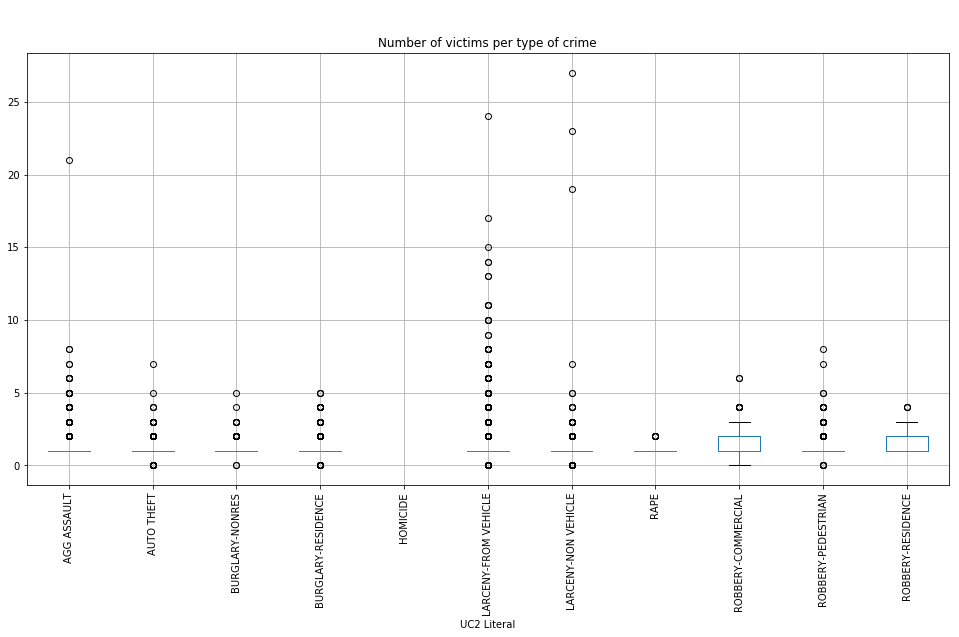

In [264]:
crimes.boxplot('MaxOfnum_victims',by='UC2 Literal',figsize=(16,8),rot=90);
plt.title("Number of victims per type of crime")
plt.suptitle(" ")
plt.show()


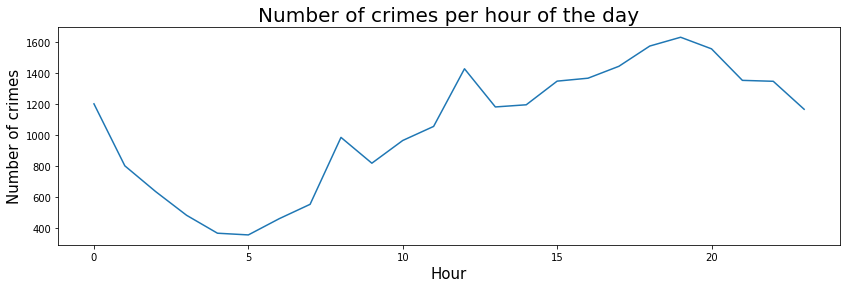

In [340]:
fig, ax = plt.subplots()
crimes['occur_time'].dt.hour.value_counts().sort_index().plot(kind='line',figsize=(14,4));
plt.title("Number of crimes per hour of the day",size=20)
#plt.suptitle(" ")
ax.set_ylabel('Number of crimes',size=15);
ax.set_xlabel('Hour',size=15);
plt.show()

In [344]:
crimes['hour'] = crimes['occur_time'].dt.hour

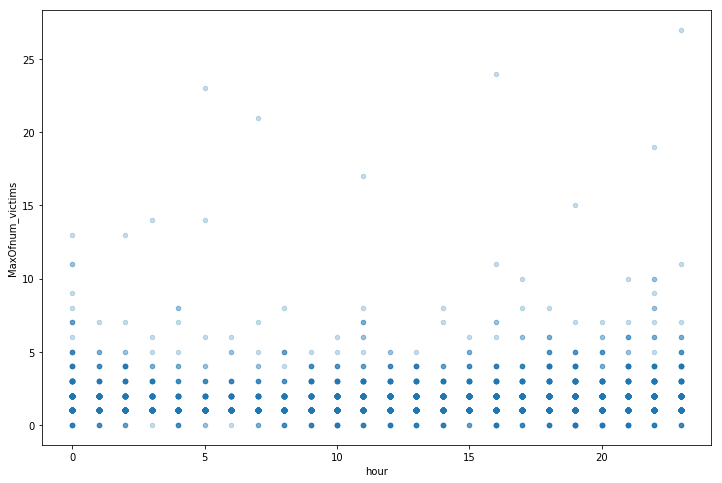

In [345]:
crimes.plot.scatter('hour','MaxOfnum_victims',alpha=0.25,figsize=(12,8));